# CMU Portugal - Capstone project - Telco customer churn

Predicting customer churn based on customer attributes

# Dataset - Telco

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preview data

In [2]:
dataset_path = "dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(dataset_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### Check out if customer IDs are all unique

In [3]:
unique_IDs = df['customerID'].unique()
print(len(unique_IDs))

7043


They are all unique

### Total charges should be a float

In [4]:
# Convert the 'numeric_as_string' column to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charges has some null values but not too many so probably fine to just drop them or maybe they should just be zero

In [6]:
df[df['TotalCharges'].isnull()]


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [7]:

df[df['tenure']==0]


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

Null values represent customers who just joined and so these can be recoded as zero

In [8]:
df = df.fillna({'TotalCharges': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df_clean = df

## plot counts in all variables

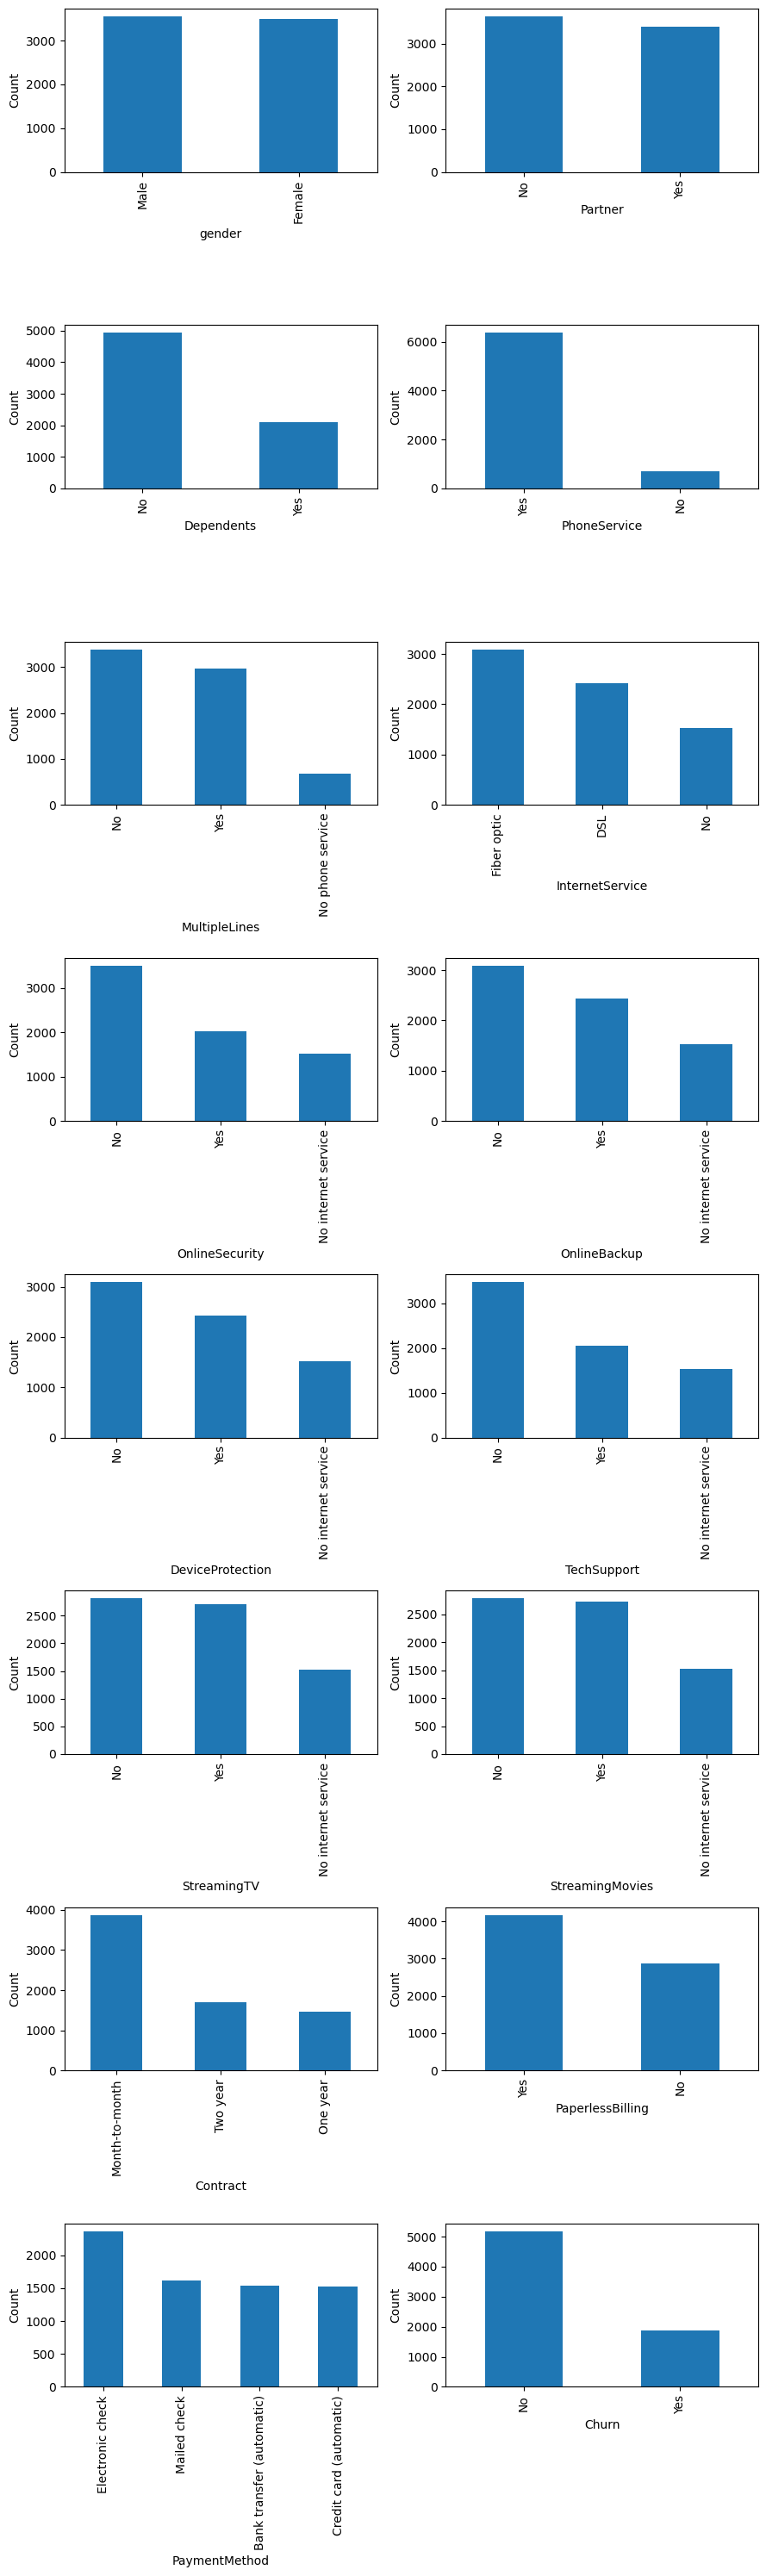

In [214]:
# Identify categorical and non-categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
non_categorical_vars = df.select_dtypes(exclude=['object', 'category']).columns

# Remove customer ID
categorical_vars = categorical_vars[1:]

# Graph and evaluate barcharts
plt.figure(figsize=(9, 30))

num_rows = np.ceil(len(categorical_vars)/2)

# Create bar charts for categorical variables
for x,var in enumerate(categorical_vars):
    plt.subplot(int(num_rows),2,x+1)
    df[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Many of these should just be boolean variables

The no X service categories might just be recoded as 'no' without too much information loss

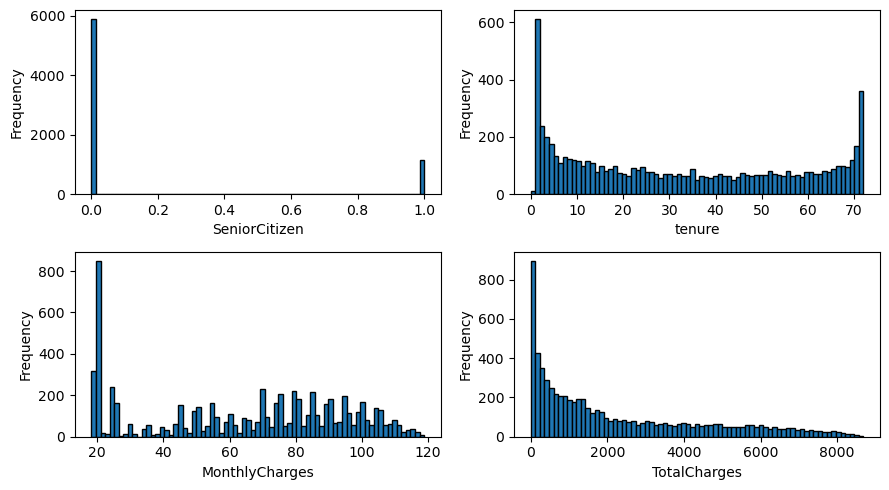

In [215]:
# Graph and evaluate numerical variables
plt.figure(figsize=(9, 5))

num_rows = np.ceil(len(non_categorical_vars)/2)

# Create histograms for non-categorical variables
for x,var in enumerate(non_categorical_vars):
    plt.subplot(int(num_rows),2,x+1)
    df[var].plot(kind='hist', bins=73, edgecolor='k')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Senior citizen is in fact categorical but since moving forward we will recode the other variables as well we can leave it like this.

The only truely numeric variables are tenure, monthly charges and total charges.

Tenure has a strange peak near the end. It could be a maximum cut off but it starts to curve up already before it reaches it. Monthly charges is also strangely spread. Multiple peaks might be expected for different combinations of services but why all the values in between.

Total charges looks fine

## examine tenure max value

72


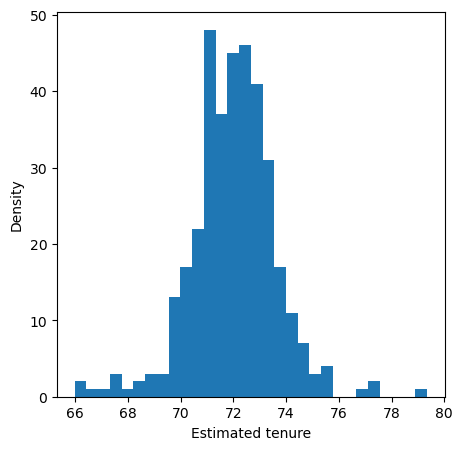

In [216]:
# examine tenure
print(np.max(df['tenure']))
sum(df['tenure']==(np.max(df['tenure'])))

#Estimate tenure of the max tenure entries based on monthly charges and total charges
df_max_ten = df[df['tenure']==(np.max(df['tenure']))]

est_tenure = df_max_ten['TotalCharges']/ df_max_ten['MonthlyCharges']

# Plot the histogram
plt.figure(figsize=(5, 5))
plt.hist(est_tenure, bins=30)
plt.xlabel('Estimated tenure')
plt.ylabel('Density')
plt.show()


Estimating tenure based on monthly charges and total charges does not indicate significantly longer tenures than indicated should be expected. Perhaps 72 months ago this telco company started and we are seeing a wave of initial subscriptions for some reason

## Recode categorical variables

In [10]:
no_service_encoding = 0

# Gender
df = df.rename(columns={'gender': 'is_female'})
df['is_female'] = df['is_female'].map({'Female': 1, 'Male': 0})

#Partner
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

#Dependents
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

#PhoneService
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

#MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service':no_service_encoding})

#InternetService
df['InternetService'] = df['InternetService'].map({'Fiber optic': 2, 'DSL': 1, 'No':0})

#OnlineSecurity
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service':no_service_encoding})

#OnlineBackup
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service':no_service_encoding})

#DeviceProtection
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service':no_service_encoding})

#TechSupport
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service':no_service_encoding})

#StreamingTV
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service':no_service_encoding})

#StreamingMovies
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service':no_service_encoding})

#Contract
df = df.rename(columns={'Contract': 'contract_dur_months'})
df['contract_dur_months'] = df['contract_dur_months'].map({'Month-to-month': 1, 'One year': 12, 'Two year':24})

#PaperlessBilling
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

#PaymentMethod
#df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 0, 'Electronic check': 1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
# recode based on shap
df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 0, 'Electronic check': 3, 'Bank transfer (automatic)':1, 'Credit card (automatic)':2})

#Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   is_female            7043 non-null   int64  
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   int64  
 4   Dependents           7043 non-null   int64  
 5   tenure               7043 non-null   int64  
 6   PhoneService         7043 non-null   int64  
 7   MultipleLines        7043 non-null   int64  
 8   InternetService      7043 non-null   int64  
 9   OnlineSecurity       7043 non-null   int64  
 10  OnlineBackup         7043 non-null   int64  
 11  DeviceProtection     7043 non-null   int64  
 12  TechSupport          7043 non-null   int64  
 13  StreamingTV          7043 non-null   int64  
 14  StreamingMovies      7043 non-null   int64  
 15  contract_dur_months  7043 non-null   i

Most variables make sense, internet service is not technically ordinal but may be seen as such anyone with fiber optic being a superior service as DSL.

More problematic is payment method which for now is ordered Mailed check -> Electronic check -> Bank transfer -> Credit card. But might be better serviced by one hot encoding. Will leave it like this for now

## engineer features

One for how many services a customer has (Though to be fair this is to some extent reflected in monthly charges)

customer commitment is another i saw but it seems to me that is the same as total charges which didn't make a difference

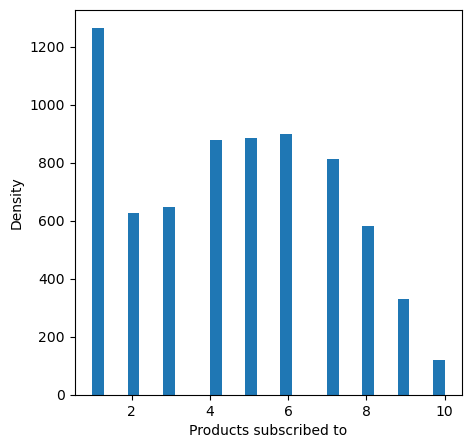

In [11]:
df['ProductPenetration'] = df['PhoneService'] + df['MultipleLines'] + df['InternetService'] + df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] + df['TechSupport'] + df['StreamingTV'] + df['StreamingMovies']


# Plot the histogram
plt.figure(figsize=(5, 5))
plt.hist(df['ProductPenetration'], bins=30)
plt.xlabel('Products subscribed to')
plt.ylabel('Density')
plt.show()


# Examine correlations

                     is_female  SeniorCitizen   Partner  Dependents    tenure  \
is_female             1.000000       0.001874  0.001808   -0.010517 -0.005106   
SeniorCitizen         0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner               0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents           -0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure               -0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService          0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines         0.008414       0.142948  0.142057   -0.024526  0.331941   
InternetService       0.010380       0.259390 -0.000132   -0.179631  0.033230   
OnlineSecurity        0.017021      -0.038653  0.143106    0.080972  0.327203   
OnlineBackup          0.013773       0.066572  0.141498    0.023671  0.360277   
DeviceProtection      0.002105       0.059428  0.153786    0.013963  0.360653   
TechSupport           0.0092

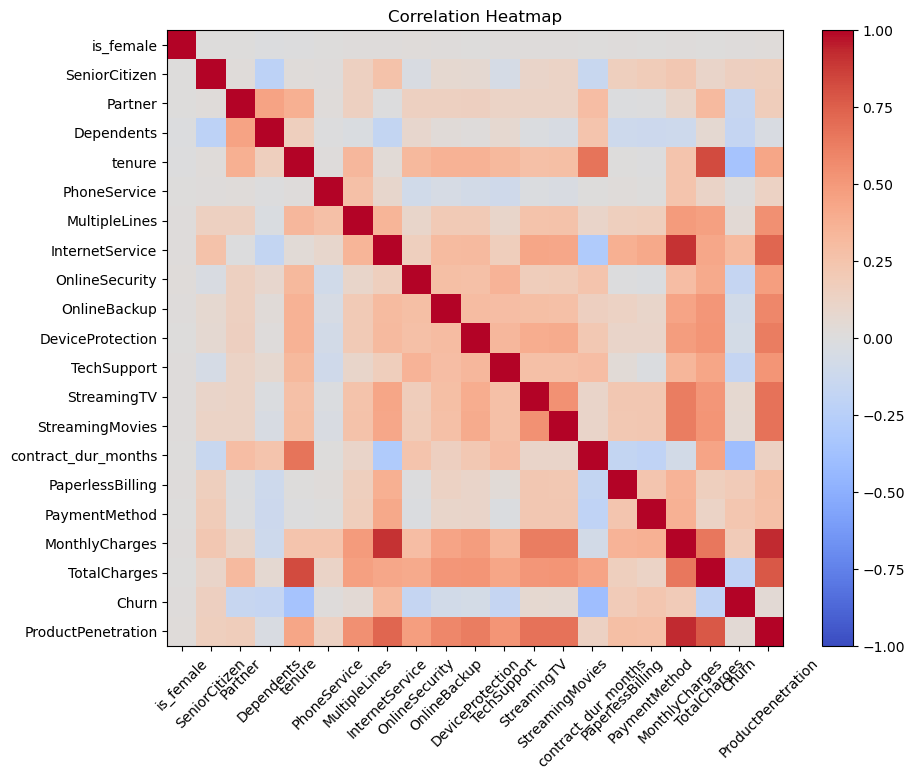

In [12]:
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
print(correlation)

plt.imshow(correlation, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap")
plt.show()

No Strong correlations with Churn on anything really. Tenure and having a longer contract duration stand out as having a slight negative correlation. Internet service has a positive correlation. Perhaps its not very good... Internet service is also highly correlated with monthly charges I guess it is a relatively expensive service. 

Finally Total Charges and tenure are strongly correlated which may be something that needs to be addressed to improve model performance.

<Figure size 1200x1200 with 0 Axes>

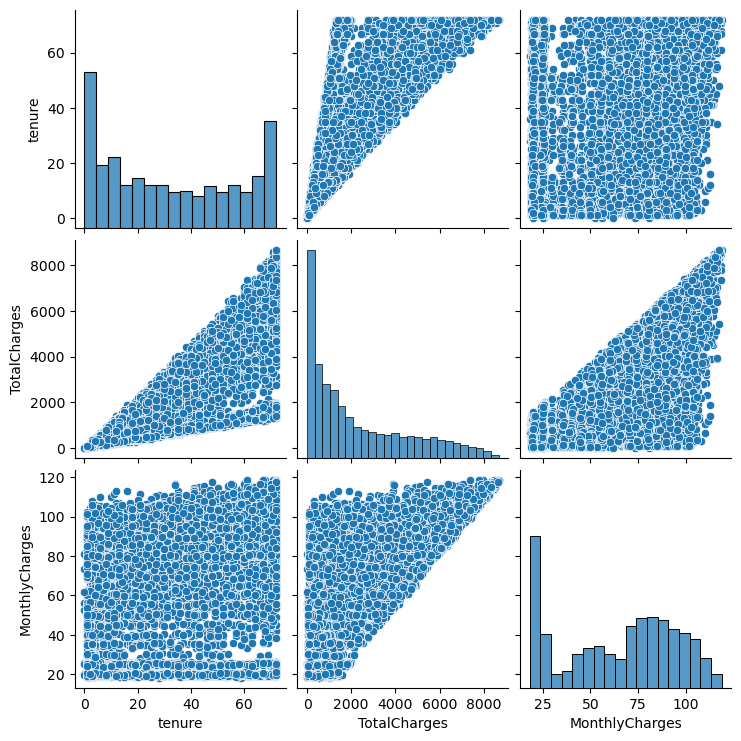

In [220]:
# Create pairplot to visualize relationship between only the actually numerical variables

plt.figure(figsize=(12, 12))
numeric_columns = ['tenure', 'TotalCharges', 'MonthlyCharges']
sns.pairplot(df[numeric_columns])

Total charges is quite strongly collinear with tenure. But is also quite related to montly charges. Perhaps model performance will be better without total charges. Arguably the combination of monthly charges and tenure should capture most of the information in there.

Alternatively we might be able to create a new variable that examines the difference between actual total charges and the estimate from tenure and monthly charges. This would be some fuzzy indicator of whether peoples monthly charges changed over time. But since we'll not know when the change happened it's probably too messy to be useful.

For now we'll just drop total charges

In [13]:
df_filtered = df.drop(columns=['TotalCharges'])
#Also drop customer ID since we do not need it
df_filtered = df_filtered.drop(columns=['customerID'])
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_female            7043 non-null   int64  
 1   SeniorCitizen        7043 non-null   int64  
 2   Partner              7043 non-null   int64  
 3   Dependents           7043 non-null   int64  
 4   tenure               7043 non-null   int64  
 5   PhoneService         7043 non-null   int64  
 6   MultipleLines        7043 non-null   int64  
 7   InternetService      7043 non-null   int64  
 8   OnlineSecurity       7043 non-null   int64  
 9   OnlineBackup         7043 non-null   int64  
 10  DeviceProtection     7043 non-null   int64  
 11  TechSupport          7043 non-null   int64  
 12  StreamingTV          7043 non-null   int64  
 13  StreamingMovies      7043 non-null   int64  
 14  contract_dur_months  7043 non-null   int64  
 15  PaperlessBilling     7043 non-null   i

In [222]:
# alternatively just keep total charges
#still drop customer ID since we do not need it


#df_filtered = df.drop(columns=['customerID'])
#df_filtered.info()

# Outlier detection 
Looking at alternative strategies to detect outliers
## (Unique combinations)

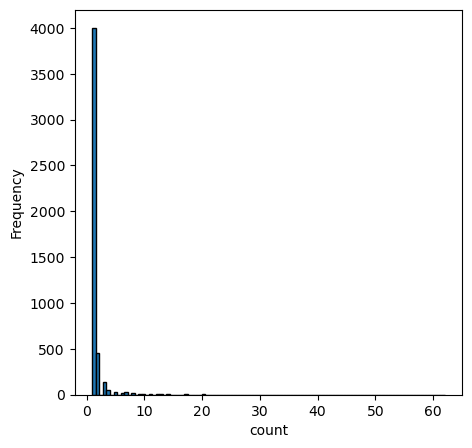

In [14]:
# Check if there are many unique combinations
categorical_vars =['is_female', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'contract_dur_months', 'PaperlessBilling', 'PaymentMethod',
                   'Churn']


df_cat = df_filtered[categorical_vars]

# Count the frequency of each unique combination
combination_counts = df_cat.groupby(df_cat.columns.tolist()).size().reset_index(name='count')
combination_counts['count'].describe()
plt.figure(figsize=(5, 5))
combination_counts['count'].plot(kind='hist', bins=100, edgecolor='k')
plt.xlabel('count')
plt.ylabel('Frequency')
plt.show()

Most combinations occur just once. Probably too many variables for this to work.

## clustering
For this we'll look at clusters scale the data first

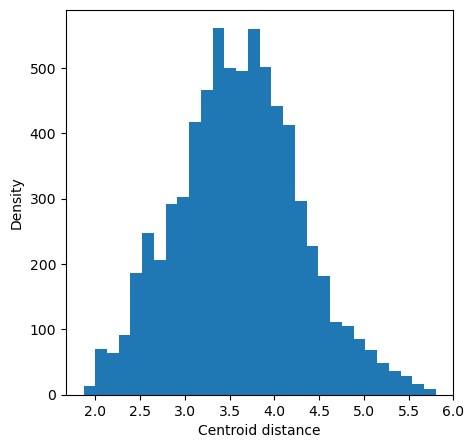

Mean: 3.6056766905858946
Q1: 3.1405779754543586
Q3: 4.060381365079792
IQR: 0.9198033896254332
Upper Bound (Q3 + 1.5 * IQR): 5.440086449517942


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Do the clustering (for now 3 clusters allign with 2 main services and having both)
df_vars = df_filtered

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vars)

kmeans = KMeans(n_clusters=4)
x_cluster = kmeans.fit_predict(X_scaled)

x_distance = np.linalg.norm(X_scaled - kmeans.cluster_centers_[x_cluster], axis=1)


# Plot the histogram
plt.figure(figsize=(5, 5))
plt.hist(x_distance, bins=30)
plt.xlabel('Centroid distance')
plt.ylabel('Density')
plt.show()

# Print 1.5 * the interquartile range above the third quartile
Q1 = np.percentile(x_distance, 25)
Q3 = np.percentile(x_distance, 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Mean: {np.mean(x_distance)}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Upper Bound (Q3 + 1.5 * IQR): {upper_bound}")

In [225]:
# Examine the outliers
outliers = df_filtered[x_distance > upper_bound]
outliers.describe()

is_female  SeniorCitizen    Partner  Dependents     tenure  \
count  62.000000      62.000000  62.000000   62.000000  62.000000   
mean    0.419355       0.451613   0.548387    0.338710  38.129032   
std     0.497482       0.501716   0.501716    0.477134  23.707565   
min     0.000000       0.000000   0.000000    0.000000   4.000000   
25%     0.000000       0.000000   0.000000    0.000000  16.000000   
50%     0.000000       0.000000   1.000000    0.000000  36.500000   
75%     1.000000       1.000000   1.000000    1.000000  62.250000   
max     1.000000       1.000000   1.000000    1.000000  72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count          62.0           62.0             62.0       62.000000   
mean            0.0            0.0              1.0        0.645161   
std             0.0            0.0              0.0        0.482370   
min             0.0            0.0              1.0        0.000000   
25%             0.0            0.0              1.0        0.000000   
50%             0.0            0.0              1.0        1.000000   
75%             0.0            0.0              1.0        1.000000   
max             0.0            0.0              1.0        1.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count     62.000000         62.000000    62.000000    62.000000   
mean       0.580645          0.629032     0.532258     0.387097   
std        0.497482          0.487007     0.503032     0.491062   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     0.000000   
75%        1.000000          1.000000     1.000000     1.000000   
max        1.000000          1.000000     1.000000     1.000000   

       StreamingMovies  contract_dur_months  PaperlessBilling  PaymentMethod  \
count        62.000000            62.000000         62.000000      62.000000   
mean          0.435484            10.387097          0.403226       1.532258   
std           0.499868            10.507382          0.494550       1.327116   
min           0.000000             1.000000          0.000000       0.000000   
25%           0.000000             1.000000          0.000000       0.000000   
50%           0.000000             1.000000          0.000000       1.000000   
75%           1.000000            24.000000          1.000000       3.000000   
max           1.000000            24.000000          1.000000       3.000000   

       MonthlyCharges      Churn  ProductPenetration  
count       62.000000  62.000000           62.000000  
mean        44.944355   0.209677            4.209677  
std          6.567407   0.410402            0.851943  
min         29.800000   0.000000            2.000000  
25%         40.012500   0.000000            4.000000  
50%         45.000000   0.000000            4.000000  
75%         49.600000   0.000000            5.000000  
max         58.850000   1.000000            6.000000

In [226]:
# all data for comparison
df_filtered.describe()

is_female  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.495244       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.421837         1.222916        0.286668   
std        0.295752       0.493888         0.778877        0.452237   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         1.000000        0.000000   
50%        1.000000       0.000000         1.000000        0.000000   
75%        1.000000       1.000000         2.000000        1.000000   
max        1.000000       1.000000         2.000000        1.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7043.000000       7043.000000  7043.000000  7043.000000   
mean       0.344881          0.343888     0.290217     0.384353   
std        0.475363          0.475038     0.453895     0.486477   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        0.000000          0.000000     0.000000     0.000000   
75%        1.000000          1.000000     1.000000     1.000000   
max        1.000000          1.000000     1.000000     1.000000   

       StreamingMovies  contract_dur_months  PaperlessBilling  PaymentMethod  \
count      7043.000000          7043.000000       7043.000000    7043.000000   
mean          0.387903             8.835865          0.592219       1.422547   
std           0.487307             9.551444          0.491457       1.064952   
min           0.000000             1.000000          0.000000       0.000000   
25%           0.000000             1.000000          0.000000       1.000000   
50%           0.000000             1.000000          1.000000       1.000000   
75%           1.000000            12.000000          1.000000       2.000000   
max           1.000000            24.000000          1.000000       3.000000   

       MonthlyCharges        Churn  ProductPenetration  
count     7043.000000  7043.000000          7043.00000  
mean        64.761692     0.265370             4.58583  
std         30.090047     0.441561             2.55023  
min         18.250000     0.000000             1.00000  
25%         35.500000     0.000000             2.00000  
50%         70.350000     0.000000             5.00000  
75%         89.850000     1.000000             7.00000  
max        118.750000     1.000000            10.00000

All outliers only subscribe to DSL, no phone. Running with 2 clusters yields more cases where the same is true. Running with 4 clusters yields no outliers

How many cases like that exist in the dataset?

In [227]:
df_DSL_only = df_filtered[(df_filtered['InternetService'] == 1) &  (df_filtered['PhoneService'] == 0)]
df_DSL_only.describe()

is_female  SeniorCitizen     Partner  Dependents      tenure  \
count  682.000000     682.000000  682.000000  682.000000  682.000000   
mean     0.485337       0.152493    0.456012    0.302053   31.737537   
std      0.500152       0.359762    0.498427    0.459485   24.233204   
min      0.000000       0.000000    0.000000    0.000000    0.000000   
25%      0.000000       0.000000    0.000000    0.000000    8.000000   
50%      0.000000       0.000000    0.000000    0.000000   29.000000   
75%      1.000000       0.000000    1.000000    1.000000   53.000000   
max      1.000000       1.000000    1.000000    1.000000   72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count         682.0          682.0            682.0      682.000000   
mean            0.0            0.0              1.0        0.414956   
std             0.0            0.0              0.0        0.493076   
min             0.0            0.0              1.0        0.000000   
25%             0.0            0.0              1.0        0.000000   
50%             0.0            0.0              1.0        0.000000   
75%             0.0            0.0              1.0        1.000000   
max             0.0            0.0              1.0        1.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count    682.000000        682.000000   682.000000   682.000000   
mean       0.420821          0.447214     0.423754     0.417889   
std        0.494053          0.497571     0.494515     0.493574   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        0.000000          0.000000     0.000000     0.000000   
75%        1.000000          1.000000     1.000000     1.000000   
max        1.000000          1.000000     1.000000     1.000000   

       StreamingMovies  contract_dur_months  PaperlessBilling  PaymentMethod  \
count       682.000000           682.000000        682.000000     682.000000   
mean          0.436950             8.768328          0.567449       1.428152   
std           0.496373             9.507505          0.495793       1.079089   
min           0.000000             1.000000          0.000000       0.000000   
25%           0.000000             1.000000          0.000000       1.000000   
50%           0.000000             1.000000          1.000000       1.000000   
75%           1.000000            12.000000          1.000000       2.000000   
max           1.000000            24.000000          1.000000       3.000000   

       MonthlyCharges       Churn  ProductPenetration  
count      682.000000  682.000000          682.000000  
mean        42.028592    0.249267            3.561584  
std         11.419585    0.432906            1.623032  
min         23.450000    0.000000            1.000000  
25%         33.600000    0.000000            2.000000  
50%         40.575000    0.000000            4.000000  
75%         50.737500    0.000000            5.000000  
max         67.200000    1.000000            7.000000

In total the dataset has 682 total cases of subscribers only to DSL. With 2 clusters 119 outliers are detected with 3 clusters 58, with 4 clusters no outliers. The 58 outliers differ from the total sample of DSL only subscribers mainly in that they are more often seniors. 

4 clusters does not seem like too many perse given that there is more than 1 type of internet subscription so for now we will continue without outlier removal

# Train and evaluate models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale and split data
target_column = 'Churn'
X = df_filtered.drop(columns=target_column)
y = df_filtered[target_column]

#scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split in test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,test_size=0.2, random_state=89)


## Quick evaluation of a number of models at default

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def fit_models_dict(models, X_train, y_train, X_test, y_test,
                    curr_train_weights=None,curr_test_weights=None):
    if not isinstance(models, dict):
        models = {'': models}

    results = {}
    for name, model in models.items():
        print(f"Fitting {name}")
        if curr_train_weights is None:
            model.fit(X_train, y_train)
        else:
            model.fit(X_train, y_train,sample_weight=curr_train_weights)
            
            
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        report = classification_report(y_test, y_pred, output_dict=True, sample_weight=curr_test_weights)
        auc = roc_auc_score(y_test, y_proba,sample_weight=curr_test_weights) if y_proba is not None else None

        results[name] = {
            "model": model,
            "y_pred": y_pred,
            "y_proba": y_proba,
            "report":report,
            "auc": auc
        }
    return results

def display_fit_results(results,X_test,y_test,curr_test_weights=None):
    # Display Results
    plt.figure(figsize=(10, 10))
    for name, result in results.items():
        print(f"\n{name}:")
        print(classification_report(y_test, result["model"].predict(X_test),sample_weight=curr_test_weights))

        if result["auc"] is not None:
            y_proba = result["model"].predict_proba(X_test)[:, 1] if hasattr(result["model"], 'predict_proba') else None

            print(f"AUC-ROC: {result['auc']:.4f}")

            # Visualization of ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_proba,sample_weight=curr_test_weights)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Above Classifiers")
    plt.legend()
    plt.show()

    # Plot the precision-recall curve
    plt.figure(figsize=(10, 10))

    # Compute the precision-recall curve
    for name, result in results.items():
        if result["auc"] is not None:
          y_proba = result["model"].predict_proba(X_test)[:, 1] if hasattr(result["model"], 'predict_proba') else None

          precision, recall, thresholds = precision_recall_curve(y_test, y_proba,sample_weight=curr_test_weights)

          plt.plot(recall, precision, marker='.', label=f"{name}")
          
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    #plt.ylim((-0.05, 1.05))
    plt.legend()
    plt.show()

    for name, result in results.items():
        # Generate the confusion matrix
        y_pred = result["model"].predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        # Print the confusion matrix
        print(f"\n{name} Confusion Matrix:")
        print(cm)

        


Fitting Logistic Regression
Fitting Logistic l2
Fitting Logistic l1
Fitting Logistic ElasticNet
Fitting SCV_rbf
Fitting SVC_linear
Fitting MLPClassifier_1layer
Fitting MLPClassifier_2layer
Fitting Random Forest
Fitting GradientBoostingClassifier

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

AUC-ROC: 0.8319

Logistic l2:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

AUC-ROC: 0.8326

Logistic l1:
              prec

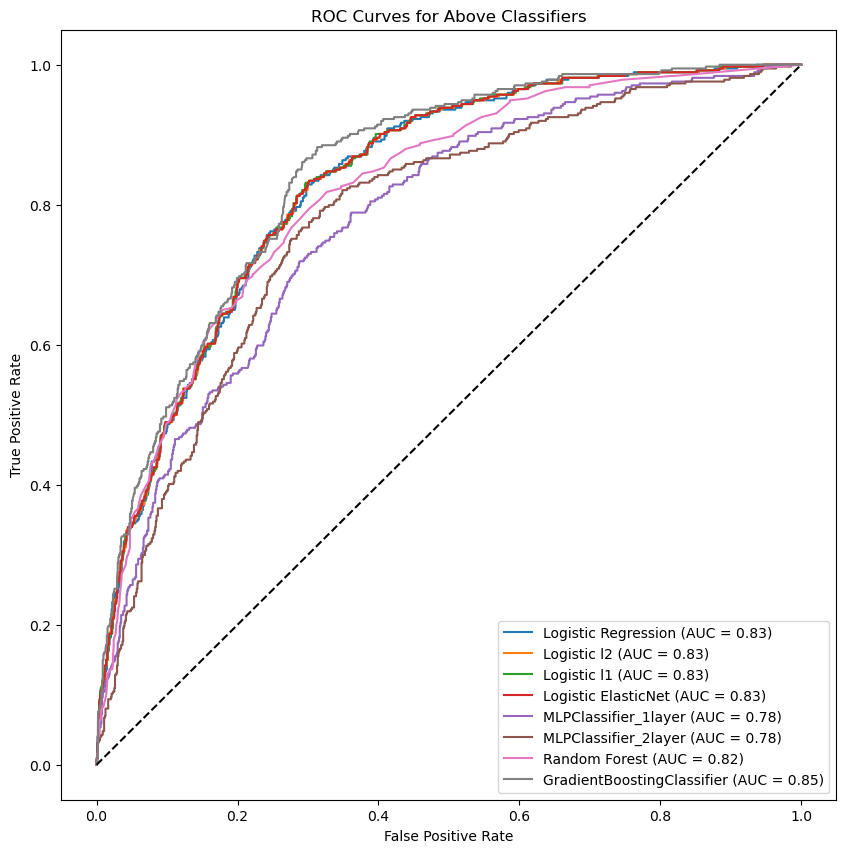

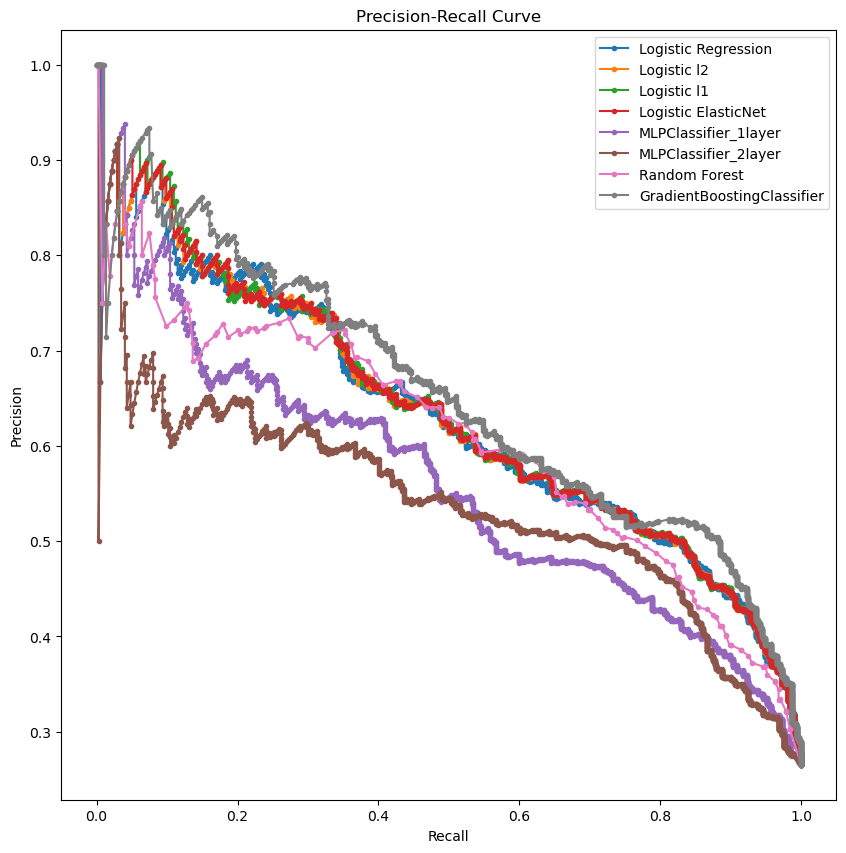


Logistic Regression Confusion Matrix:
[[915 120]
 [182 192]]

Logistic l2 Confusion Matrix:
[[915 120]
 [181 193]]

Logistic l1 Confusion Matrix:
[[915 120]
 [182 192]]

Logistic ElasticNet Confusion Matrix:
[[916 119]
 [181 193]]

SCV_rbf Confusion Matrix:
[[948  87]
 [209 165]]

SVC_linear Confusion Matrix:
[[913 122]
 [178 196]]

MLPClassifier_1layer Confusion Matrix:
[[888 147]
 [192 182]]

MLPClassifier_2layer Confusion Matrix:
[[867 168]
 [181 193]]

Random Forest Confusion Matrix:
[[927 108]
 [190 184]]

GradientBoostingClassifier Confusion Matrix:
[[916 119]
 [173 201]]


In [18]:
models = {
  "Logistic Regression": LogisticRegression(penalty=None),
  "Logistic l2": LogisticRegression(penalty='l2'),
  "Logistic l1": LogisticRegression(penalty='l1', solver='liblinear'),
  "Logistic ElasticNet": LogisticRegression(penalty='elasticnet',l1_ratio=0.5, solver='saga',max_iter=1000),
  "SCV_rbf": SVC(kernel='rbf'),
  "SVC_linear": SVC(kernel='linear'),
  "MLPClassifier_1layer": MLPClassifier(max_iter=1000),
  "MLPClassifier_2layer": MLPClassifier(max_iter=1000,hidden_layer_sizes=(100,50)),
  "Random Forest": RandomForestClassifier(),
  "GradientBoostingClassifier": GradientBoostingClassifier()
}
results = fit_models_dict(models, X_train, y_train, X_test, y_test,
                    None,None)
display_fit_results(results,X_test,y_test,None)


Logistic regression does pretty good accross the board, only gradient boosting classifier is a bit better overal. However, generally recal for churn is quite bad at only slightly above 50%. If the goal is to have a focussed customer retention program this is not a great result

## Using sample weight to improve recall of churn


In [19]:
from sklearn.utils.class_weight import compute_sample_weight

weight_churn = compute_sample_weight(class_weight="balanced", y=y_train)
weight_churn_test = compute_sample_weight(class_weight="balanced", y=y_test)


Fitting Logistic Regression
Fitting Logistic l2
Fitting Logistic l1
Fitting Logistic ElasticNet
Fitting Random Forest
Fitting GradientBoostingClassifier

Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75 704.5000000000018
           1       0.75      0.79      0.77 704.4999999999978

    accuracy                           0.76 1408.9999999999995
   macro avg       0.76      0.76      0.76 1408.9999999999995
weighted avg       0.76      0.76      0.76 1408.9999999999995

AUC-ROC: 0.8319

Logistic l2:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76 704.5000000000018
           1       0.75      0.79      0.77 704.4999999999978

    accuracy                           0.76 1408.9999999999995
   macro avg       0.76      0.76      0.76 1408.9999999999995
weighted avg       0.76      0.76      0.76 1408.9999999999995

AUC-ROC: 0.8329

Logistic l1:
              precision  

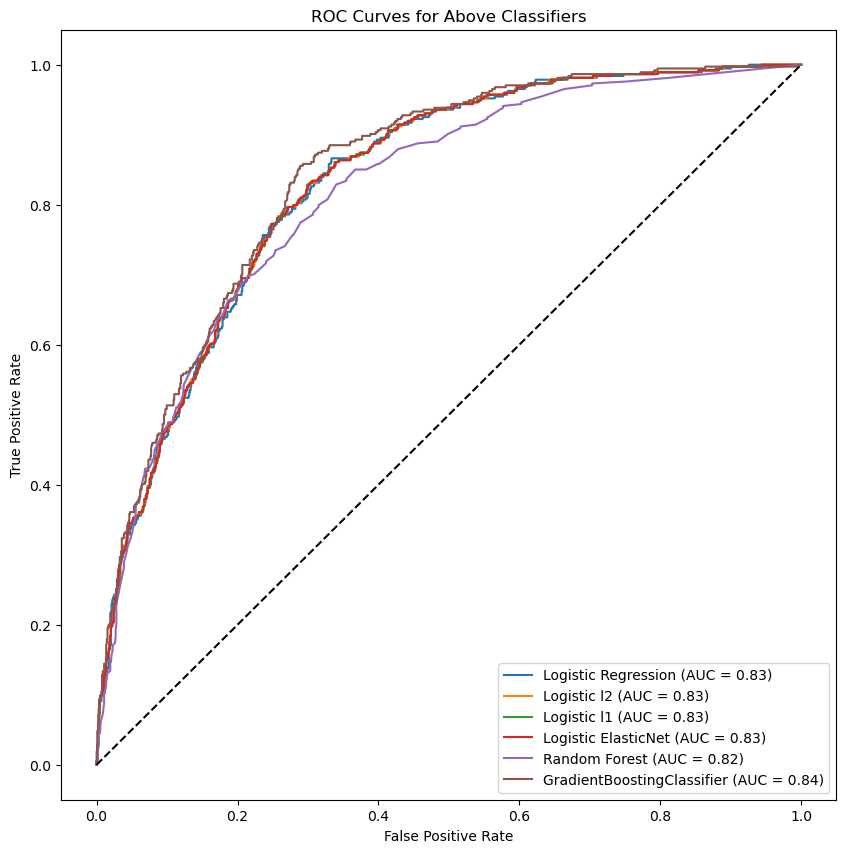

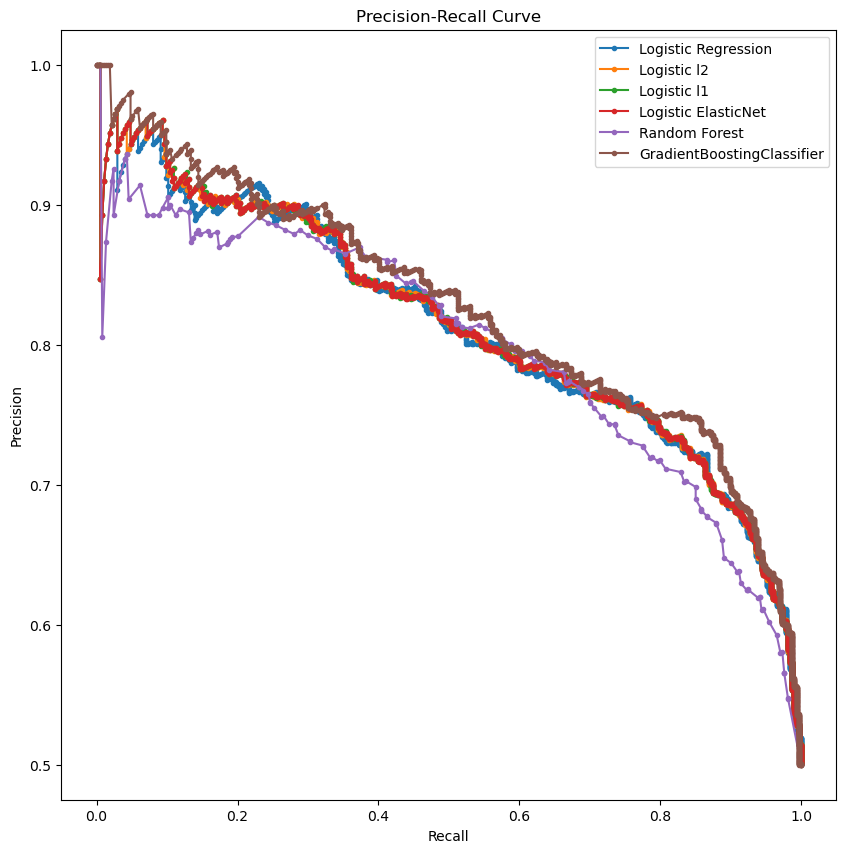


Logistic Regression Confusion Matrix:
[[761 274]
 [ 80 294]]

Logistic l2 Confusion Matrix:
[[762 273]
 [ 80 294]]

Logistic l1 Confusion Matrix:
[[761 274]
 [ 81 293]]

Logistic ElasticNet Confusion Matrix:
[[763 272]
 [ 81 293]]

Random Forest Confusion Matrix:
[[924 111]
 [191 183]]

GradientBoostingClassifier Confusion Matrix:
[[768 267]
 [ 83 291]]


In [20]:

# Only run well performing fast models
models = {
  "Logistic Regression": LogisticRegression(penalty=None),
  "Logistic l2": LogisticRegression(penalty='l2'),
  "Logistic l1": LogisticRegression(penalty='l1', solver='liblinear'),
  "Logistic ElasticNet": LogisticRegression(penalty='elasticnet',l1_ratio=0.5, solver='saga',max_iter=1000),
  "Random Forest": RandomForestClassifier(),
  "GradientBoostingClassifier": GradientBoostingClassifier()
}

results_weighted = fit_models_dict(models, X_train, y_train, X_test, y_test,
                    weight_churn,weight_churn_test)
display_fit_results(results_weighted,X_test,y_test,weight_churn_test)

Accuracy is down but recall on churn is now much higher. AUC scores are actually not really affected Gradient boosting classifier is a bit better. Does this actually do anything or is it just shifting the threshold for classification?

# Hyperparameter tuning

## Logistic Regression
Let's start with logistic regression, we already know that performance is mostly the same, we can examine the standard l2 with different regularization strengths

In [233]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=10, verbose=1, scoring='recall_weighted')
grid_search.fit(X_train, y_train,sample_weight=weight_churn)

print("\nBest Parameters for Logistic Regression (l2):")
print(grid_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits

Best Parameters for Logistic Regression (l2):
{'C': 0.1}


Fitting Logistic l2 C0.1
Fitting Logistic l2 C1

Logistic l2 C0.1:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8348

Logistic l2 C1:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8343


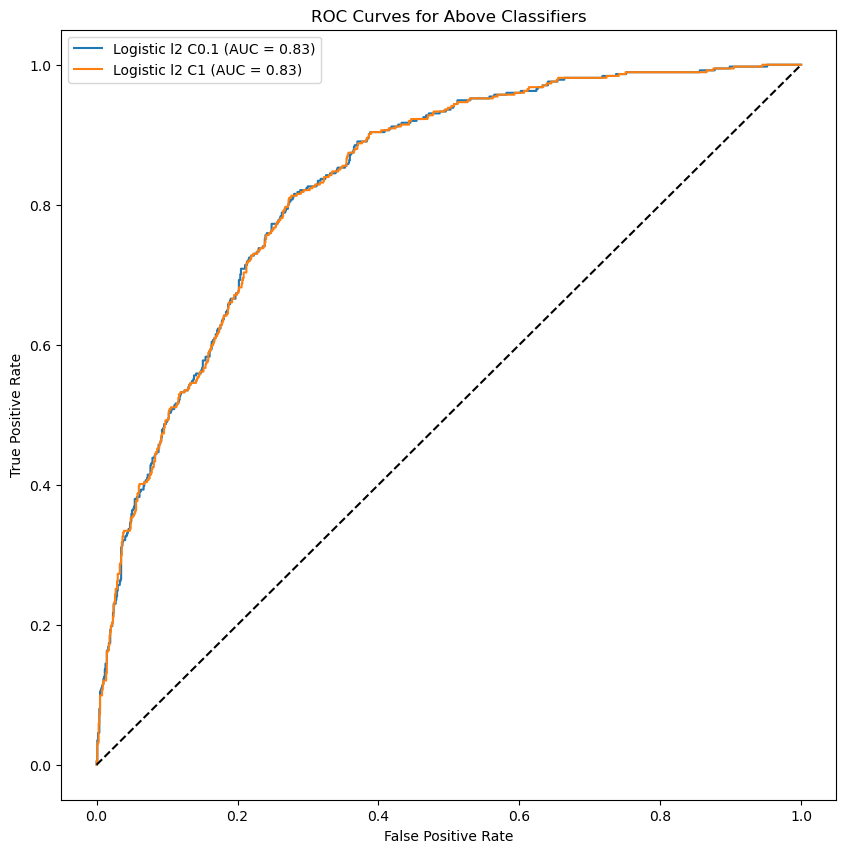

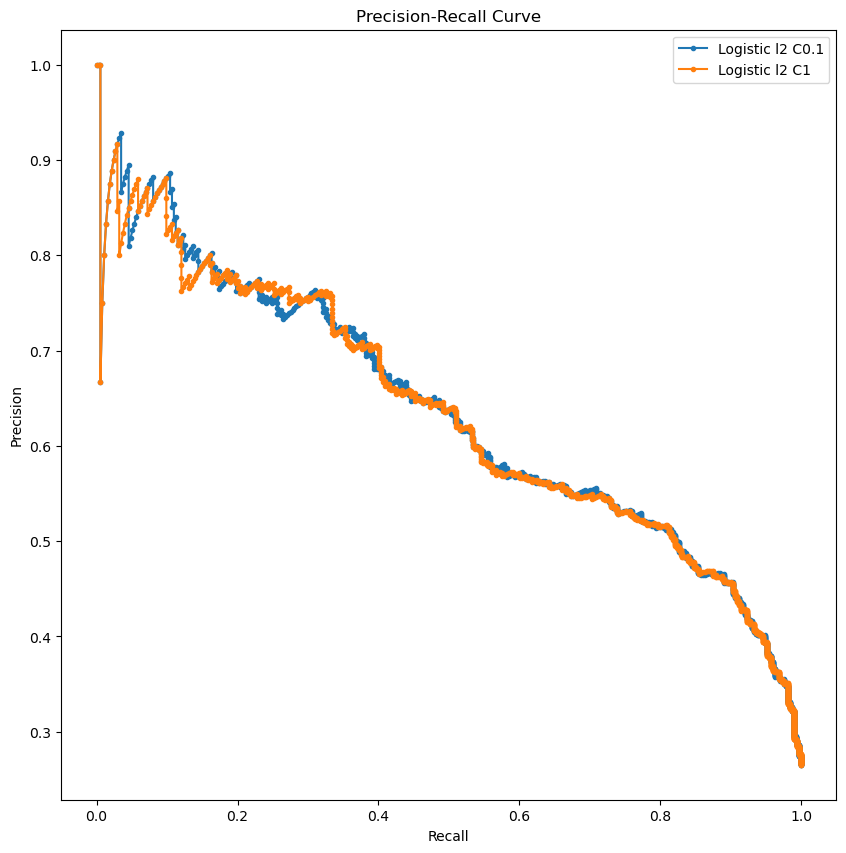


Logistic l2 C0.1 Confusion Matrix:
[[762 273]
 [ 79 295]]

Logistic l2 C1 Confusion Matrix:
[[761 274]
 [ 79 295]]


In [234]:
models = {
  "Logistic l2 C0.1": LogisticRegression(penalty='l2',C=0.1),
  "Logistic l2 C1": LogisticRegression(penalty='l2',C=1)
  }

results_log_C0_1 = fit_models_dict(models, X_train, y_train, X_test, y_test,
                    weight_churn,None)
display_fit_results(results_log_C0_1,X_test,y_test,None)

## Tuning of random forest

In [235]:
param_grid = {
    'min_samples_leaf': [1, 2, 5],
    'n_estimators': [100, 1000, 10000]
}
rfc = RandomForestClassifier()

grid_search = GridSearchCV(rfc, param_grid, cv=5, verbose=3, scoring='recall')
grid_search.fit(X_train, y_train,sample_weight=weight_churn)

print("\nBest Parameters for GradientBoostingClassifier:")
print(grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END min_samples_leaf=1, n_estimators=100;, score=0.485 total time=   0.3s
[CV 2/5] END min_samples_leaf=1, n_estimators=100;, score=0.498 total time=   0.3s
[CV 3/5] END min_samples_leaf=1, n_estimators=100;, score=0.475 total time=   0.3s
[CV 4/5] END min_samples_leaf=1, n_estimators=100;, score=0.458 total time=   0.4s
[CV 5/5] END min_samples_leaf=1, n_estimators=100;, score=0.448 total time=   0.3s
[CV 1/5] END min_samples_leaf=1, n_estimators=1000;, score=0.488 total time=   4.3s
[CV 2/5] END min_samples_leaf=1, n_estimators=1000;, score=0.512 total time=   4.7s
[CV 3/5] END min_samples_leaf=1, n_estimators=1000;, score=0.468 total time=   4.5s
[CV 4/5] END min_samples_leaf=1, n_estimators=1000;, score=0.441 total time=   4.5s
[CV 5/5] END min_samples_leaf=1, n_estimators=1000;, score=0.441 total time=   4.7s
[CV 1/5] END min_samples_leaf=1, n_estimators=10000;, score=0.488 total time=  48.7s
[CV 2/5] END min_sam

## Tuning of gradient boosting model

In [ ]:
param_grid = {
    'n_estimators': [10, 100, 1000, 10000]
}
gbm = GradientBoostingClassifier()

grid_search = GridSearchCV(gbm, param_grid, cv=5, verbose=3, scoring='roc_auc')
grid_search.fit(X_train, y_train,sample_weight=weight_churn)

print("\nBest Parameters for GradientBoostingClassifier:")
print(grid_search.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................n_estimators=10;, score=0.786 total time=   0.0s
[CV 2/5] END ...................n_estimators=10;, score=0.816 total time=   0.0s
[CV 3/5] END ...................n_estimators=10;, score=0.786 total time=   0.0s
[CV 4/5] END ...................n_estimators=10;, score=0.769 total time=   0.0s
[CV 5/5] END ...................n_estimators=10;, score=0.833 total time=   0.0s
[CV 1/5] END ..................n_estimators=100;, score=0.799 total time=   0.5s
[CV 2/5] END ..................n_estimators=100;, score=0.793 total time=   0.5s
[CV 3/5] END ..................n_estimators=100;, score=0.789 total time=   0.5s
[CV 4/5] END ..................n_estimators=100;, score=0.766 total time=   0.5s
[CV 5/5] END ..................n_estimators=100;, score=0.813 total time=   0.5s
[CV 1/5] END .................n_estimators=1000;, score=0.732 total time=   5.6s
[CV 2/5] END .................n_estimators=1000;,

In [62]:

param_grid = {
    'max_depth': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 5],
    'n_estimators':[5,10,100]
}
gbm = GradientBoostingClassifier(n_estimators=10)

grid_search = GridSearchCV(gbm, param_grid, cv=5, verbose=3, scoring='roc_auc')
grid_search.fit(X_train, y_train,sample_weight=weight_churn)

print("\nBest Parameters for GradientBoostingClassifier:")
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=1, min_samples_leaf=1, n_estimators=5;, score=0.725 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=1, n_estimators=5;, score=0.783 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=1, n_estimators=5;, score=0.724 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=1, n_estimators=5;, score=0.731 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=1, n_estimators=5;, score=0.715 total time=   0.0s
[CV 1/5] END max_depth=1, min_samples_leaf=1, n_estimators=10;, score=0.814 total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=1, n_estimators=10;, score=0.811 total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=1, n_estimators=10;, score=0.814 total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=1, n_estimators=10;, score=0.825 total time=   0.0s
[CV 5/5] END max_depth=1, min_samples_leaf=1, n_estimators=10;, score=0.821 total time= 

Fitting GBM default
Fitting GBM tuned

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8432

GBM tuned:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8435


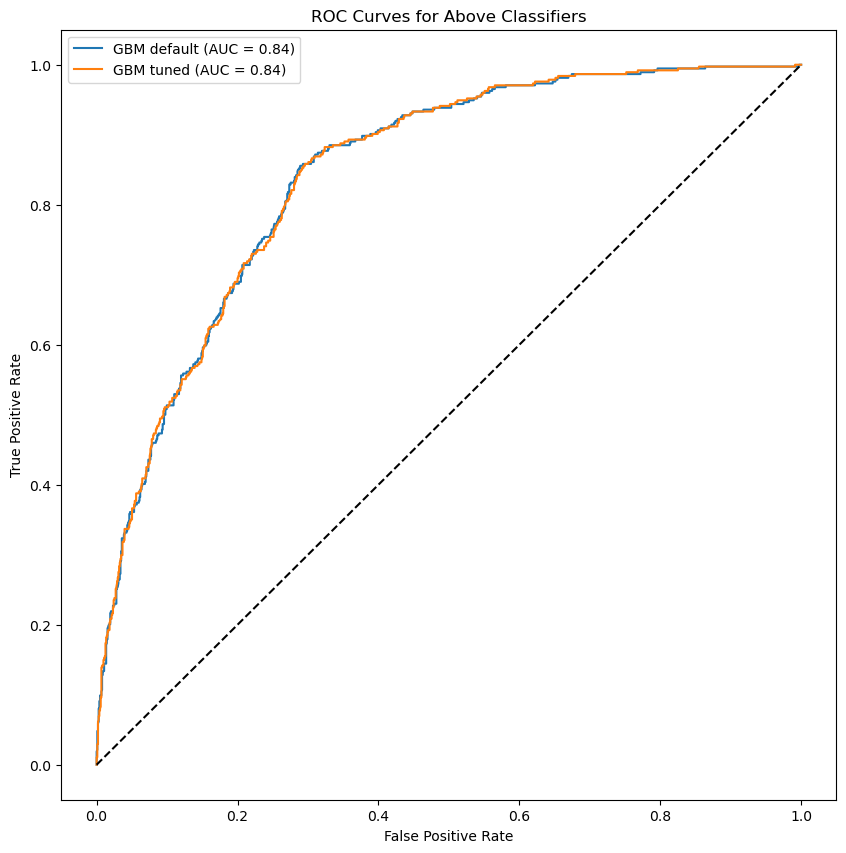

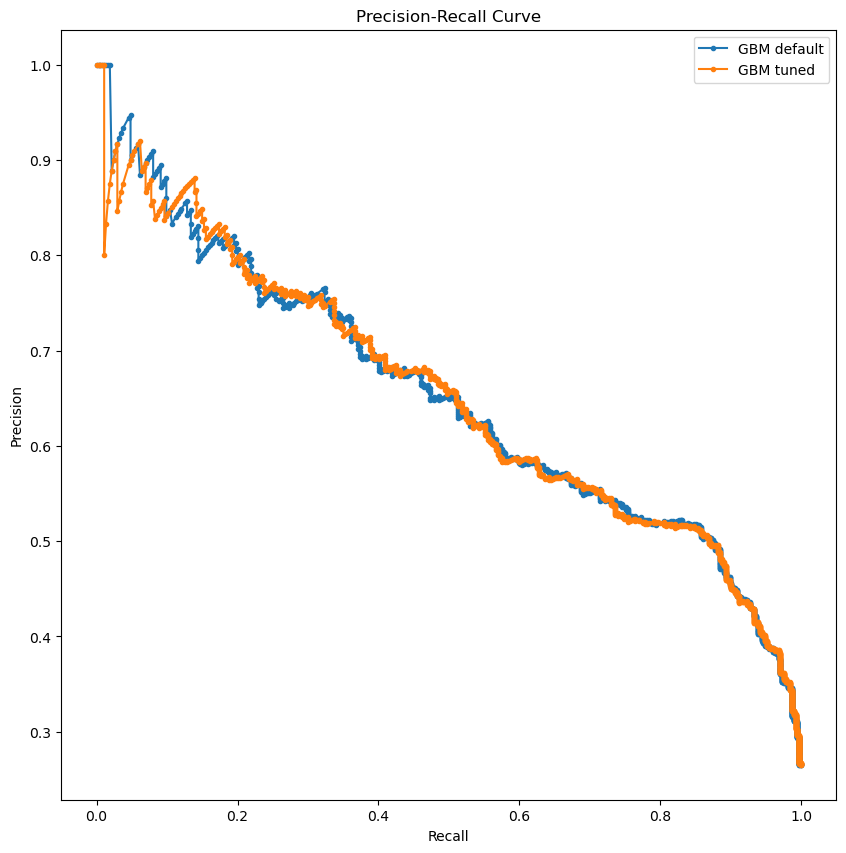


GBM default Confusion Matrix:
[[768 267]
 [ 83 291]]

GBM tuned Confusion Matrix:
[[770 265]
 [ 86 288]]


In [64]:
models = {
  "GBM default": GradientBoostingClassifier(),
  "GBM tuned": GradientBoostingClassifier(n_estimators=100,max_depth=3,min_samples_leaf=5)
  }

results_gbm_tuned = fit_models_dict(models, X_train, y_train, X_test, y_test,
                    weight_churn,None)
display_fit_results(results_gbm_tuned,X_test,y_test,None)

# Try XGBoost

Fitting XGBoost

XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.75      0.81      1035
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8400


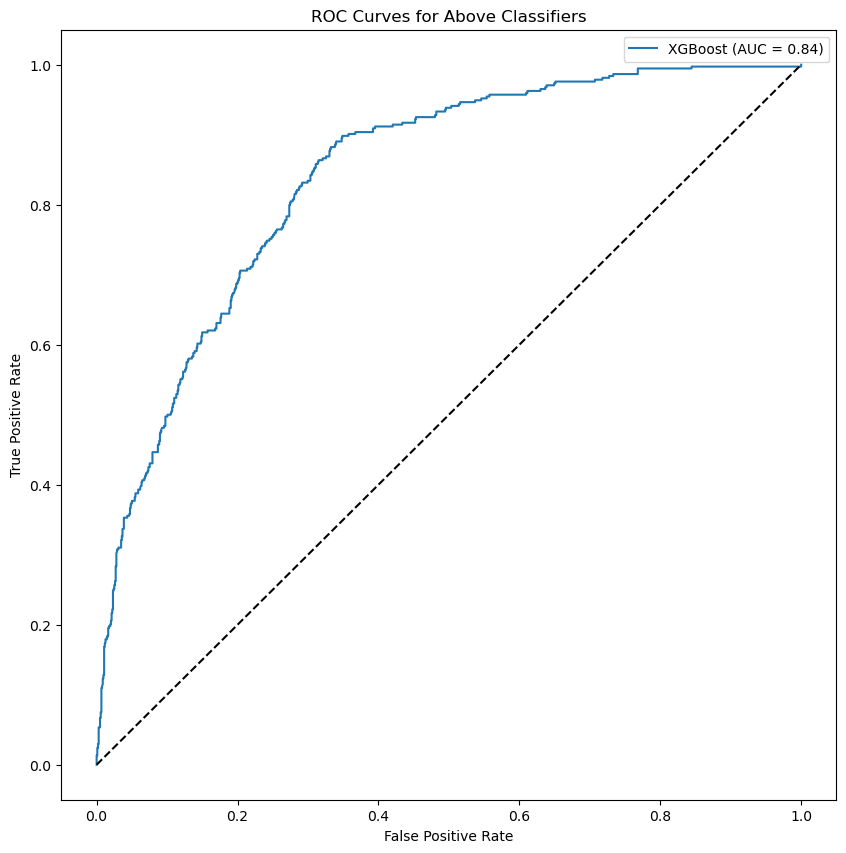

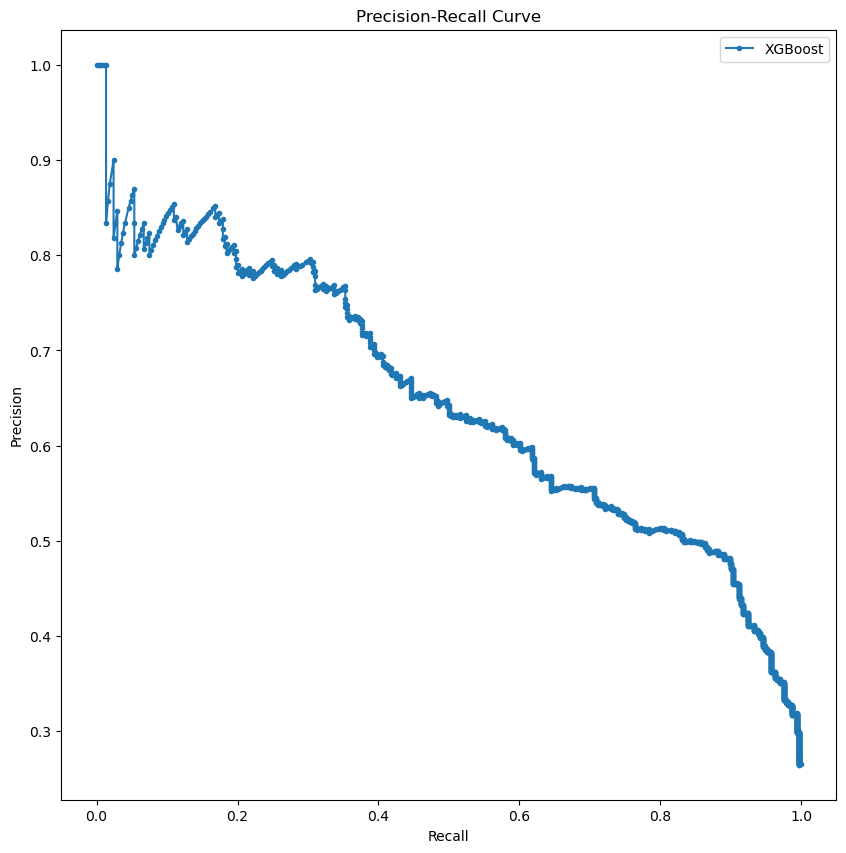


XGBoost Confusion Matrix:
[[772 263]
 [ 90 284]]


In [239]:
# Try out XGboost and voting classifier
from xgboost import XGBClassifier

xgb_class = XGBClassifier(n_estimators=100, max_depth=3)
models_xgb = {}
models_xgb["XGBoost"] = xgb_class

results_xgb = fit_models_dict(models_xgb, X_train, y_train, X_test, y_test,
                    weight_churn,None)
display_fit_results(results_xgb,X_test,y_test,None)

In [240]:
# Try both optimizing for recall and precision and auc to see the difference
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators':[5,10,100,1000]
}
xgb = XGBClassifier(n_estimators=10)

grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=3, scoring='roc_auc')
grid_search.fit(X_train, y_train,sample_weight=weight_churn)

print("\nBest Parameters for XGBoost classifier:")
print(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......max_depth=3, n_estimators=5;, score=0.839 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=5;, score=0.828 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=5;, score=0.830 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=5;, score=0.845 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=5;, score=0.839 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.846 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.839 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.834 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.860 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.845 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.845 total time=   0.0s
[CV 2/5] END .....max_depth=3, n_estimators=100;

In [241]:
# Try both optimizing for recall and precision and auc to see the difference
param_grid = {
    'max_depth': [1,2,3,4,5],
    'n_estimators':[10, 50, 100,200]
}
xgb = XGBClassifier()

grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=3, scoring='roc_auc')
grid_search.fit(X_train, y_train,sample_weight=weight_churn)

print("\nBest Parameters for XGBoost classifier:")
print(grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.828 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=10;, score=0.817 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=10;, score=0.823 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=10;, score=0.848 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=10;, score=0.824 total time=   0.0s
[CV 1/5] END ......max_depth=1, n_estimators=50;, score=0.845 total time=   0.0s
[CV 2/5] END ......max_depth=1, n_estimators=50;, score=0.846 total time=   0.0s
[CV 3/5] END ......max_depth=1, n_estimators=50;, score=0.839 total time=   0.0s
[CV 4/5] END ......max_depth=1, n_estimators=50;, score=0.864 total time=   0.0s
[CV 5/5] END ......max_depth=1, n_estimators=50;, score=0.847 total time=   0.0s
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.848 total time=   0.0s
[CV 2/5] END .....max_depth=1, n_estimators=100

# Final evaluation

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8432

GBM tuned:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409

AUC-ROC: 0.8363

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.83      0.63       374

    accuracy                           0

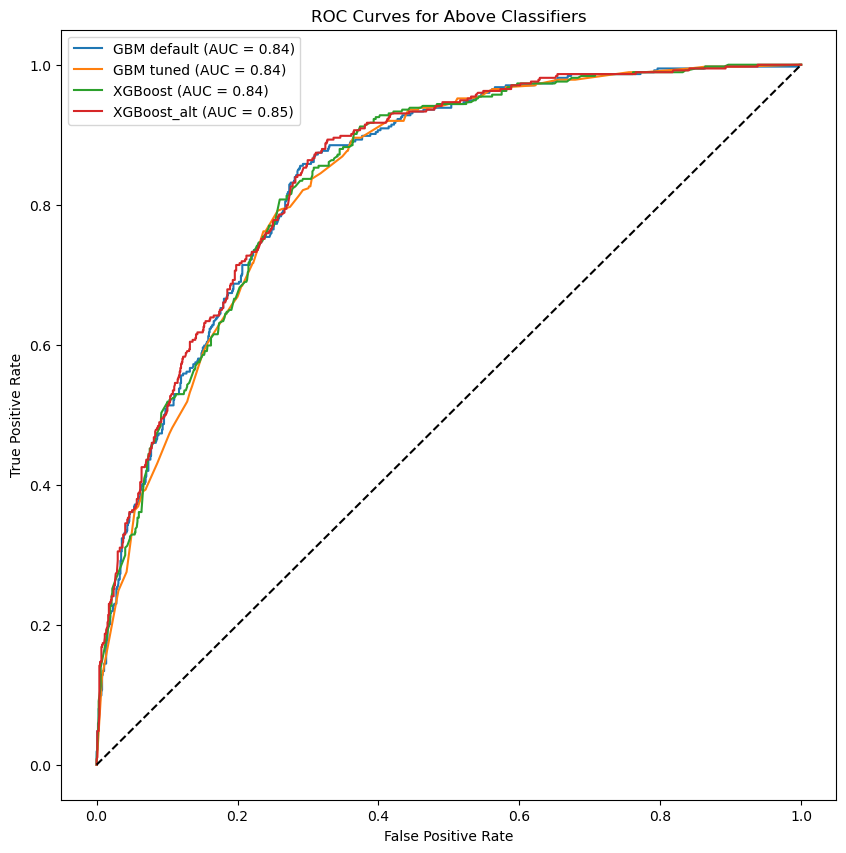

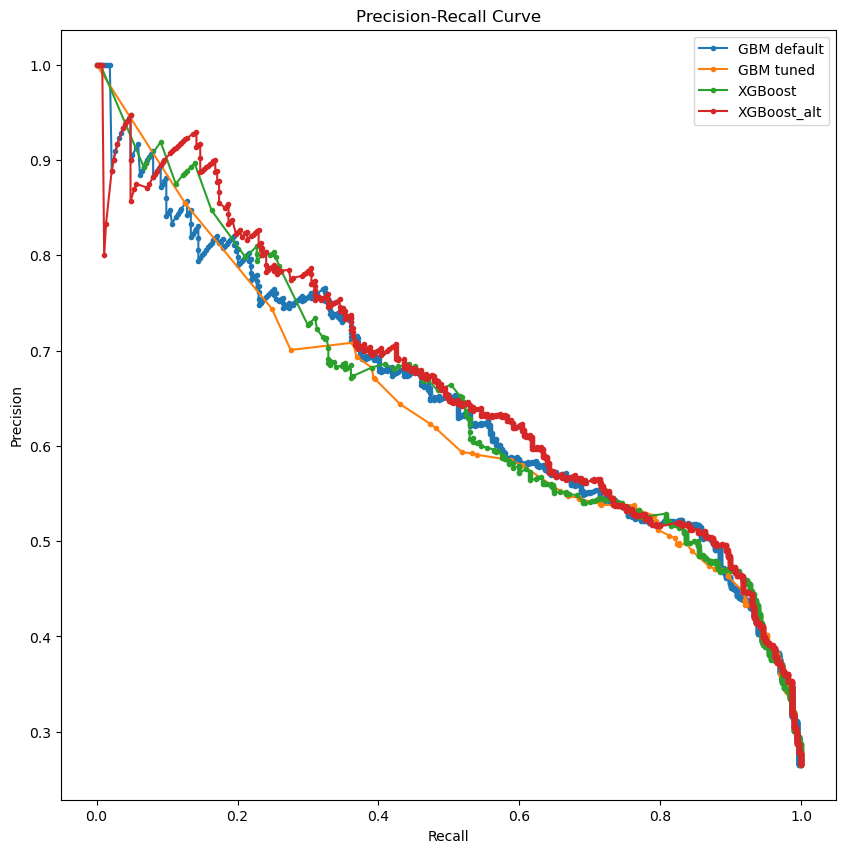


GBM default Confusion Matrix:
[[768 267]
 [ 83 291]]

GBM tuned Confusion Matrix:
[[724 311]
 [ 66 308]]

XGBoost Confusion Matrix:
[[735 300]
 [ 62 312]]

XGBoost_alt Confusion Matrix:
[[758 277]
 [ 77 297]]


In [21]:
models = {
  "GBM default": GradientBoostingClassifier(),
  "GBM tuned": GradientBoostingClassifier(n_estimators=10,max_depth=3),
  "XGBoost": XGBClassifier(n_estimators=10,max_depth=3),
  "XGBoost_alt": XGBClassifier(n_estimators=100,max_depth=1)
  }

results_gbm_tuned = fit_models_dict(models, X_train, y_train, X_test, y_test,
                    weight_churn,None)
display_fit_results(results_gbm_tuned,X_test,y_test,None)

Getting slightly better recall with XGBoost good stuff

# Examine correctly and incorrectly classified samples


GBM default:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5174
           1       0.55      0.82      0.66      1869

    accuracy                           0.77      7043
   macro avg       0.74      0.79      0.75      7043
weighted avg       0.82      0.77      0.79      7043

AUC-ROC: 0.8432

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      5174
           1       0.50      0.82      0.62      1869

    accuracy                           0.73      7043
   macro avg       0.71      0.76      0.71      7043
weighted avg       0.80      0.73      0.75      7043

AUC-ROC: 0.8363

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      5174
           1       0.52      0.83      0.64      1869

    accuracy                           0.75      7043
   macro avg       0.72      0.78      0.72      7043
weight

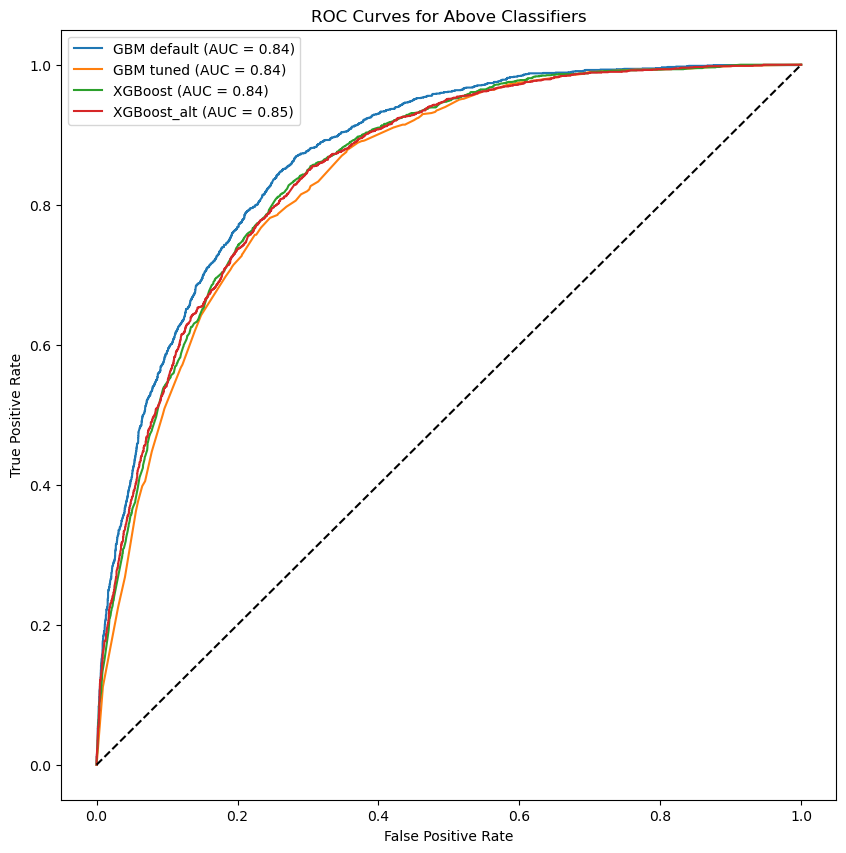

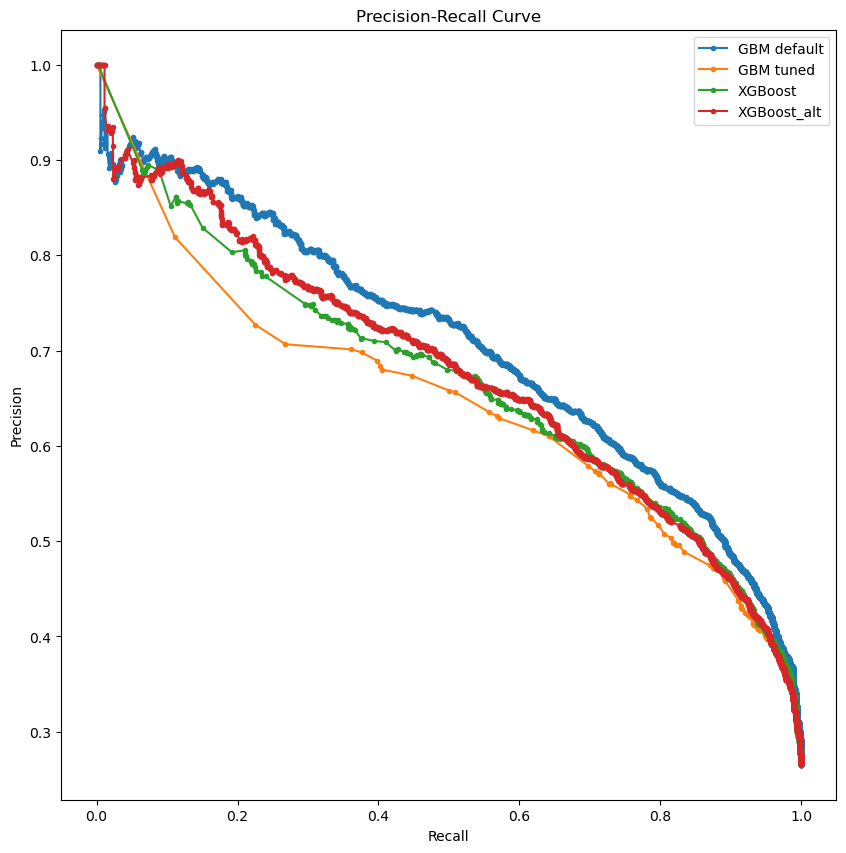


GBM default Confusion Matrix:
[[3917 1257]
 [ 330 1539]]

GBM tuned Confusion Matrix:
[[3635 1539]
 [ 339 1530]]

XGBoost Confusion Matrix:
[[3727 1447]
 [ 311 1558]]

XGBoost_alt Confusion Matrix:
[[3785 1389]
 [ 350 1519]]


In [17]:
# Display model results on full set not just test set

display_fit_results(results_gbm_tuned,X_scaled,y,None)

In [22]:
fav_result = results_gbm_tuned['XGBoost']

all_predictions = fav_result['model'].predict(X_scaled)

print (f'Predicted churners = {sum(all_predictions)}; True churners = {sum(y)}')

tp_fltr = (all_predictions == 1) & (y == 1)
fn_fltr = (all_predictions == 0) & (y == 1)
fp_fltr = (all_predictions == 1) & (y == 0)

print(f'True positives = {sum(tp_fltr)}; False negatives = {sum(fn_fltr)}; False positives = {sum(fp_fltr)}')

prediction_labels = tp_fltr + fn_fltr*2 + fp_fltr *3


df_predeval = df_clean
#Add product penetration which is a new column
df_predeval["ProductPenetration"] = df["ProductPenetration"]


# Add prediction labels
df_predeval["PredictionLabels"] = prediction_labels
df_predeval['PredictionLabels'] = df_predeval['PredictionLabels'].map({0:'TN',1:'TP',2:'FN',3:'FP'})



Predicted churners = 3005; True churners = 1869
True positives = 1558; False negatives = 311; False positives = 1447


## plot categorical vars

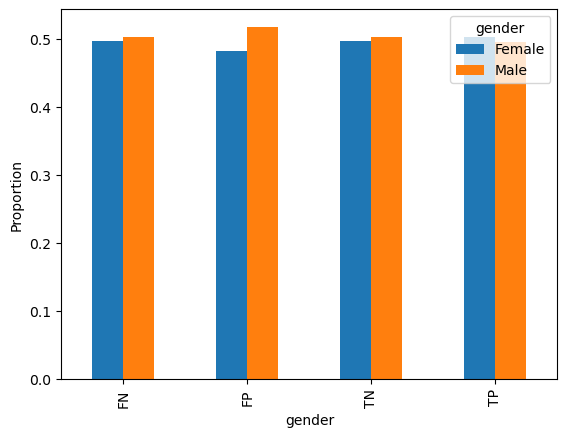

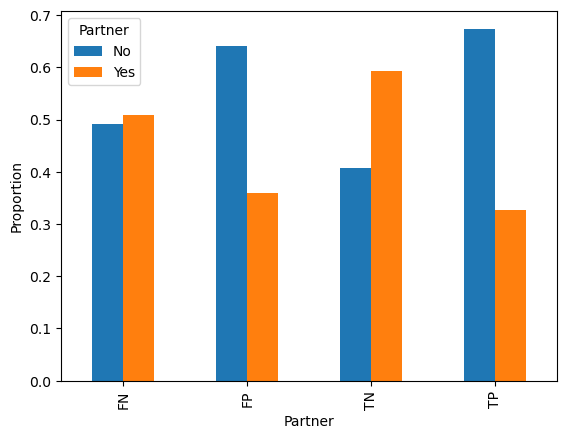

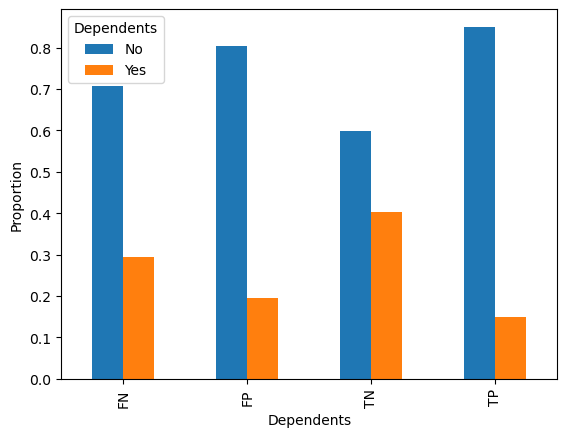

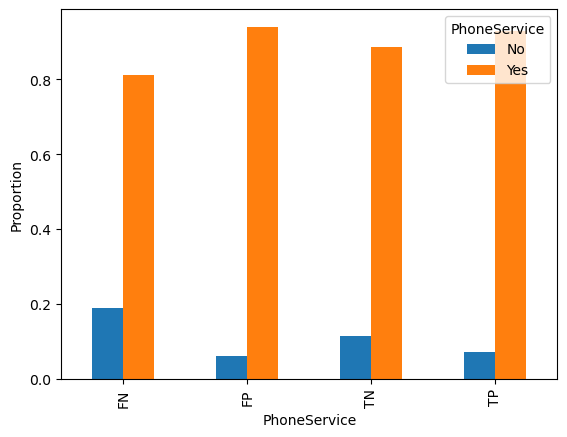

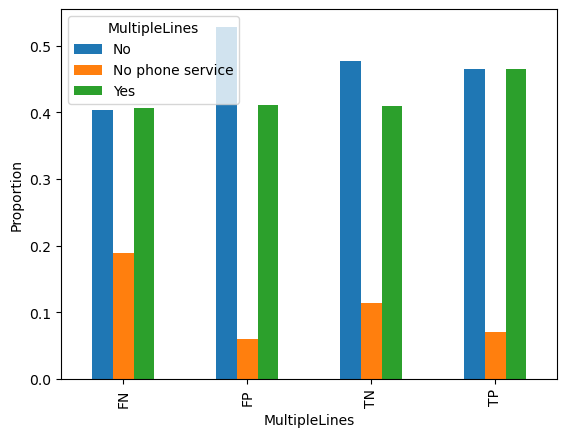

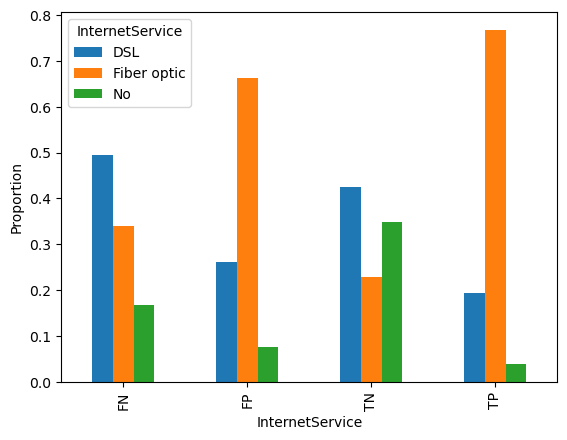

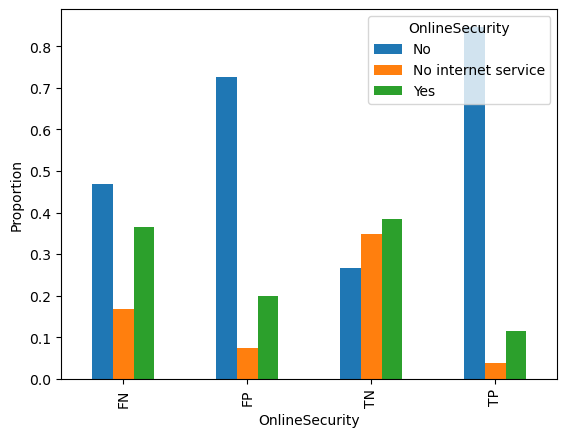

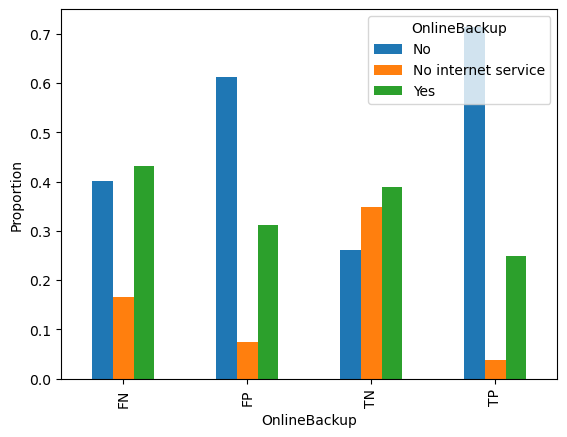

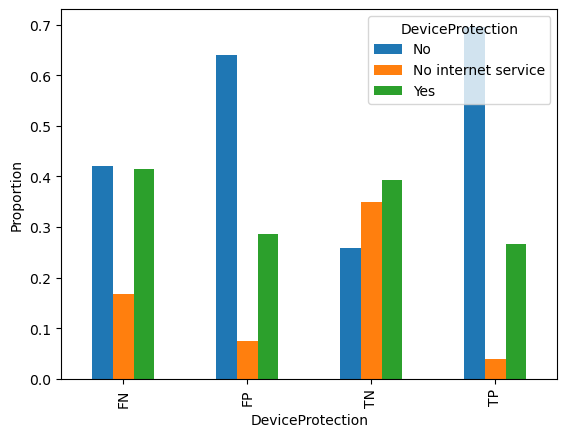

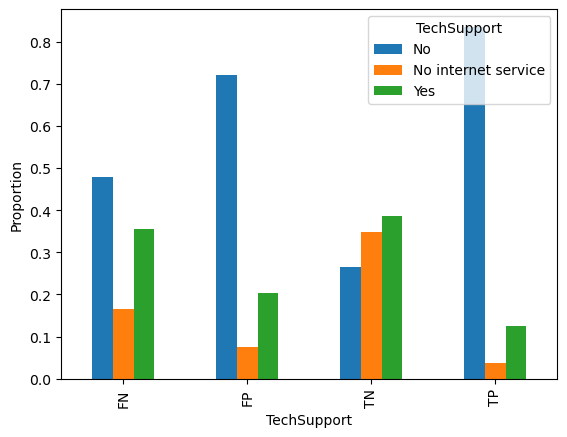

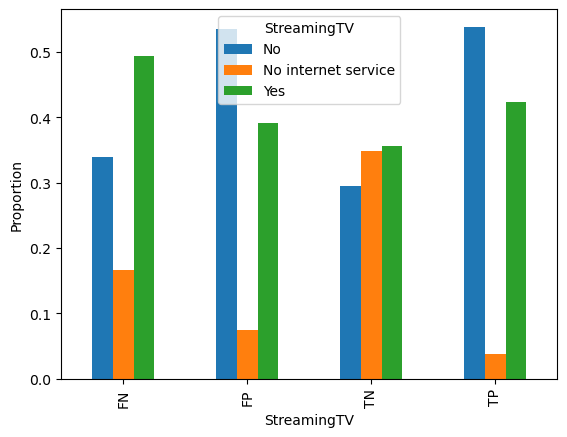

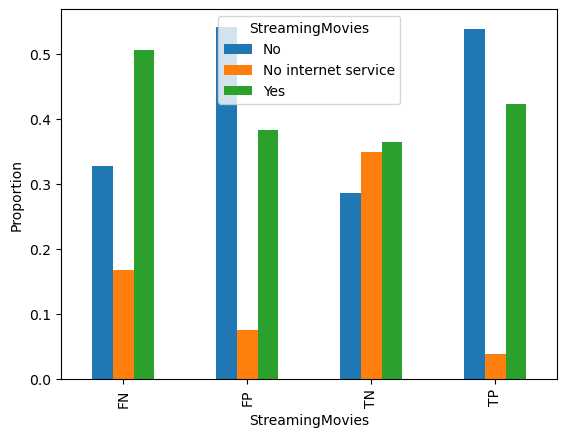

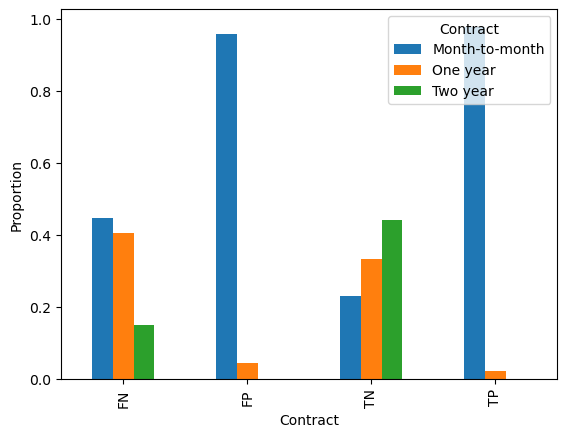

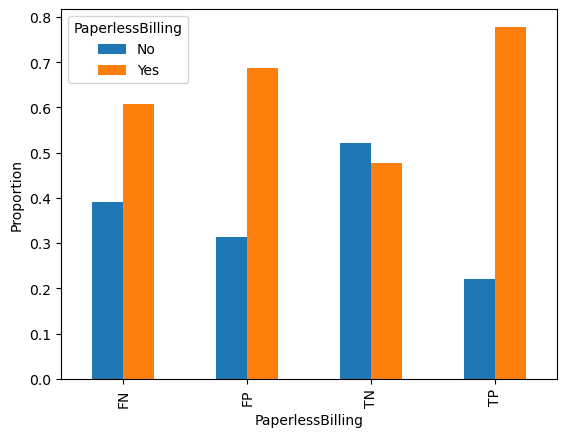

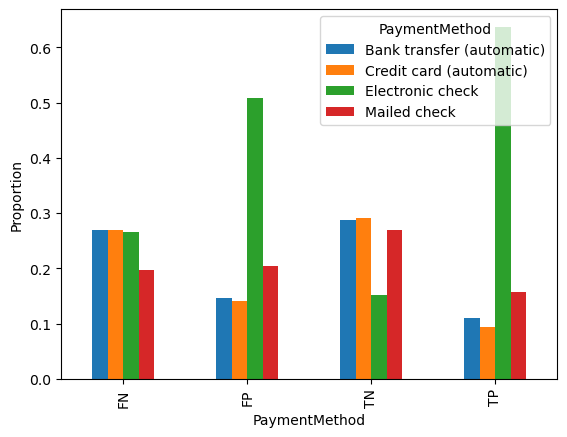

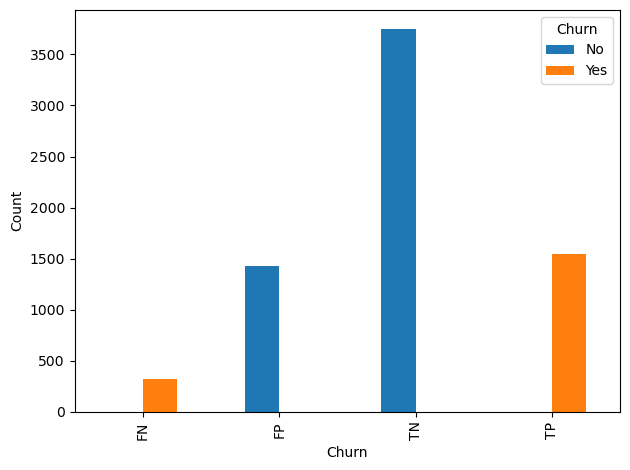

In [245]:
# Identify categorical and non-categorical variables
categorical_vars = df_predeval.select_dtypes(include=['object', 'category']).columns
non_categorical_vars = df_predeval.select_dtypes(exclude=['object', 'category']).columns

# Remove customer ID
categorical_vars = categorical_vars[1:]
categorical_vars = categorical_vars[:-1] #drop last variable which is our groupby variable

# Graph and evaluate barcharts
#plt.figure(figsize=(9, 30))

num_rows = np.ceil(len(categorical_vars)/2)

df_split = df_predeval.groupby("PredictionLabels")

# Create bar charts for categorical variables
for x,var in enumerate(categorical_vars):
    #plt.subplot(int(num_rows),2,x+1)
    if var == "Churn":
        df_split[var].value_counts().unstack().plot(kind='bar')
        x_lab = "Count"
    else:
        df_split[var].value_counts(normalize=True).unstack().plot(kind='bar')
        x_lab = "Proportion"
    plt.xlabel(var)
    plt.ylabel(x_lab)

plt.tight_layout()
plt.show()

## plot numerical

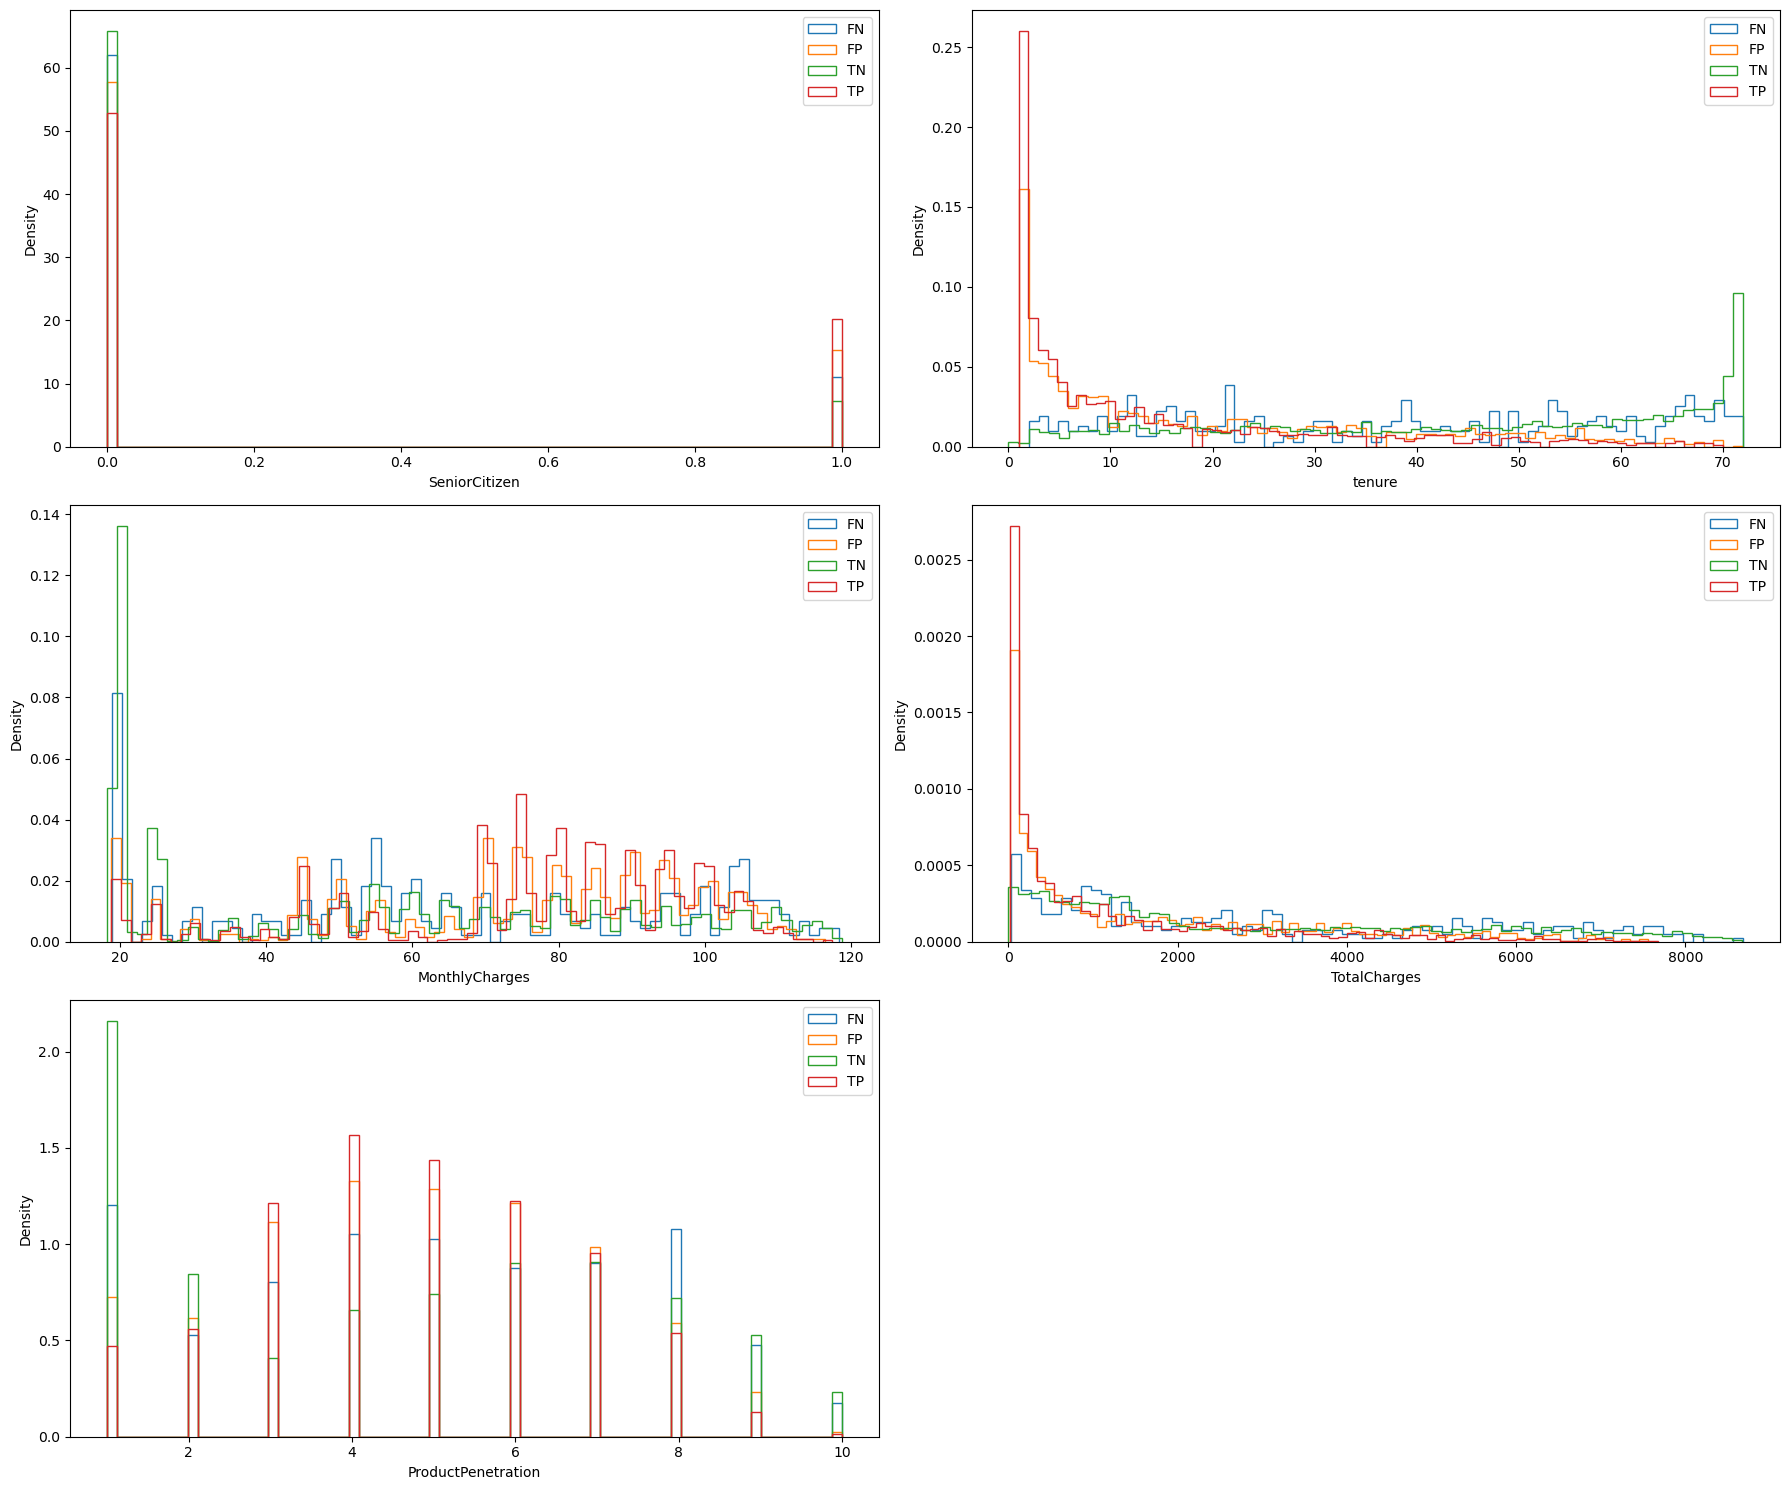

In [246]:
plt.figure(figsize=(18, 15))

num_rows = np.ceil(len(non_categorical_vars)/2)

# Create histograms for non-categorical variables
for x,var in enumerate(non_categorical_vars):
    plt.subplot(int(num_rows),2,x+1)
    df_split[var].plot(kind='hist', histtype='step',density=True, bins=73, legend=True)
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Drop potentially disruptive columns

While not the focus before actually false positive is a far bigger problem than false negative. What happens if we drop the variables where FP and TP show similar proportions to each other but not to FN and TN.

For now let's just do this with categorical variables since all the numeric variables seem to behave like this.

Generally it feels like this pattern might be indicative that these columns are important for the model and so performance may well get a lot worse after removing them

In [23]:
all_disruptiveCols = ["Partner", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","contract_dur_months","PaymentMethod"]

def drop_scale_split_test(disruptiveCols, X, y):

    X_filtered = X.drop(columns=disruptiveCols)
    # scale and split
    X_scaled = scaler.fit_transform(X_filtered)

    # Split in test and train
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,test_size=0.2, random_state=89)

    #Evaluate
    models = {
    "GBM default": GradientBoostingClassifier(),
    "GBM tuned": GradientBoostingClassifier(n_estimators=10,max_depth=3),
    "XGBoost": XGBClassifier(n_estimators=10,max_depth=3),
    "XGBoost_alt": XGBClassifier(n_estimators=100,max_depth=1)
    }
    # models = {
    # "Catboost": CatBoostClassifier(),
    # "XGBoost_alt": XGBClassifier(n_estimators=100,max_depth=1)
    # }

    weight_churn = compute_sample_weight(class_weight="balanced", y=y_train)

    results_gbm_tuned = fit_models_dict(models, X_train, y_train, X_test, y_test,
                        weight_churn,None)
    display_fit_results(results_gbm_tuned,X_test,y_test,None)

    return results_gbm_tuned, X_test, X_scaled


Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1035
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409

AUC-ROC: 0.8302

GBM tuned:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1035
           1       0.46      0.79      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.70      0.72      1409

AUC-ROC: 0.8137

XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.75      0.60       374

    accuracy                           0

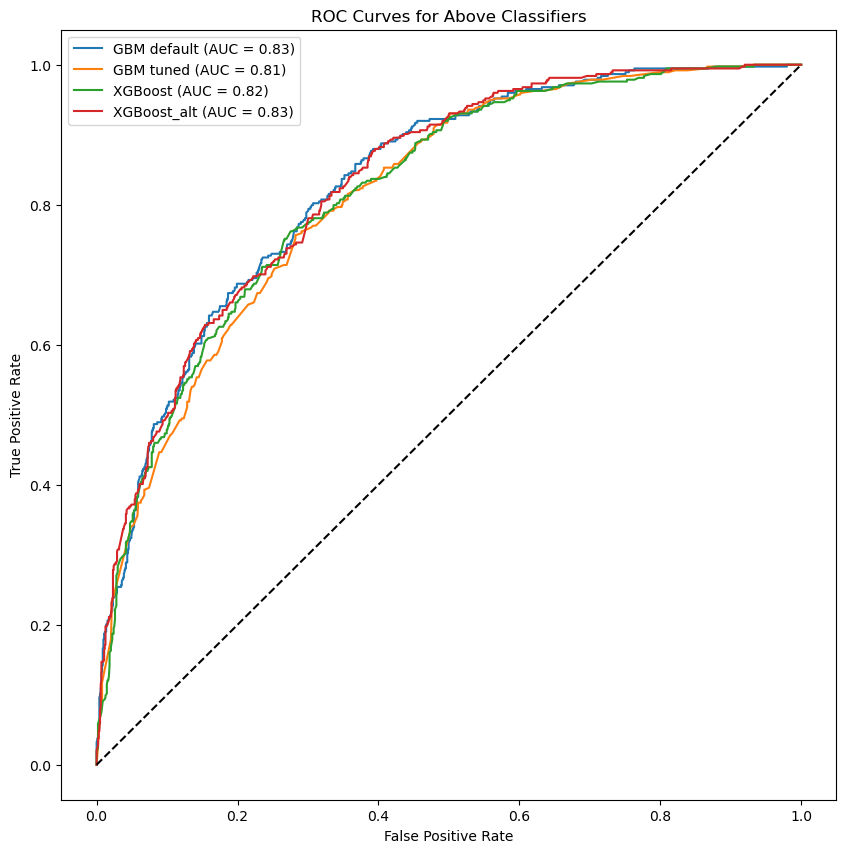

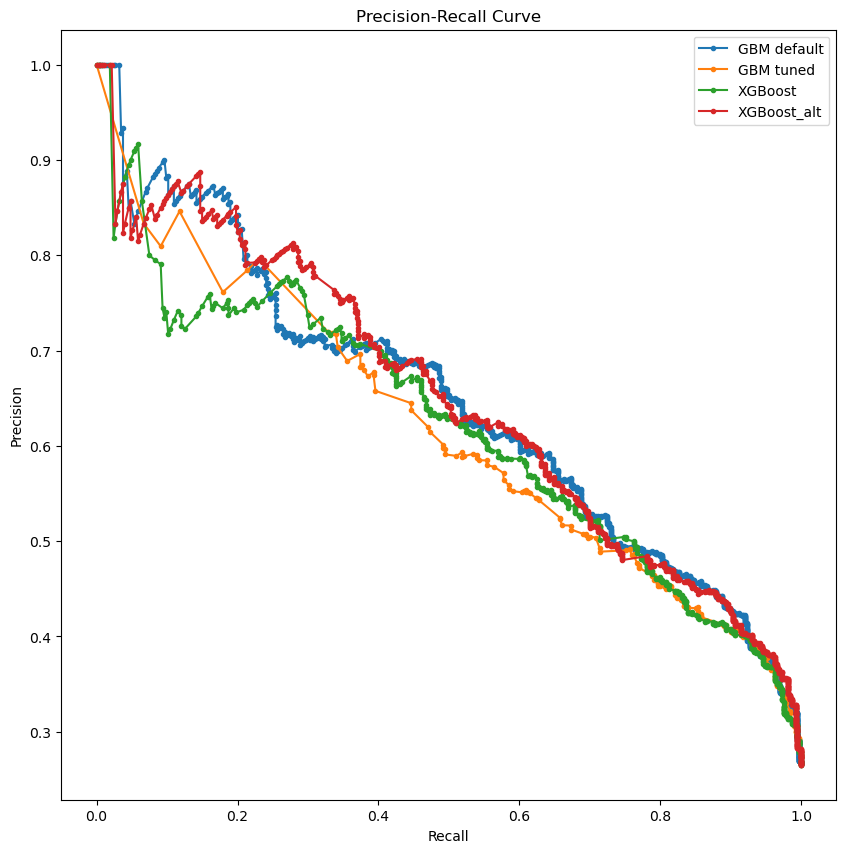


GBM default Confusion Matrix:
[[771 264]
 [101 273]]

GBM tuned Confusion Matrix:
[[694 341]
 [ 78 296]]

XGBoost Confusion Matrix:
[[759 276]
 [ 93 281]]

XGBoost_alt Confusion Matrix:
[[765 270]
 [103 271]]


In [24]:
# Drop all (probably too much)
drop_all, X_drop_all, fullX_drop_all = drop_scale_split_test(all_disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8390

GBM tuned:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1035
           1       0.49      0.84      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.81      0.73      0.74      1409

AUC-ROC: 0.8325

XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0

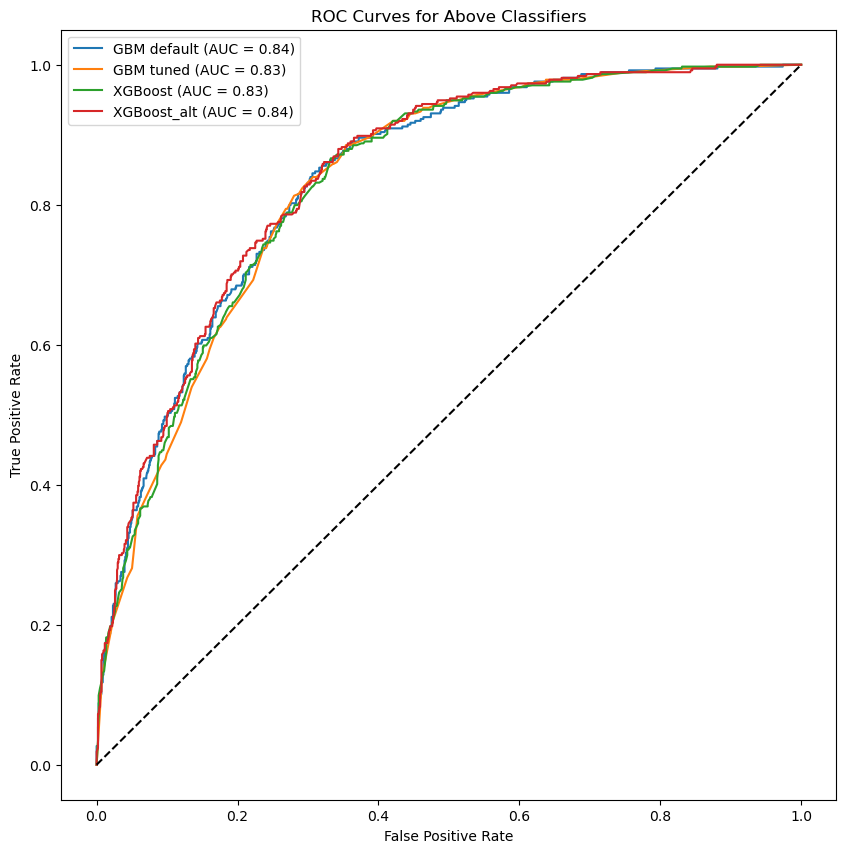

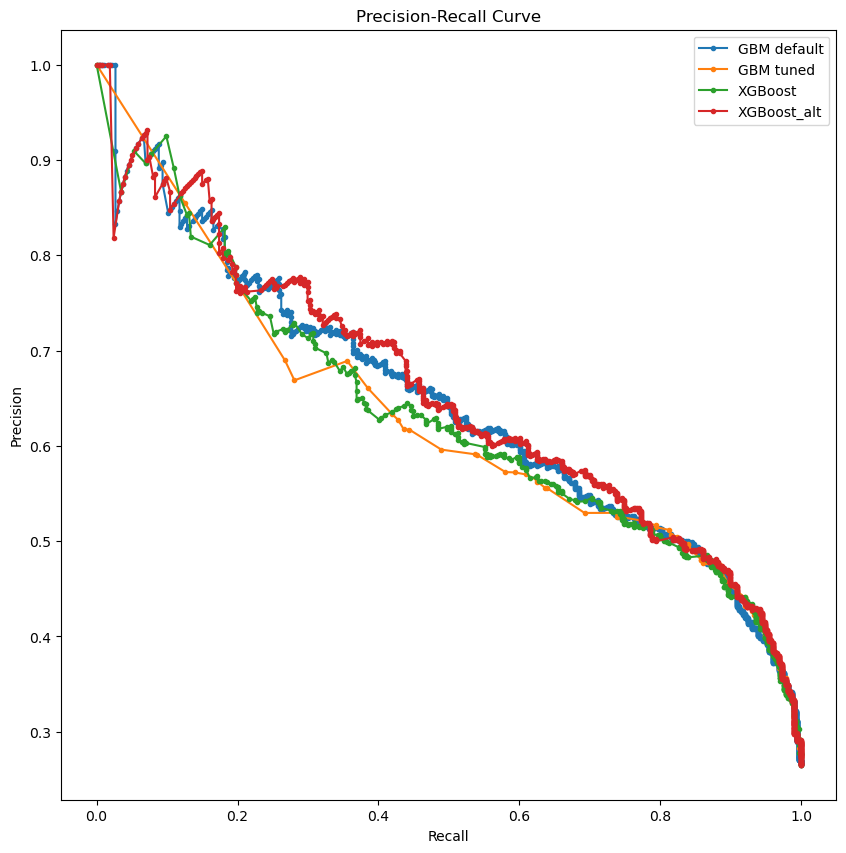


GBM default Confusion Matrix:
[[759 276]
 [ 81 293]]

GBM tuned Confusion Matrix:
[[706 329]
 [ 58 316]]

XGBoost Confusion Matrix:
[[735 300]
 [ 73 301]]

XGBoost_alt Confusion Matrix:
[[741 294]
 [ 77 297]]


In [25]:
# only drop internet related stuff
disruptiveCols = ["InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

drop_internetAll, X_drop_internetAll, fullX_drop_internetALL = drop_scale_split_test(disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8421

GBM tuned:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409

AUC-ROC: 0.8361

XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.79      0.62       374

    accuracy                           0

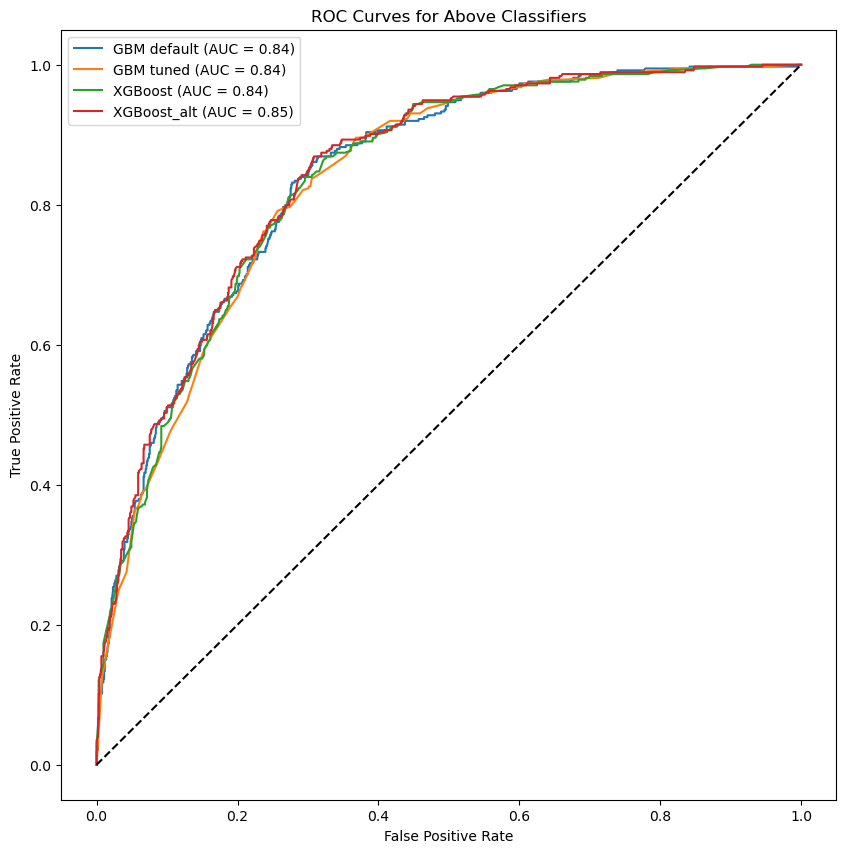

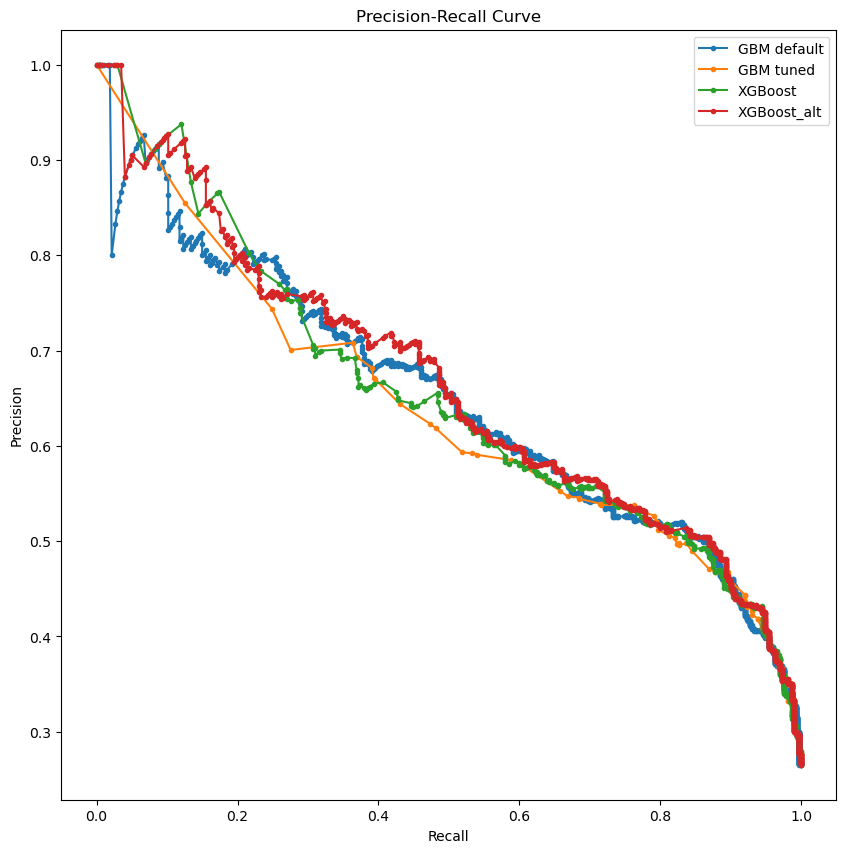


GBM default Confusion Matrix:
[[767 268]
 [ 82 292]]

GBM tuned Confusion Matrix:
[[724 311]
 [ 66 308]]

XGBoost Confusion Matrix:
[[762 273]
 [ 80 294]]

XGBoost_alt Confusion Matrix:
[[746 289]
 [ 72 302]]


In [26]:
# only drop internet extras
disruptiveCols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

drop_internetExtras, X_drop_internetExtras, fullX_drop_internetExtras = drop_scale_split_test(disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8384

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1035
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.71      0.73      1409

AUC-ROC: 0.8254

XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0

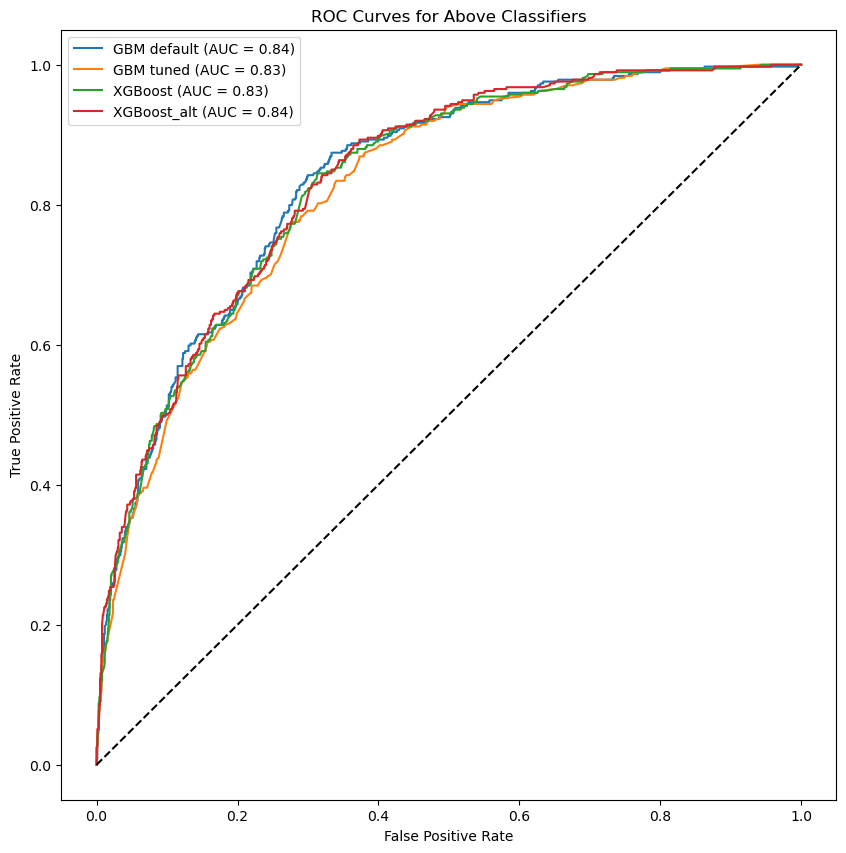

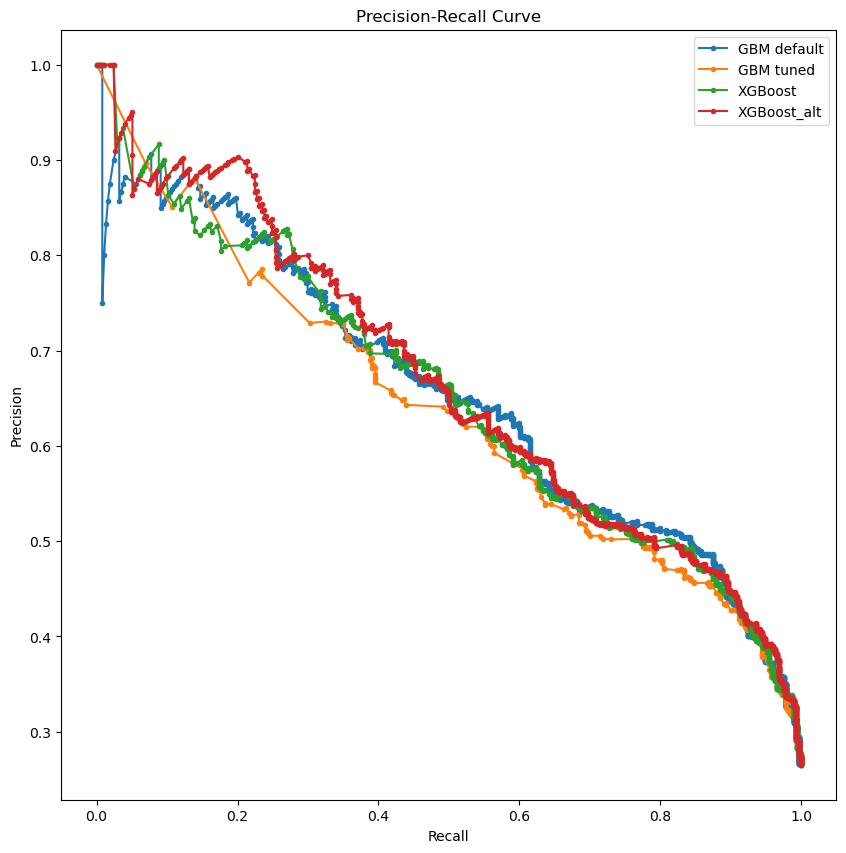


GBM default Confusion Matrix:
[[770 265]
 [ 87 287]]

GBM tuned Confusion Matrix:
[[706 329]
 [ 74 300]]

XGBoost Confusion Matrix:
[[764 271]
 [ 93 281]]

XGBoost_alt Confusion Matrix:
[[769 266]
 [ 93 281]]


In [27]:
#all_disruptiveCols = ["Partner", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","contract_dur_months","PaymentMethod"]

disruptiveCols = ["Partner", "contract_dur_months","PaymentMethod"]


drop_nonInternet, X_drop_nonInternet, fullX_drop_nonInternet = drop_scale_split_test(disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8423

GBM tuned:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1035
           1       0.50      0.82      0.62       374

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.73      0.75      1409

AUC-ROC: 0.8363

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.83      0.63       374

    accuracy                           0

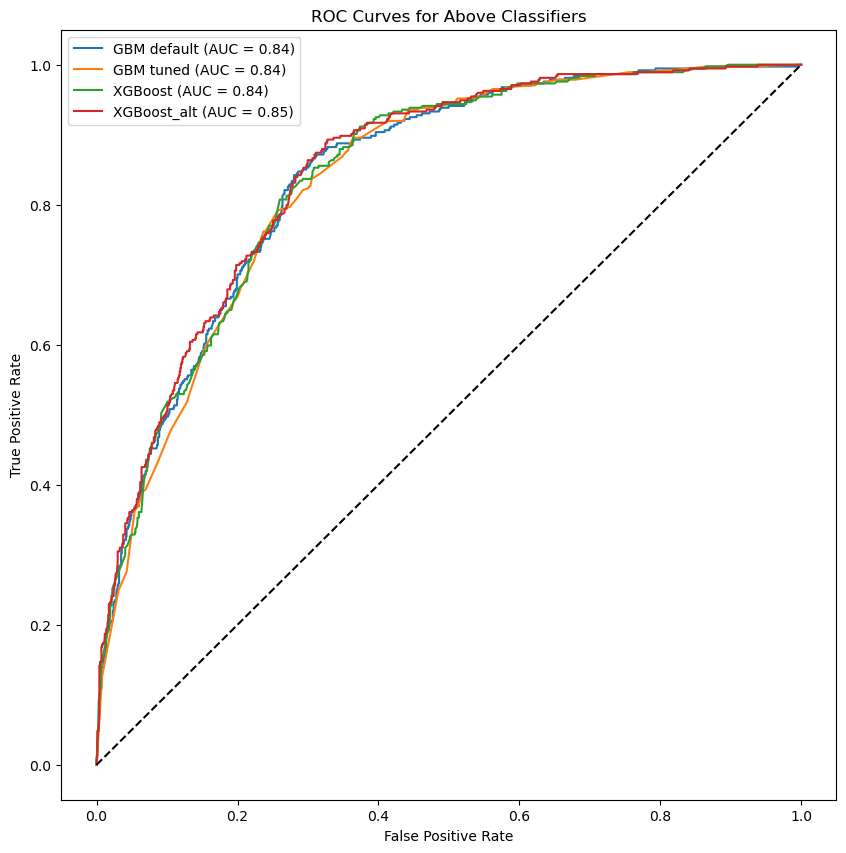

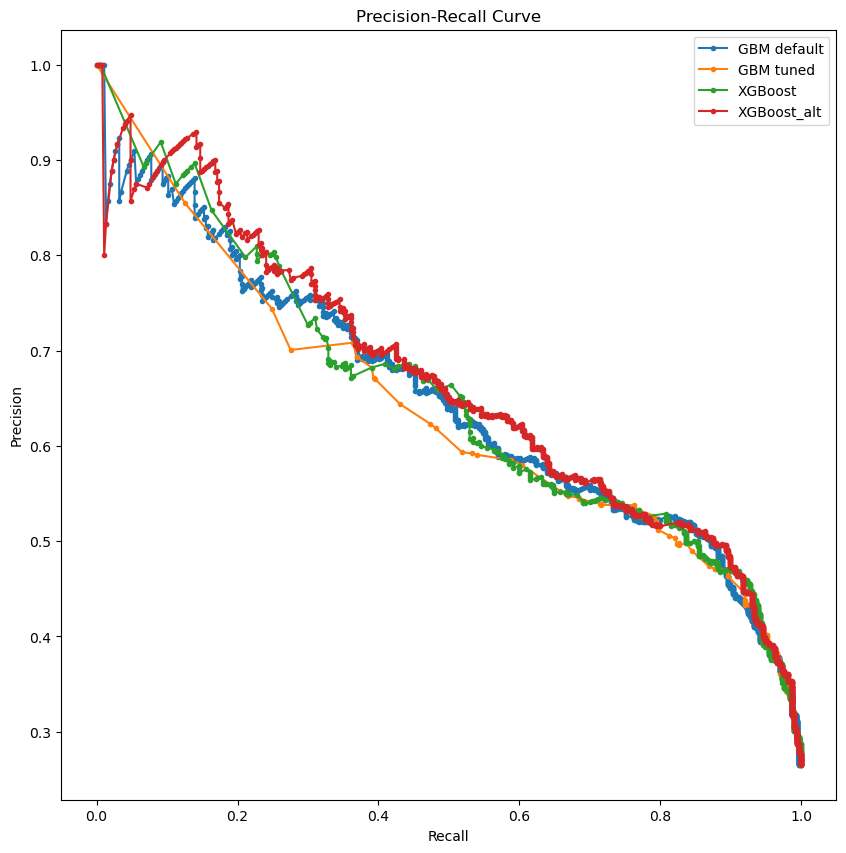


GBM default Confusion Matrix:
[[767 268]
 [ 83 291]]

GBM tuned Confusion Matrix:
[[724 311]
 [ 66 308]]

XGBoost Confusion Matrix:
[[735 300]
 [ 62 312]]

XGBoost_alt Confusion Matrix:
[[758 277]
 [ 77 297]]


In [28]:
#all_disruptiveCols = ["Partner", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","contract_dur_months","PaymentMethod"]

disruptiveCols = ["Partner"]


drop_partner, X_drop_partner, fullX_drop_partner = drop_scale_split_test(disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.51      0.74      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.74      0.76      1409

AUC-ROC: 0.8346

GBM tuned:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.79      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409

AUC-ROC: 0.8227

XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.73      0.81      1035
           1       0.51      0.76      0.61       374

    accuracy                           0

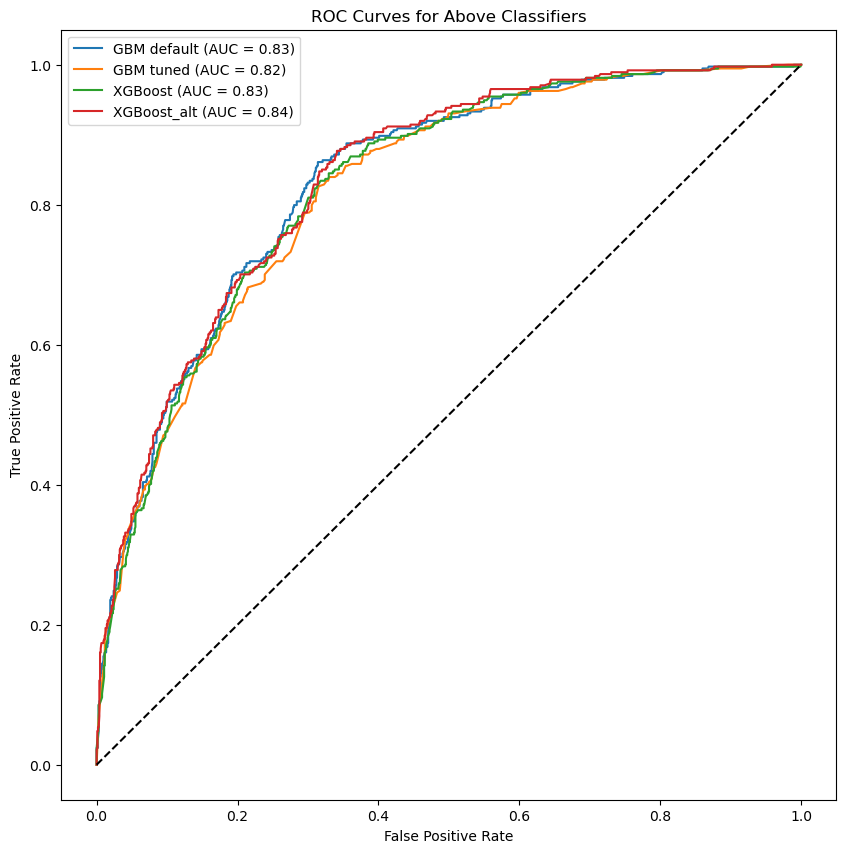

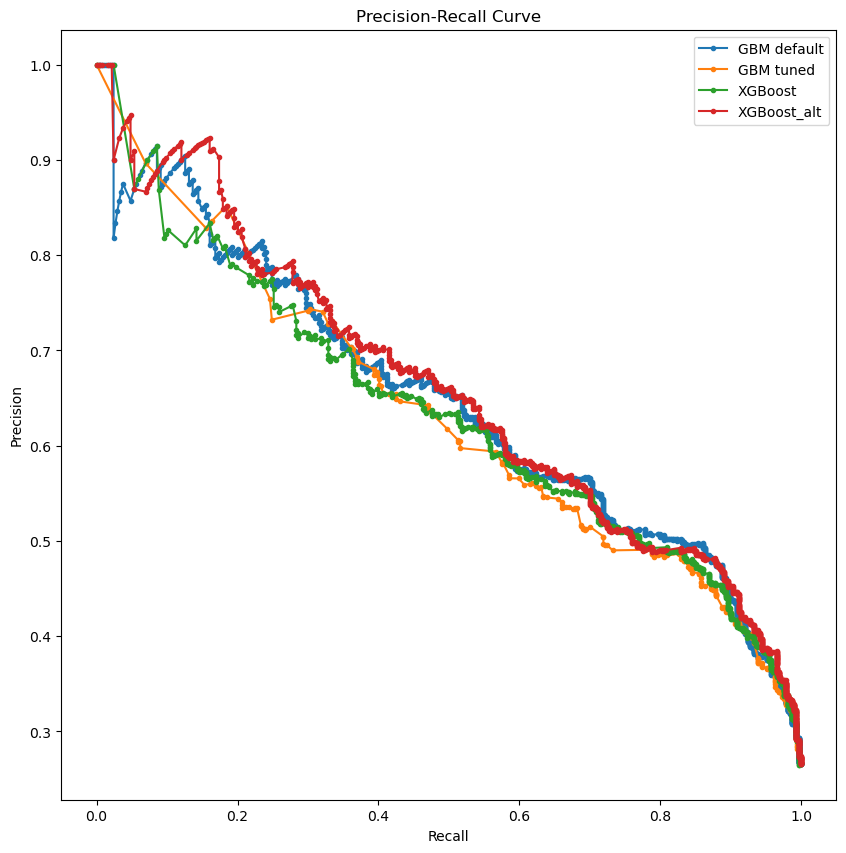


GBM default Confusion Matrix:
[[773 262]
 [ 98 276]]

GBM tuned Confusion Matrix:
[[728 307]
 [ 79 295]]

XGBoost Confusion Matrix:
[[758 277]
 [ 90 284]]

XGBoost_alt Confusion Matrix:
[[772 263]
 [100 274]]


In [29]:
#all_disruptiveCols = ["Partner", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","contract_dur_months","PaymentMethod"]

disruptiveCols = ["contract_dur_months"]


drop_contractDur, X_drop_contractDur, fullX_drop_contractDur = drop_scale_split_test(disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

AUC-ROC: 0.8463

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8378

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.51      0.82      0.63       374

    accuracy                           0

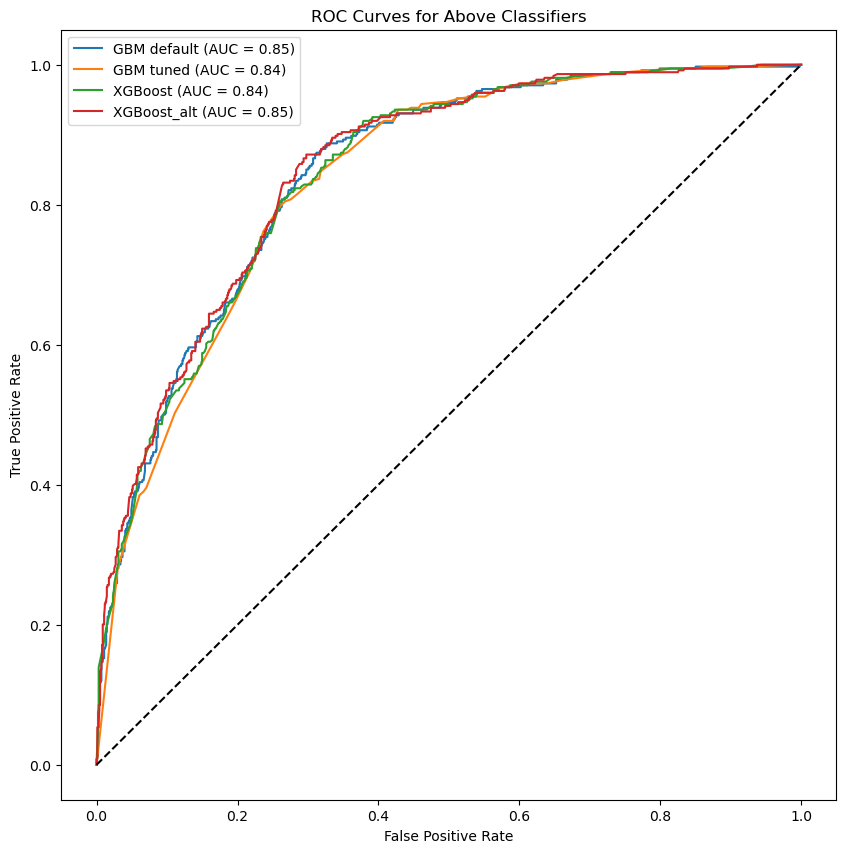

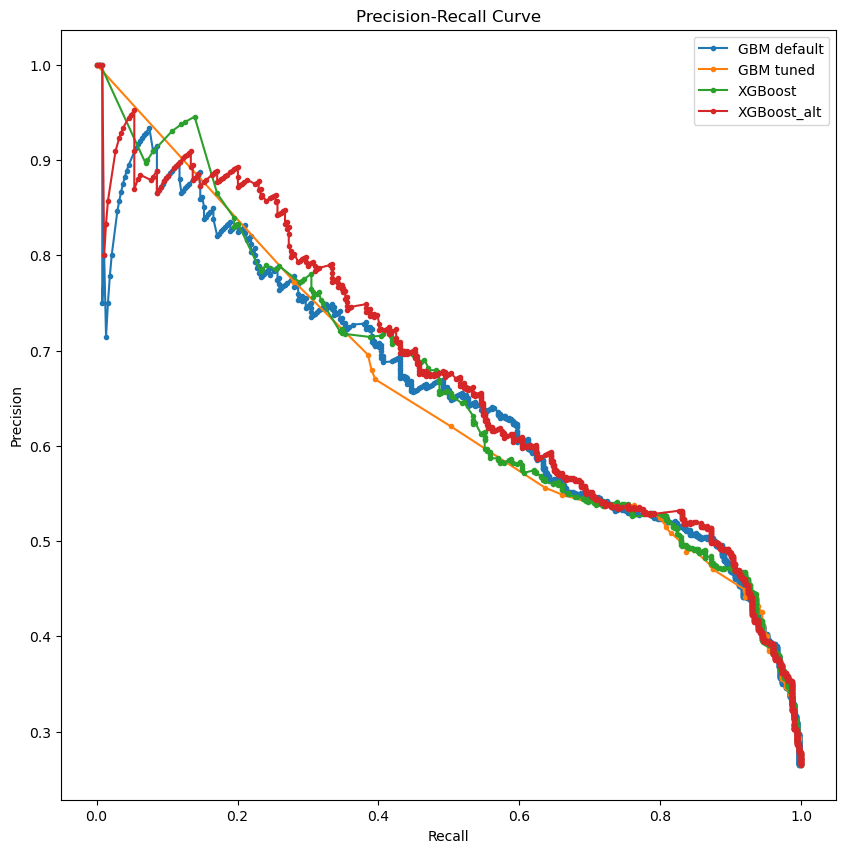


GBM default Confusion Matrix:
[[763 272]
 [ 73 301]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[744 291]
 [ 67 307]]

XGBoost_alt Confusion Matrix:
[[749 286]
 [ 62 312]]


In [30]:
#all_disruptiveCols = ["Partner", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","contract_dur_months","PaymentMethod"]

disruptiveCols = ["PaymentMethod"]


drop_PayMeth, X_drop_PayMeth, fullX_drop_PayMeth = drop_scale_split_test(disruptiveCols, X, y)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

AUC-ROC: 0.8458

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8378

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.51      0.82      0.63       374

    accuracy                           0

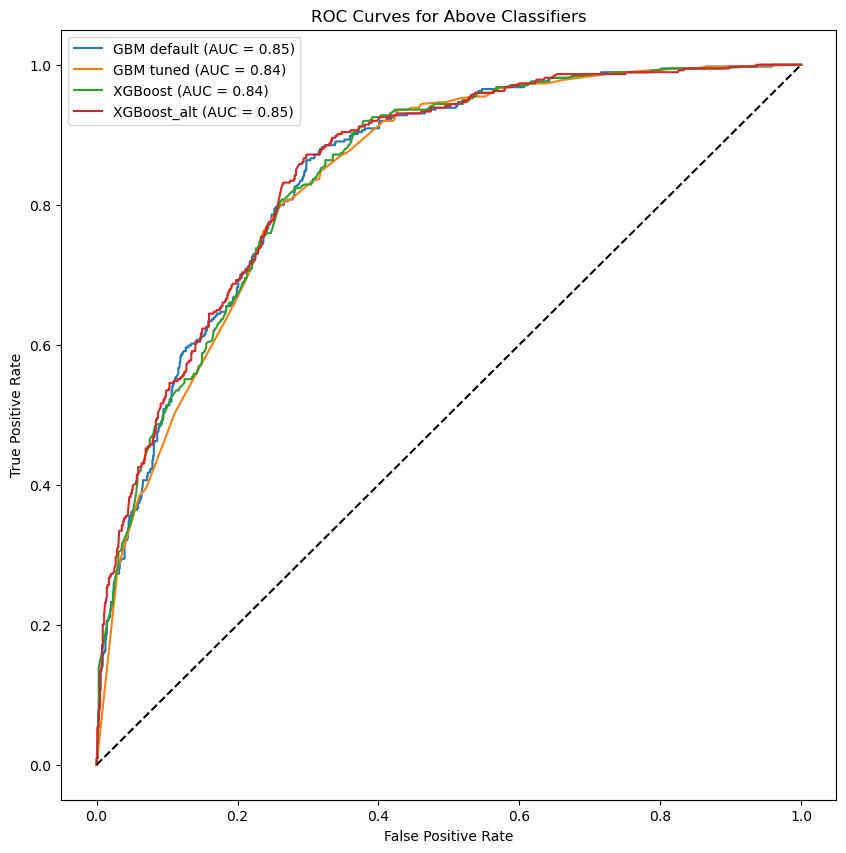

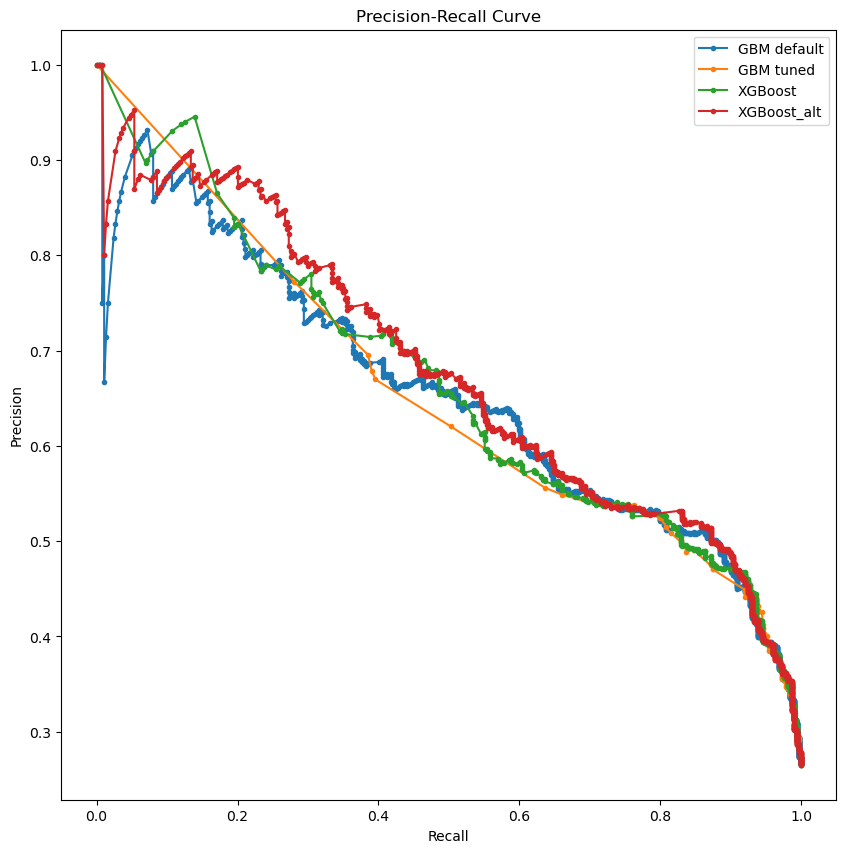


GBM default Confusion Matrix:
[[761 274]
 [ 75 299]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[744 291]
 [ 67 307]]

XGBoost_alt Confusion Matrix:
[[749 286]
 [ 62 312]]


In [27]:
#all_disruptiveCols = ["Partner", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","contract_dur_months","PaymentMethod"]

disruptiveCols = ["Partner","PaymentMethod","is_female"] #Also drop partner since the original model doesn't seem to use it


drop_PayMeth, X_drop_PayMeth, fullX_drop_PayMeth = drop_scale_split_test(disruptiveCols, X, y)

## Combine different dropped models

In [31]:
# We need to rewrite the plotting function to allow different X_tests

def display_fit_results_dropped(results,y_test,curr_test_weights=None):

    # Display Results
    plt.figure(figsize=(12,12))

    for name, result in results.items():
        print(f"\n{name}:")
        print(classification_report(y_test, result["model"].predict(result["X_test"]),sample_weight=curr_test_weights))

        if result["auc"] is not None:
            y_proba = result["model"].predict_proba(result["X_test"])[:, 1] if hasattr(result["model"], 'predict_proba') else None

            print(f"AUC-ROC: {result['auc']:.4f}")

            # Visualization of ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_proba,sample_weight=curr_test_weights)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Above Classifiers")
    plt.legend()
    plt.show()

    # Plot the precision-recall curve
    plt.figure(figsize=(12,12))

    # Compute the precision-recall curve
    for name, result in results.items():
        if result["auc"] is not None:
          y_proba = result["model"].predict_proba(result["X_test"])[:, 1] if hasattr(result["model"], 'predict_proba') else None

          precision, recall, thresholds = precision_recall_curve(y_test, y_proba,sample_weight=curr_test_weights)

          plt.plot(recall, precision, marker='.', label=f"{name}")
          
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    for name, result in results.items():
        # Generate the confusion matrix
        y_pred = result["model"].predict(result["X_test"])
        cm = confusion_matrix(y_test, y_pred)

        # Print the confusion matrix
        print(f"\n{name} Confusion Matrix:")
        print(cm)


no_drop:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8486

drop_all:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1035
           1       0.50      0.72      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409

AUC-ROC: 0.8305

drop_internetAll:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
we

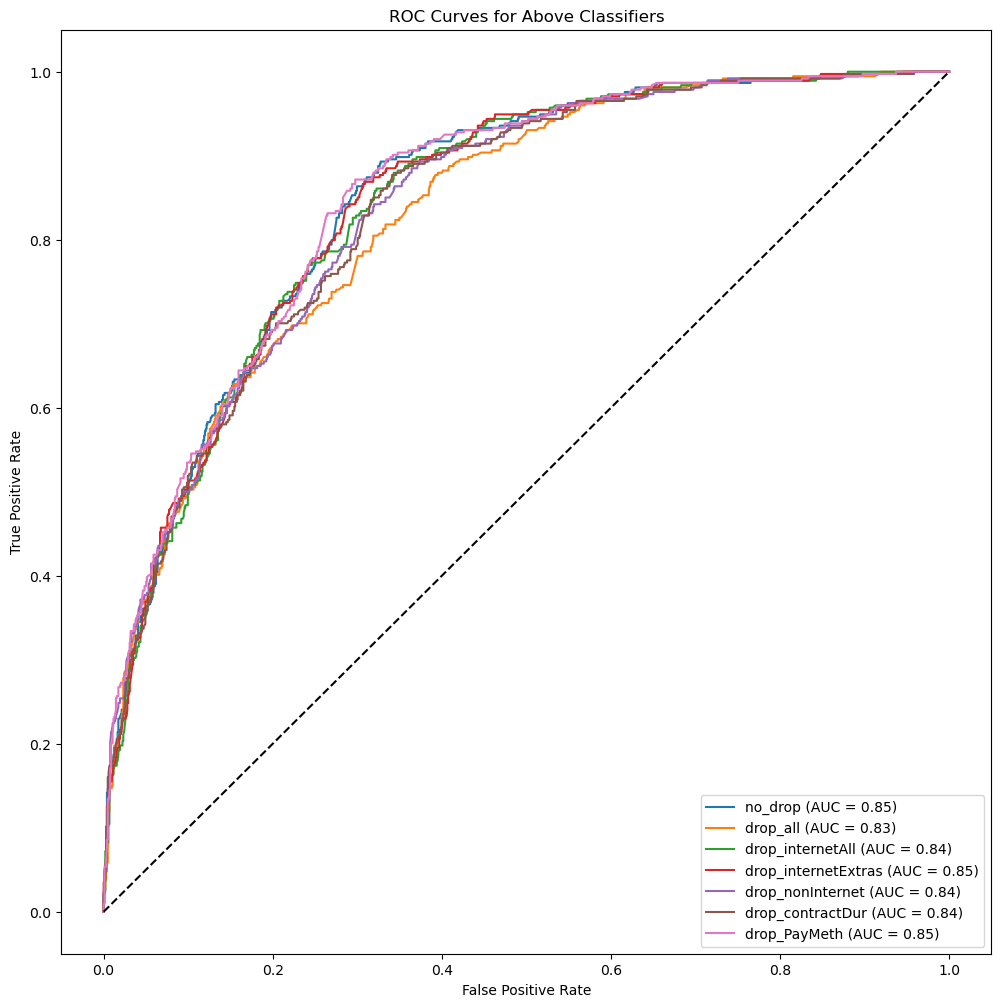

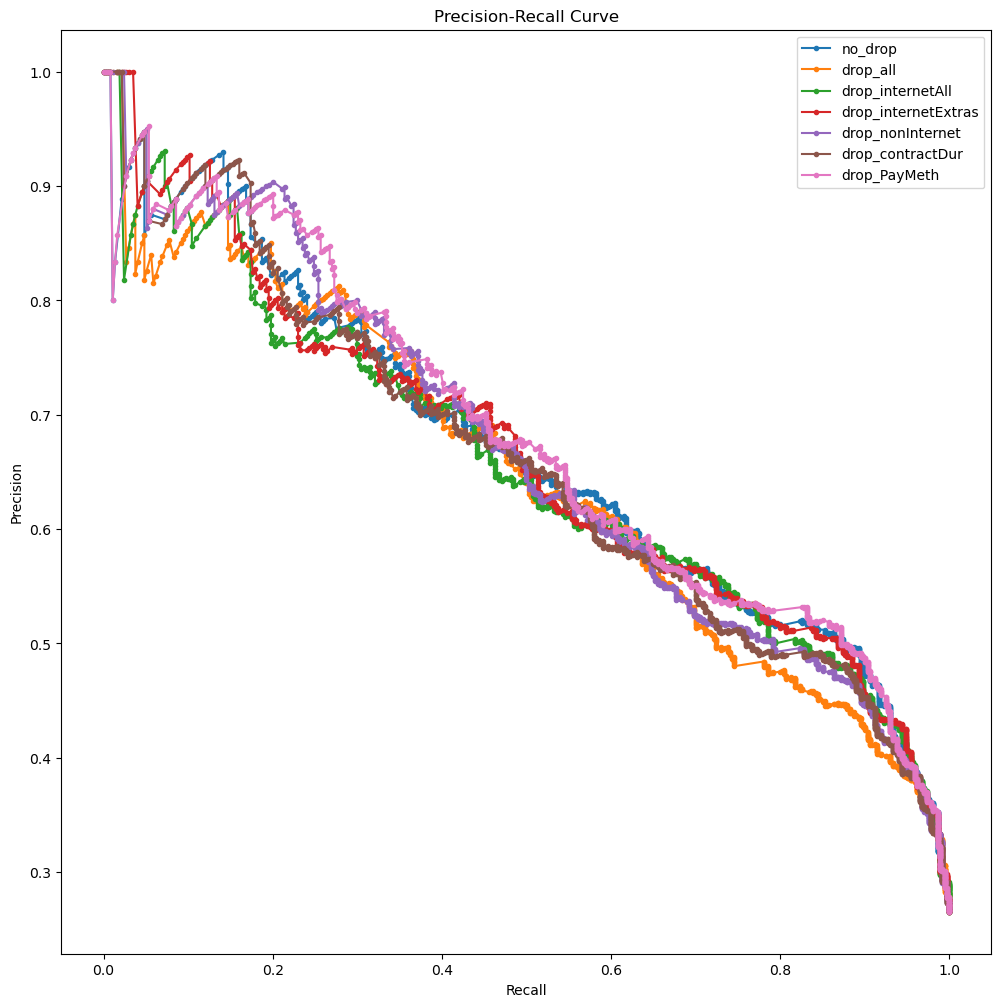


no_drop Confusion Matrix:
[[758 277]
 [ 77 297]]

drop_all Confusion Matrix:
[[765 270]
 [103 271]]

drop_internetAll Confusion Matrix:
[[741 294]
 [ 77 297]]

drop_internetExtras Confusion Matrix:
[[746 289]
 [ 72 302]]

drop_nonInternet Confusion Matrix:
[[769 266]
 [ 93 281]]

drop_contractDur Confusion Matrix:
[[772 263]
 [100 274]]

drop_PayMeth Confusion Matrix:
[[749 286]
 [ 62 312]]


In [32]:
dropped_results = {"no_drop":results_gbm_tuned['XGBoost_alt'],
                   "drop_all":drop_all['XGBoost_alt'],
                   "drop_internetAll":drop_internetAll['XGBoost_alt'],
                   "drop_internetExtras":drop_internetExtras['XGBoost_alt'],
                   "drop_nonInternet":drop_nonInternet['XGBoost_alt'],
                   #"drop_partner":drop_partner['XGBoost_alt'],
                   "drop_contractDur":drop_contractDur['XGBoost_alt'],
                   "drop_PayMeth":drop_PayMeth['XGBoost_alt'],
                   #"drop_SHAP":drop_SHAP["XGBoost_alt"]
                   }
dropped_results["no_drop"]["X_test"] = X_test
dropped_results["drop_all"]["X_test"] = X_drop_all
dropped_results["drop_internetAll"]["X_test"] = X_drop_internetAll
dropped_results["drop_internetExtras"]["X_test"] = X_drop_internetExtras
dropped_results["drop_nonInternet"]["X_test"] = X_drop_nonInternet
#dropped_results["drop_partner"]["X_test"] = X_drop_partner
dropped_results["drop_contractDur"]["X_test"] = X_drop_contractDur
dropped_results["drop_PayMeth"]["X_test"] = X_drop_PayMeth
#dropped_results["drop_SHAP"]["X_test"] = X_drop_SHAP

dropped_results["no_drop"]["X_scaled"] = X_scaled
dropped_results["drop_all"]["X_scaled"] = fullX_drop_all
dropped_results["drop_internetAll"]["X_scaled"] = fullX_drop_internetALL
dropped_results["drop_internetExtras"]["X_scaled"] = fullX_drop_internetExtras
dropped_results["drop_nonInternet"]["X_scaled"] = fullX_drop_nonInternet
#dropped_results["drop_partner"]["X_scaled"] = fullX_drop_partner
dropped_results["drop_contractDur"]["X_scaled"] = fullX_drop_contractDur
dropped_results["drop_PayMeth"]["X_scaled"] = fullX_drop_PayMeth
#dropped_results["drop_SHAP"]["X_scaled"] = fullX_drop_SHAP

display_fit_results_dropped(dropped_results,y_test)


Dropping payment method appears to be mildly beneficial nothing else really matters

# Using SHAP to uncover the main variables

In [33]:
import shap
shap.initjs()

In [34]:
X.columns.tolist()

['is_female',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'contract_dur_months',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'ProductPenetration']

2.1048425695724404e-06


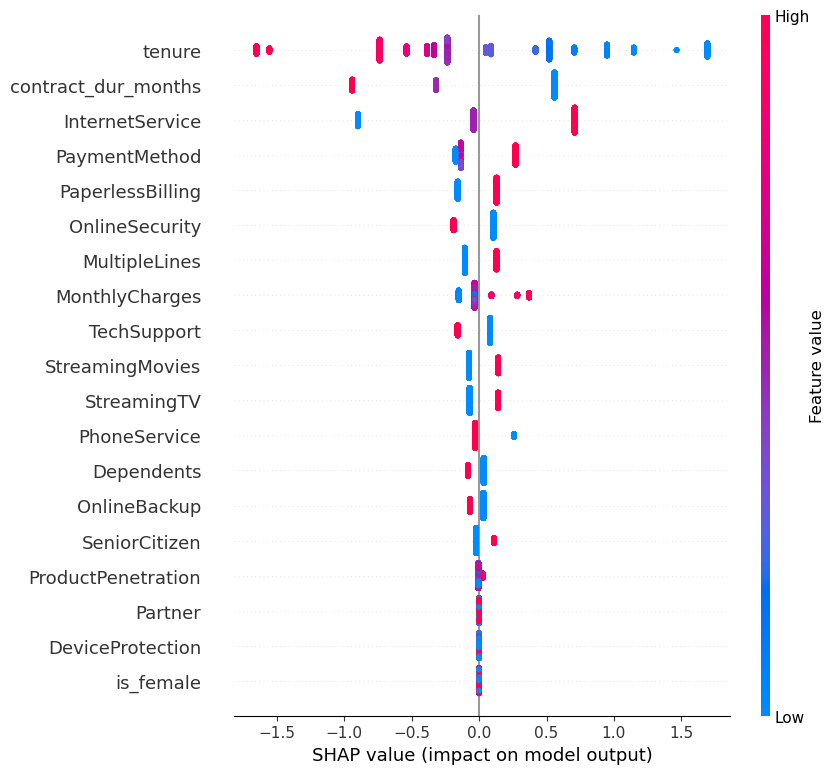

In [35]:
# Original model
model = dropped_results["no_drop"]['model']
Xd = dropped_results["no_drop"]["X_scaled"]

#convert to data frame to get feature names back
Xd = pd.DataFrame(Xd, columns=['is_female',
                                'SeniorCitizen',
                                'Partner',
                                'Dependents',
                                'tenure',
                                'PhoneService',
                                'MultipleLines',
                                'InternetService',
                                'OnlineSecurity',
                                'OnlineBackup',
                                'DeviceProtection',
                                'TechSupport',
                                'StreamingTV',
                                'StreamingMovies',
                                'contract_dur_months',
                                'PaperlessBilling',
                                'PaymentMethod',
                                'MonthlyCharges',
                                'ProductPenetration'])

pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model, Xd)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
print(np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max())

shap.plots.beeswarm(explanation, max_display=20)

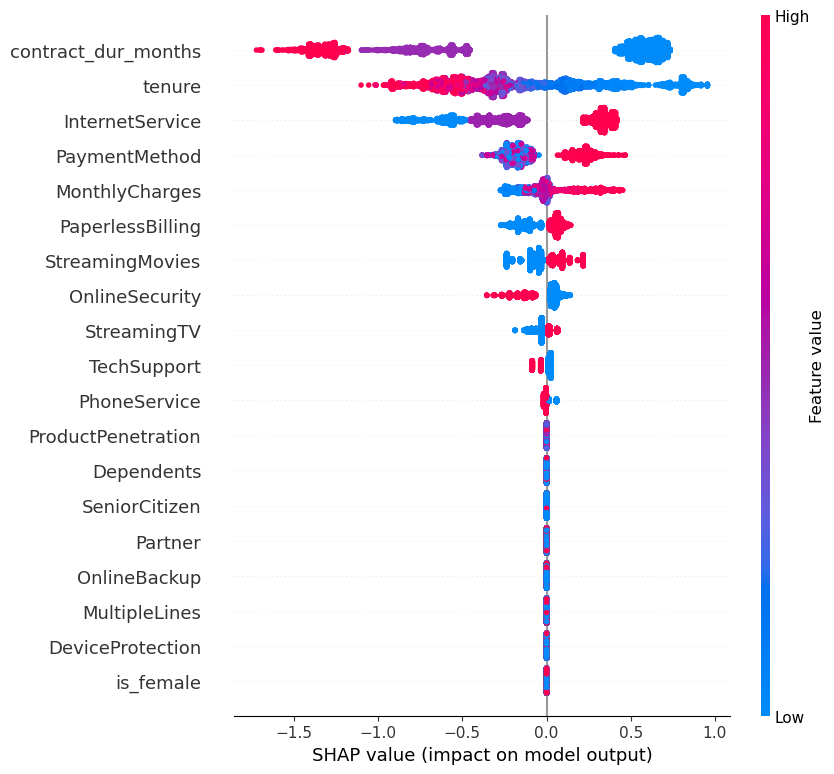

In [36]:
# Evaluate shap for a model with depth = 3
#Ensure X_train is a DataFrame (for feature names)
X_data = pd.DataFrame(X_train, columns=X.columns)

#Retrieve your trained model (from the results dictionary)
model = results_gbm_tuned['XGBoost']['model']

#Create the SHAP explainer
explainer = shap.Explainer(model)

#Calculate SHAP values
shap_values = explainer(X_data)

shap.plots.beeswarm(shap_values, max_display=20)



2.226687501938329e-06


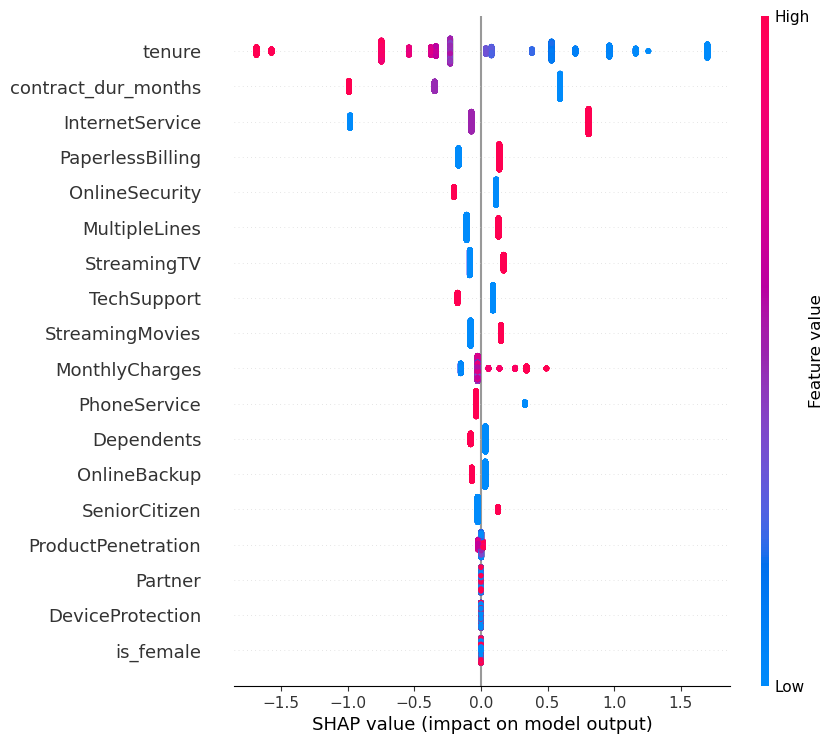

In [37]:
# Model with dropped variables
model = dropped_results["drop_PayMeth"]['model']
Xd = dropped_results["drop_PayMeth"]["X_scaled"]

#convert to data frame to get feature names back
Xd = pd.DataFrame(Xd, columns=['is_female',
                                'SeniorCitizen',
                                'Partner',
                                'Dependents',
                                'tenure',
                                'PhoneService',
                                'MultipleLines',
                                'InternetService',
                                'OnlineSecurity',
                                'OnlineBackup',
                                'DeviceProtection',
                                'TechSupport',
                                'StreamingTV',
                                'StreamingMovies',
                                'contract_dur_months',
                                'PaperlessBilling',
                                'MonthlyCharges',
                                'ProductPenetration'])

pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model, Xd)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
print(np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max())

shap.plots.beeswarm(explanation, max_display=20)


shap.plots.force(explainer.expected_value, shap_values[0:shap_values.shape[0]:20,:])


(OLD) Despite improving model performance when dropped, when included payment method does matter. Perhaps the coding is bad since feature value does not align with SHAP value

Now recoded the order makes sense but model performance doesnt improve, still better to just drop it

## Drop columns based on SHAP

In [39]:
def drop_n_shap(model,disruptiveCols,X):
    #convert to data frame to get feature names back
    Xd = pd.DataFrame(X, columns=['is_female',
                                    'SeniorCitizen',
                                    'Partner',
                                    'Dependents',
                                    'tenure',
                                    'PhoneService',
                                    'MultipleLines',
                                    'InternetService',
                                    'OnlineSecurity',
                                    'OnlineBackup',
                                    'DeviceProtection',
                                    'TechSupport',
                                    'StreamingTV',
                                    'StreamingMovies',
                                    'contract_dur_months',
                                    'PaperlessBilling',
                                    'PaymentMethod',
                                    'MonthlyCharges',
                                    'ProductPenetration'])
    
    Xd = Xd.drop(columns=disruptiveCols)

    #pred = model.predict(Xd, output_margin=True)

    explainer = shap.TreeExplainer(model, Xd)
    explanation = explainer(Xd)

    shap_values = explanation.values
    # make sure the SHAP values add up to marginal predictions
    #print(np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max())

    shap.plots.beeswarm(explanation, max_display=20)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

AUC-ROC: 0.8456

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8378

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.51      0.82      0.63       374

    accuracy                           0

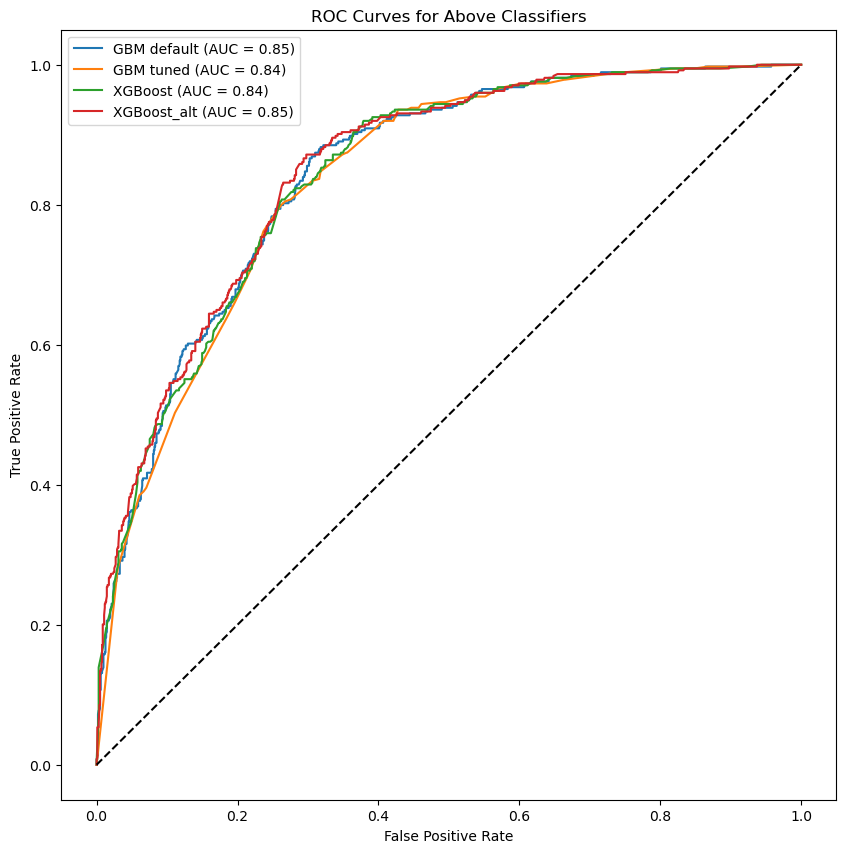

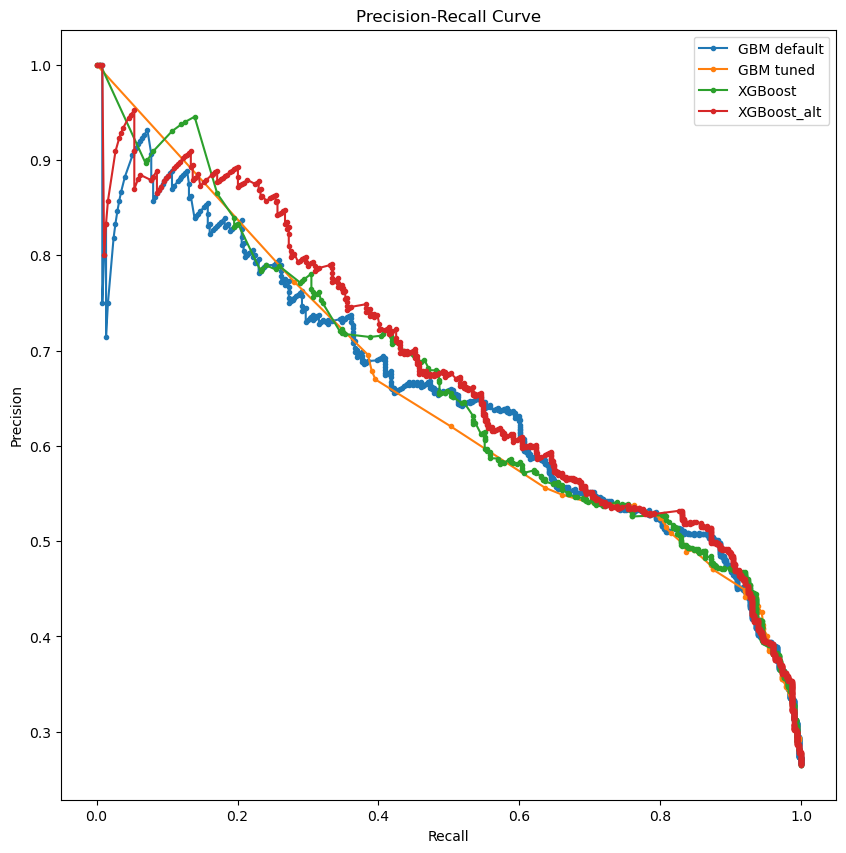


GBM default Confusion Matrix:
[[761 274]
 [ 75 299]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[744 291]
 [ 67 307]]

XGBoost_alt Confusion Matrix:
[[749 286]
 [ 62 312]]


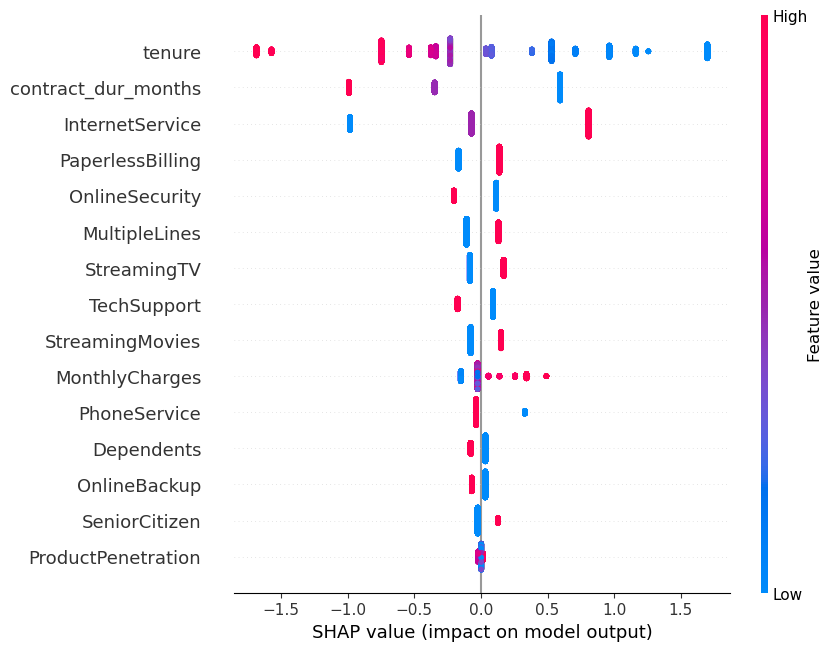

In [40]:
# First lets drop all that don't matter (as well as paymentmethod which seems beneficial)
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod"]


drop_SHAP, X_drop_SHAP, fullX_drop_SHAP = drop_scale_split_test(disruptiveCols, X, y)
drop_n_shap(drop_SHAP["XGBoost_alt"]["model"],disruptiveCols,X_scaled)

Performance is indeed not different after dropping these columns

Monthly charges has a strange impact in some cases perhaps we are better off without it

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1035
           1       0.52      0.81      0.64       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.75      0.77      1409

AUC-ROC: 0.8466

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8378

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0

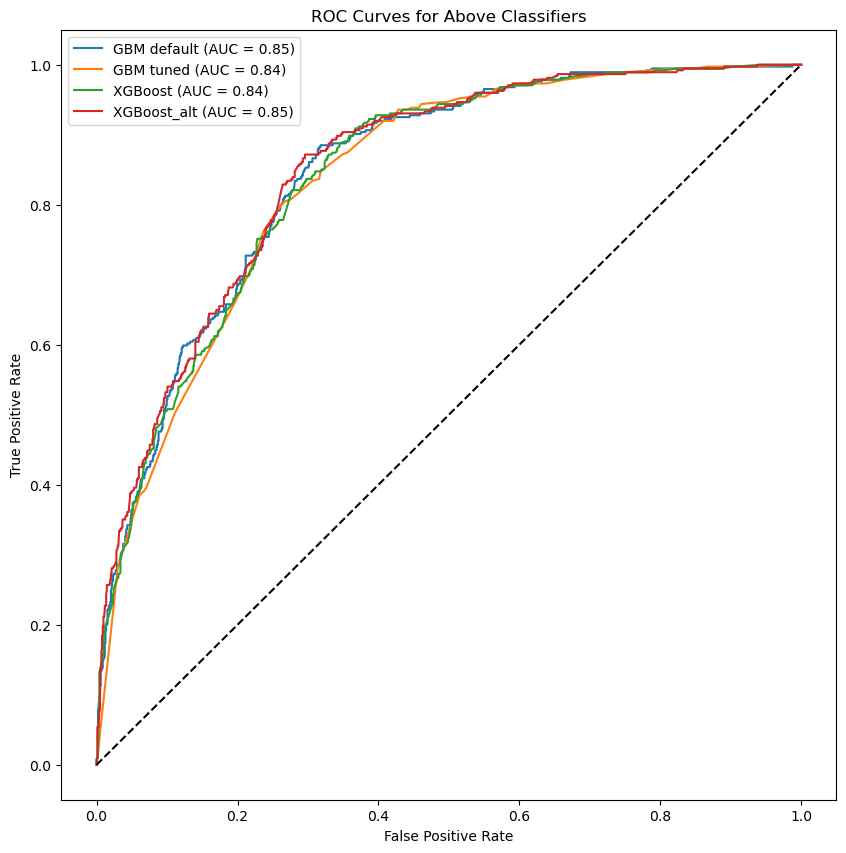

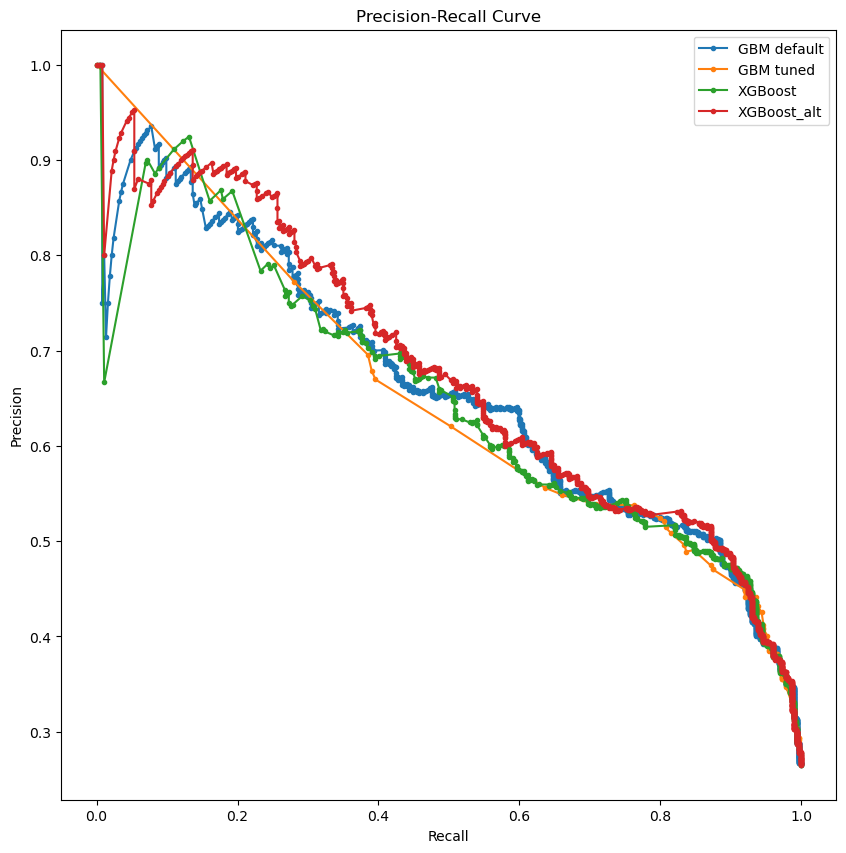


GBM default Confusion Matrix:
[[758 277]
 [ 70 304]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[735 300]
 [ 66 308]]

XGBoost_alt Confusion Matrix:
[[750 285]
 [ 62 312]]


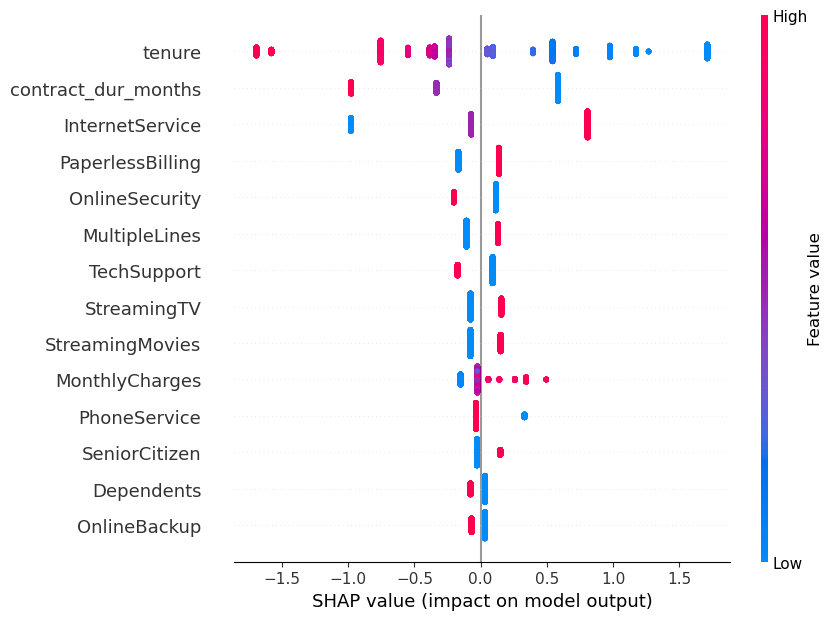

In [41]:
# Product penetration was added but doesn't do much remove it too
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod","ProductPenetration"]


drop_SHAP, X_drop_SHAP, fullX_drop_SHAP = drop_scale_split_test(disruptiveCols, X, y)
drop_n_shap(drop_SHAP["XGBoost_alt"]["model"],disruptiveCols,X_scaled)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

AUC-ROC: 0.8463

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8391

XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0

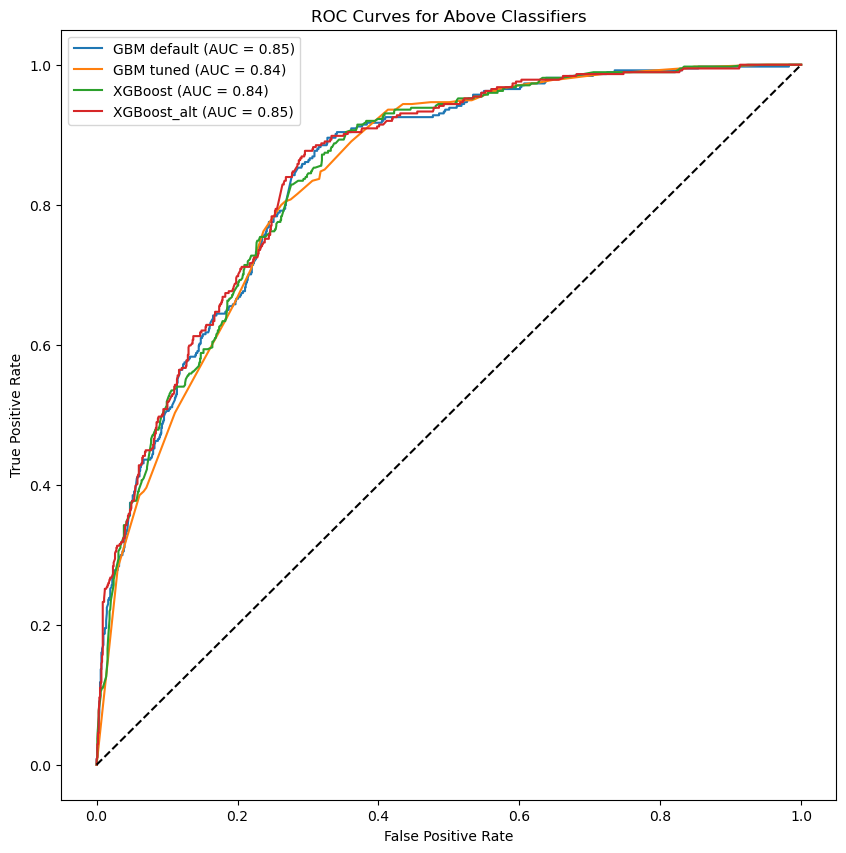

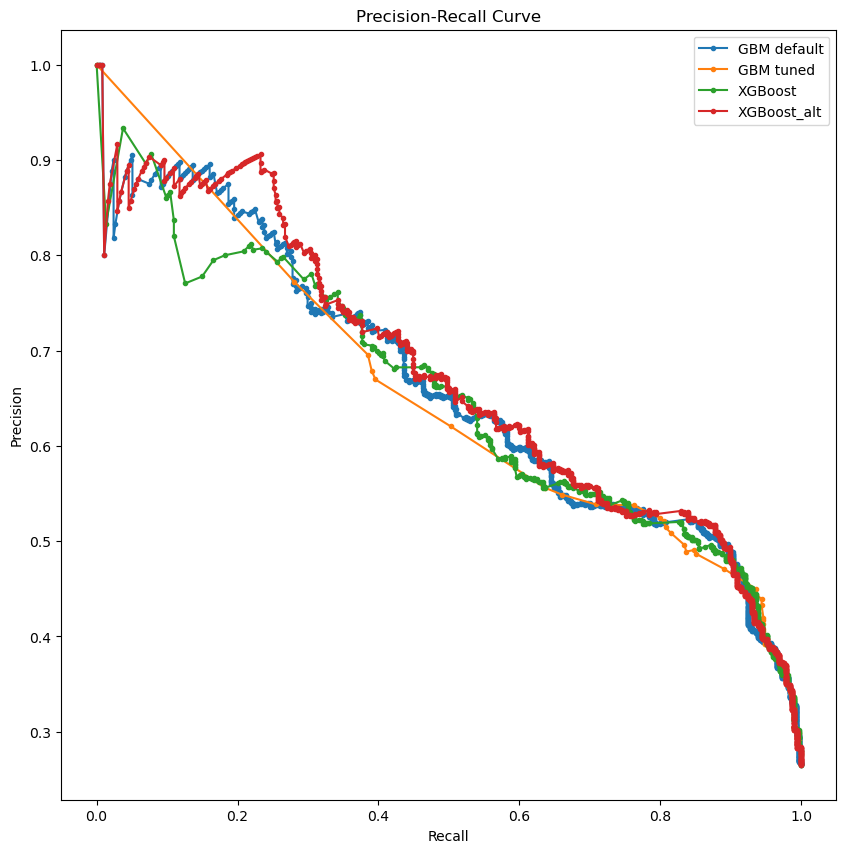


GBM default Confusion Matrix:
[[766 269]
 [ 78 296]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[764 271]
 [ 81 293]]

XGBoost_alt Confusion Matrix:
[[756 279]
 [ 60 314]]


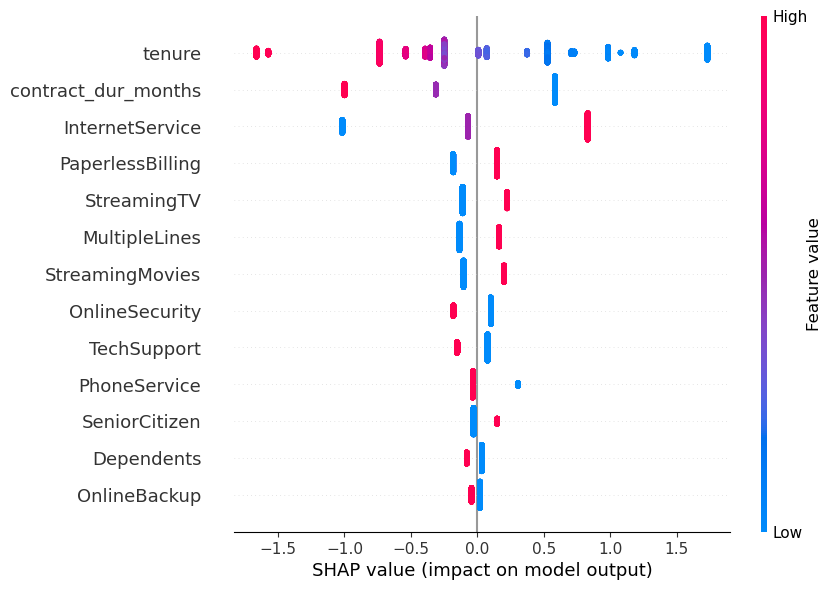

In [42]:
# First lets drop all that don't matter (as well as paymentmethod which seems beneficial)
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod","ProductPenetration","MonthlyCharges"]


drop_SHAP, X_drop_SHAP, fullX_drop_SHAP = drop_scale_split_test(disruptiveCols, X, y)
drop_n_shap(drop_SHAP["XGBoost_alt"]["model"],disruptiveCols,X_scaled)

Actually confusion matrix scores are a little bit better (Though AUC is not). Let's keep going with phone service and senior citizen which isn't very well spread

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8439

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8391

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.52      0.83      0.64       374

    accuracy                           0

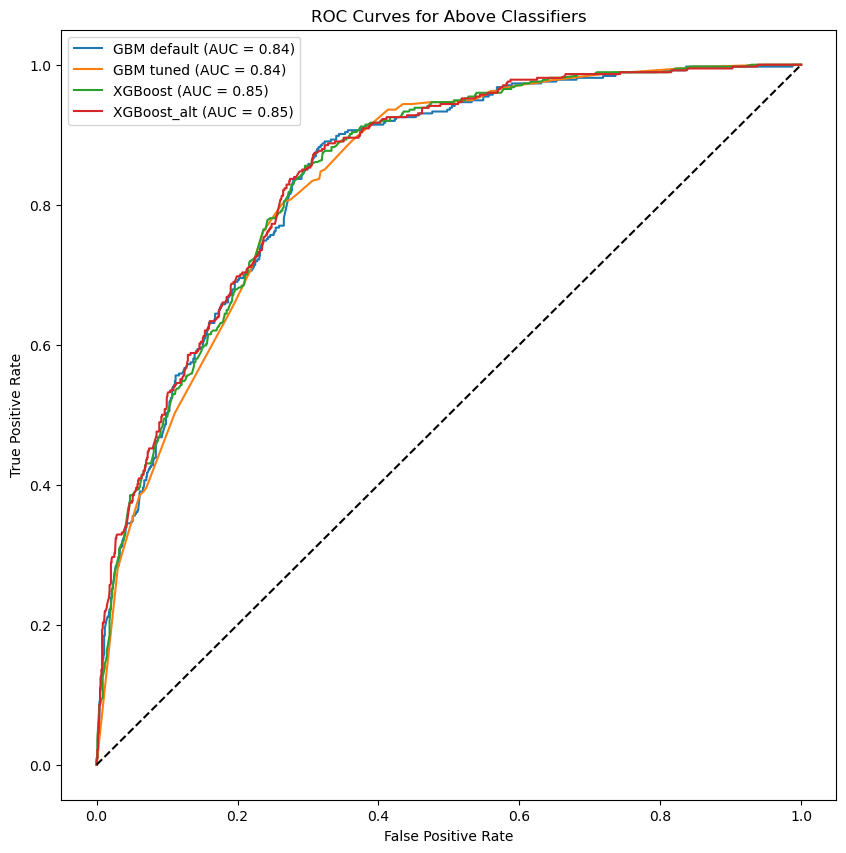

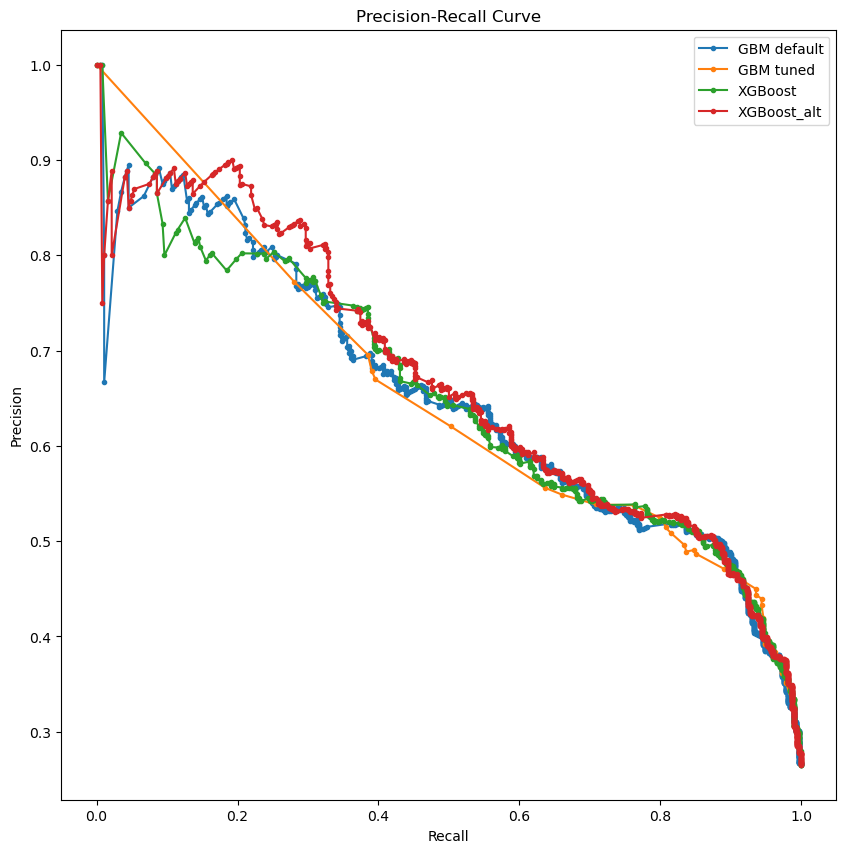


GBM default Confusion Matrix:
[[767 268]
 [ 87 287]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[744 291]
 [ 62 312]]

XGBoost_alt Confusion Matrix:
[[752 283]
 [ 63 311]]


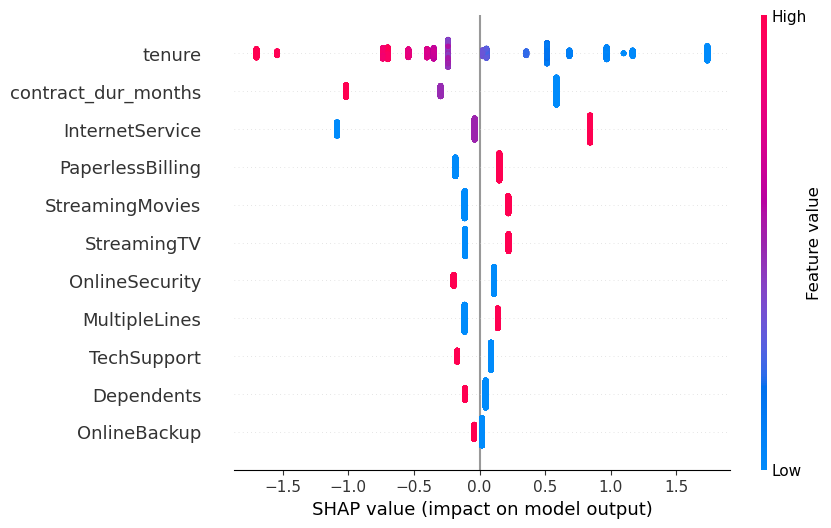

In [43]:
# First lets drop all that don't matter (as well as paymentmethod which seems beneficial)
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod","ProductPenetration","MonthlyCharges","PhoneService","SeniorCitizen"]


drop_SHAP, X_drop_SHAP, fullX_drop_SHAP = drop_scale_split_test(disruptiveCols, X, y)
drop_n_shap(drop_SHAP["XGBoost_alt"]["model"],disruptiveCols,X_scaled)

That's not better, also removing them individually doesn't lead to any overall improvements put these back and let;s remove online back up which is the worst performing variable

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

AUC-ROC: 0.8468

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8391

XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0

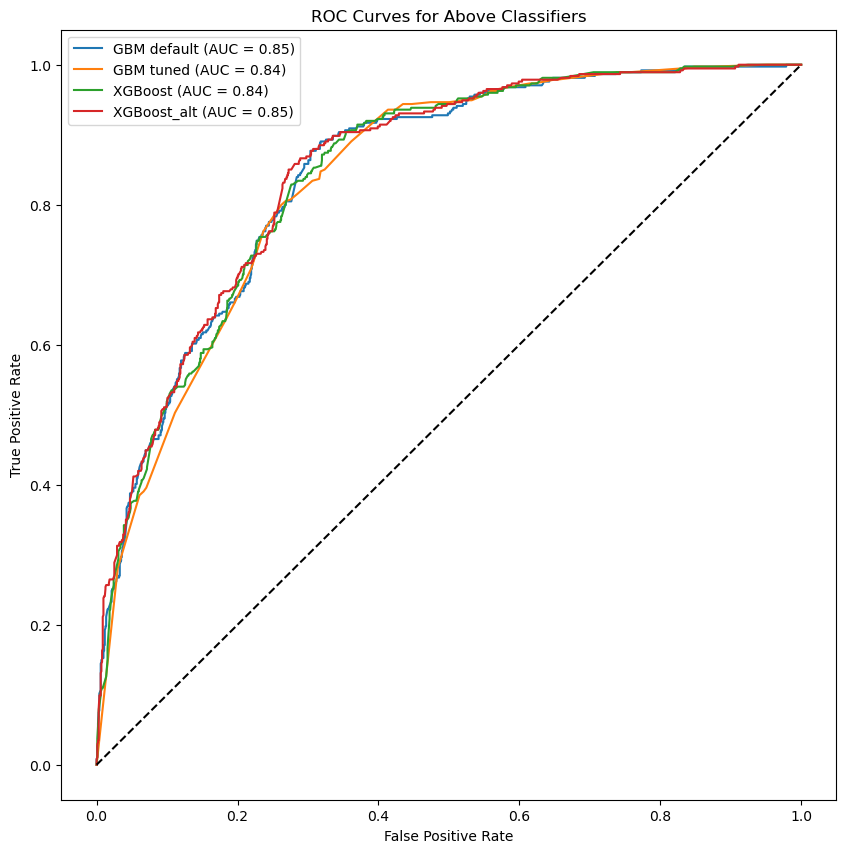

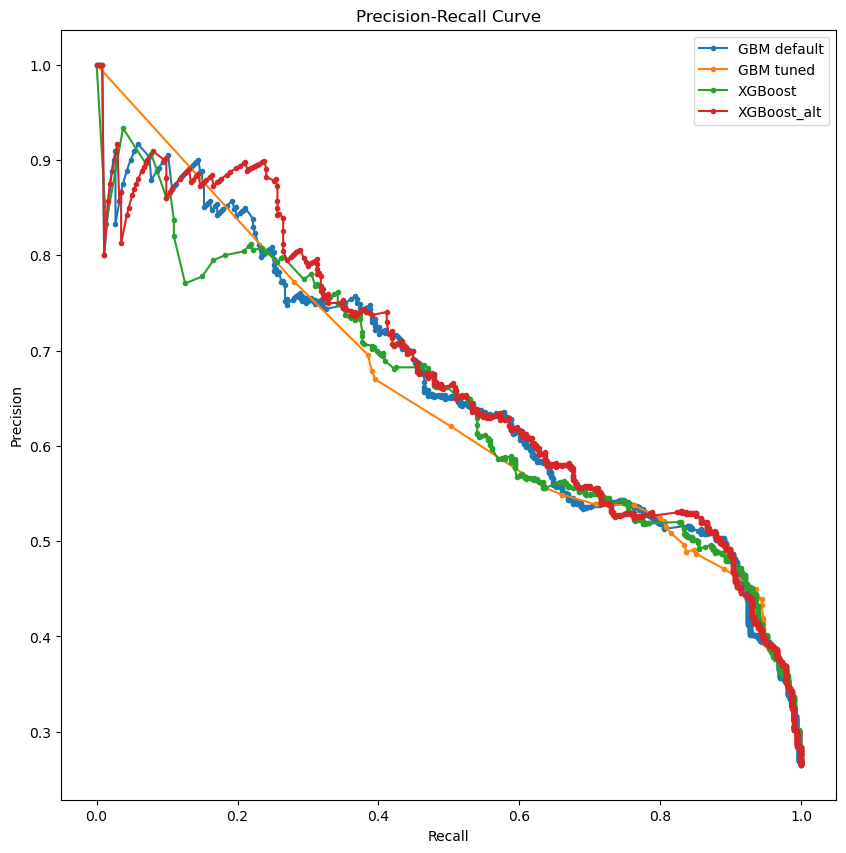


GBM default Confusion Matrix:
[[763 272]
 [ 78 296]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[764 271]
 [ 81 293]]

XGBoost_alt Confusion Matrix:
[[754 281]
 [ 59 315]]


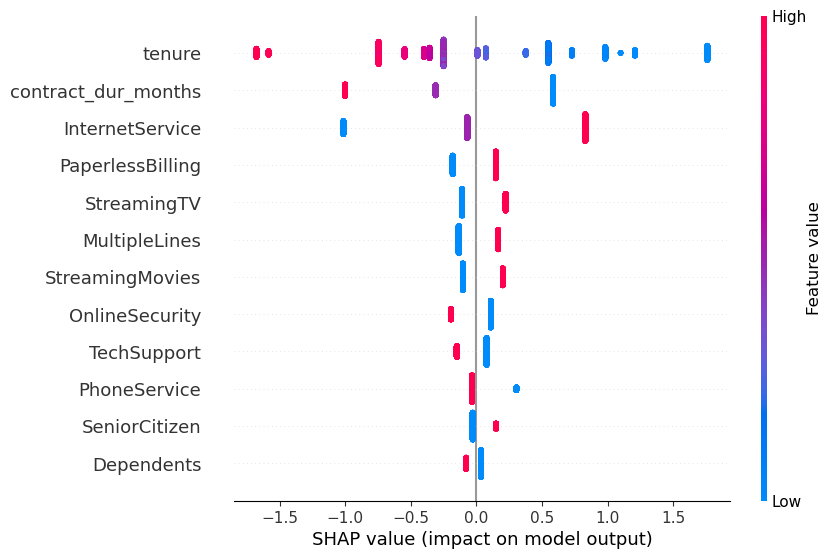

In [44]:
# First lets drop all that don't matter (as well as paymentmethod which seems beneficial)
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod","ProductPenetration","MonthlyCharges","OnlineBackup"]


drop_SHAP, X_drop_SHAP, fullX_drop_SHAP = drop_scale_split_test(disruptiveCols, X, y)
drop_n_shap(drop_SHAP["XGBoost_alt"]["model"],disruptiveCols,X_scaled)

Fitting GBM default
Fitting GBM tuned
Fitting XGBoost
Fitting XGBoost_alt

GBM default:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.74      0.75      1409

AUC-ROC: 0.8419

GBM tuned:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.74      0.76      1409

AUC-ROC: 0.8381

XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.51      0.82      0.63       374

    accuracy                           0

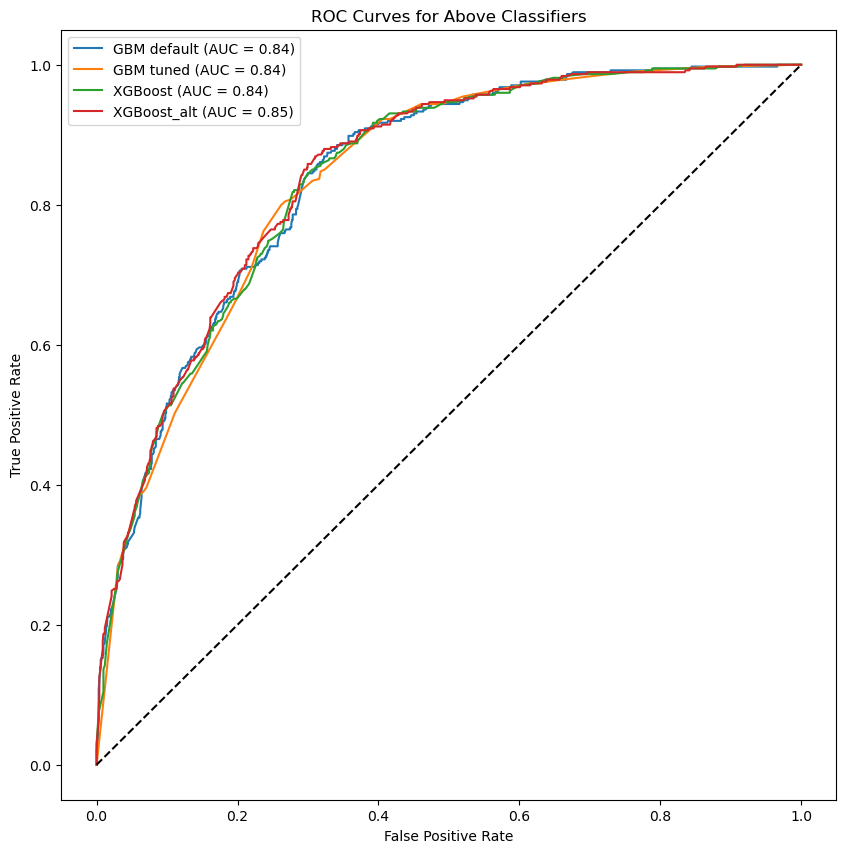

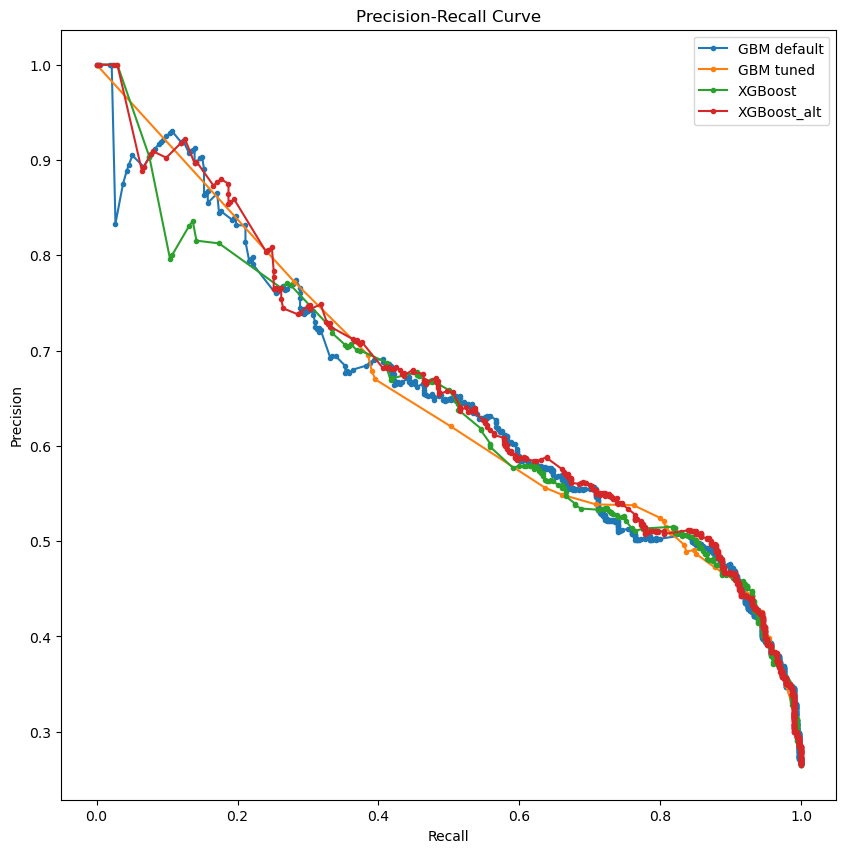


GBM default Confusion Matrix:
[[749 286]
 [ 86 288]]

GBM tuned Confusion Matrix:
[[740 295]
 [ 69 305]]

XGBoost Confusion Matrix:
[[745 290]
 [ 68 306]]

XGBoost_alt Confusion Matrix:
[[733 302]
 [ 59 315]]


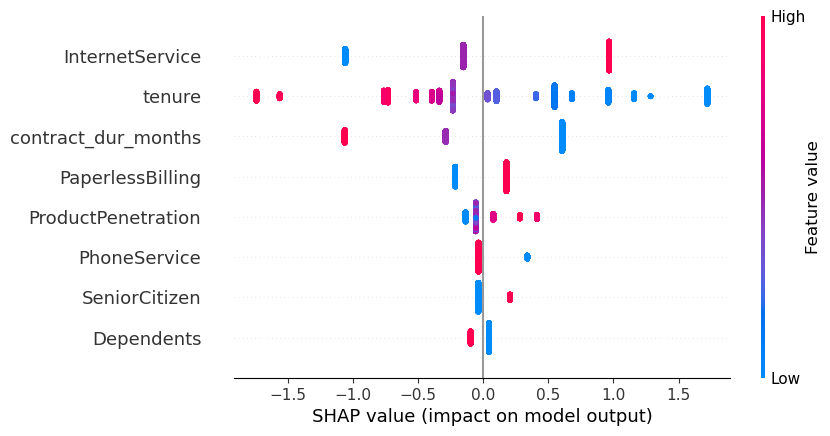

In [45]:
# Keep product penetration but go light on services
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod","MonthlyCharges","OnlineBackup","TechSupport","OnlineSecurity","StreamingMovies","MultipleLines","StreamingTV"]


drop_SHAP, X_drop_SHAP, fullX_drop_SHAP = drop_scale_split_test(disruptiveCols, X, y)
drop_n_shap(drop_SHAP["XGBoost_alt"]["model"],disruptiveCols,X_scaled)

False negatives actually not worse, but false positive significantly worse this is not it

# Try out catboost

Fitting Catboost
Learning rate set to 0.021554
0:	learn: 0.6834565	total: 151ms	remaining: 2m 30s
1:	learn: 0.6737811	total: 155ms	remaining: 1m 17s
2:	learn: 0.6654339	total: 159ms	remaining: 52.7s
3:	learn: 0.6564019	total: 162ms	remaining: 40.5s
4:	learn: 0.6486622	total: 166ms	remaining: 33.1s
5:	learn: 0.6421871	total: 169ms	remaining: 28s
6:	learn: 0.6347191	total: 173ms	remaining: 24.5s
7:	learn: 0.6278605	total: 177ms	remaining: 21.9s
8:	learn: 0.6215893	total: 181ms	remaining: 19.9s
9:	learn: 0.6154584	total: 185ms	remaining: 18.3s
10:	learn: 0.6091866	total: 188ms	remaining: 16.9s
11:	learn: 0.6039194	total: 192ms	remaining: 15.8s
12:	learn: 0.6000189	total: 195ms	remaining: 14.8s
13:	learn: 0.5944670	total: 199ms	remaining: 14s
14:	learn: 0.5894926	total: 203ms	remaining: 13.3s
15:	learn: 0.5844969	total: 207ms	remaining: 12.7s
16:	learn: 0.5801282	total: 211ms	remaining: 12.2s
17:	learn: 0.5760796	total: 215ms	remaining: 11.7s
18:	learn: 0.5718830	total: 219ms	remaining: 11

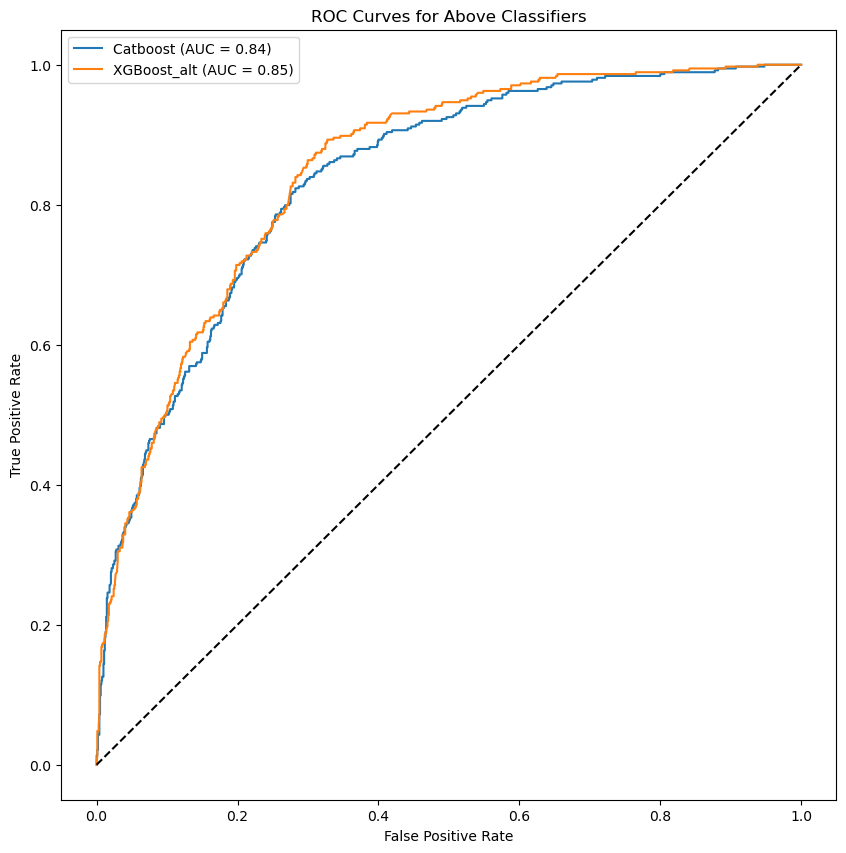

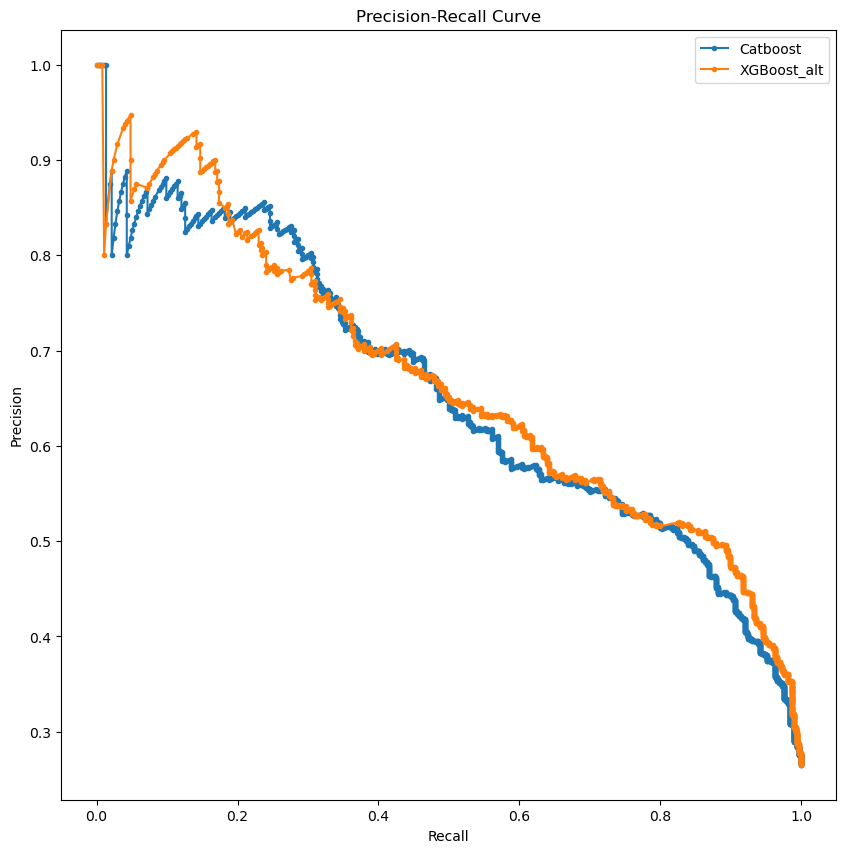


Catboost Confusion Matrix:
[[806 229]
 [ 99 275]]

XGBoost_alt Confusion Matrix:
[[758 277]
 [ 77 297]]


In [63]:
from catboost import CatBoostClassifier


models = {
  "Catboost": CatBoostClassifier(),
  "XGBoost_alt": XGBClassifier(n_estimators=100,max_depth=1)
  }

results_catboost = fit_models_dict(models, X_train, y_train, X_test, y_test,
                    weight_churn,None)
display_fit_results(results_catboost,X_test,y_test,None)

Fitting Catboost
Learning rate set to 0.021554
0:	learn: 0.6832888	total: 4.74ms	remaining: 4.73s
1:	learn: 0.6741094	total: 9.59ms	remaining: 4.78s
2:	learn: 0.6648609	total: 15.3ms	remaining: 5.1s
3:	learn: 0.6577089	total: 19.2ms	remaining: 4.77s
4:	learn: 0.6504949	total: 23.3ms	remaining: 4.63s
5:	learn: 0.6429816	total: 28.1ms	remaining: 4.66s
6:	learn: 0.6358422	total: 33.4ms	remaining: 4.74s
7:	learn: 0.6286696	total: 38.6ms	remaining: 4.79s
8:	learn: 0.6213482	total: 43.9ms	remaining: 4.84s
9:	learn: 0.6148646	total: 49.6ms	remaining: 4.91s
10:	learn: 0.6082420	total: 54.7ms	remaining: 4.92s
11:	learn: 0.6026637	total: 60ms	remaining: 4.94s
12:	learn: 0.5972716	total: 65.5ms	remaining: 4.97s
13:	learn: 0.5920913	total: 70.4ms	remaining: 4.96s
14:	learn: 0.5871753	total: 75.4ms	remaining: 4.95s
15:	learn: 0.5830572	total: 79.7ms	remaining: 4.9s
16:	learn: 0.5782594	total: 84.5ms	remaining: 4.89s
17:	learn: 0.5738155	total: 89.4ms	remaining: 4.88s
18:	learn: 0.5696300	total: 94.

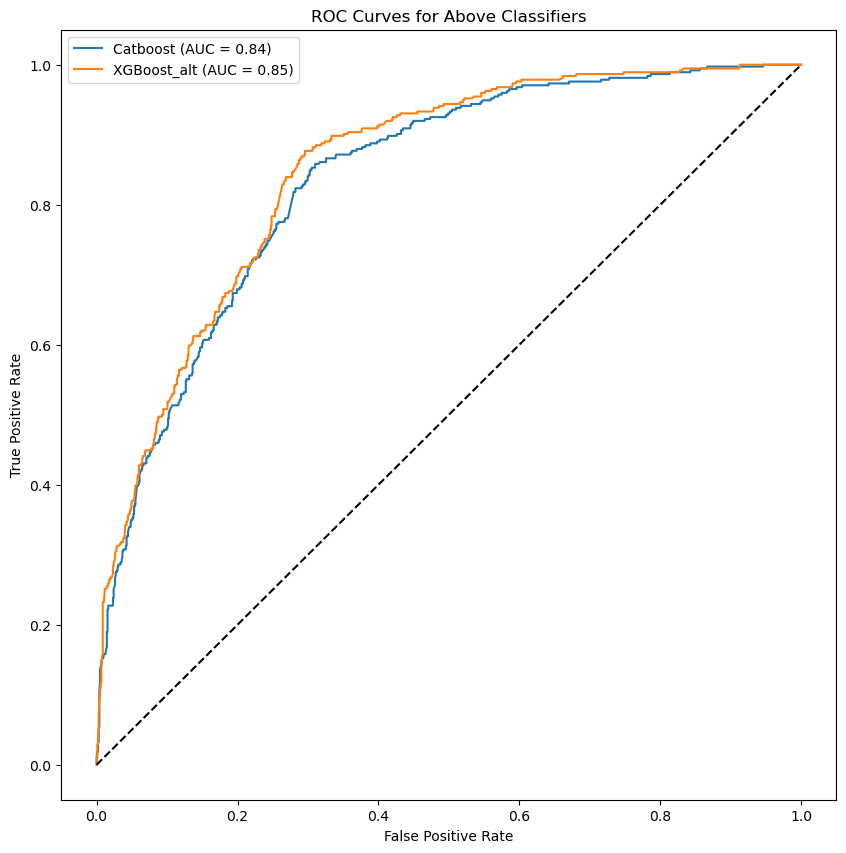

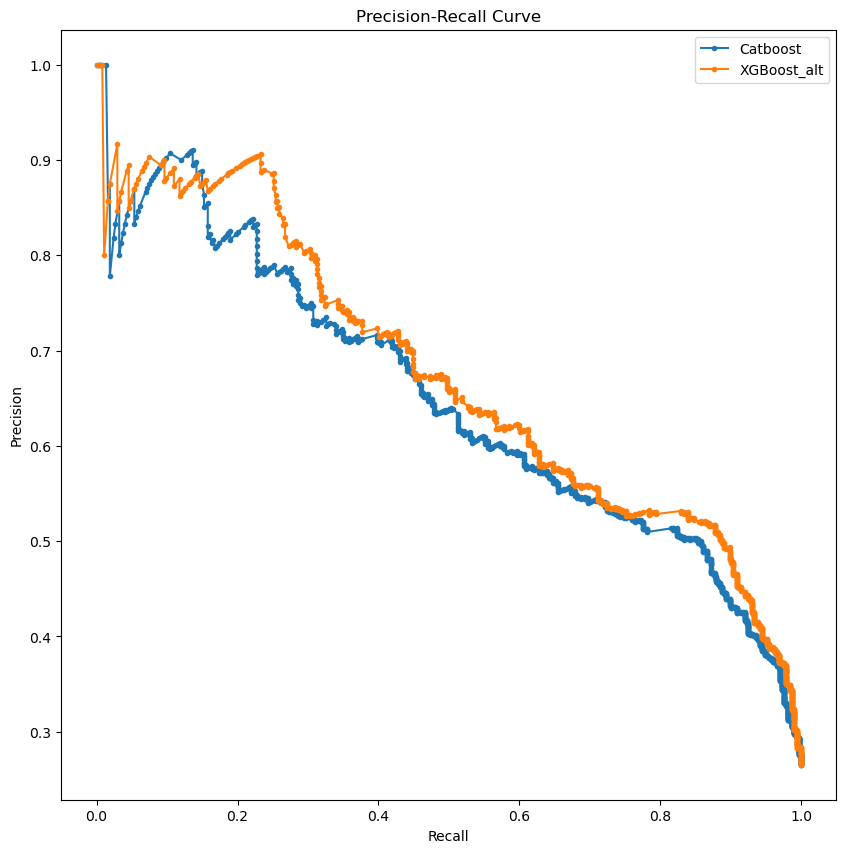


Catboost Confusion Matrix:
[[784 251]
 [ 94 280]]

XGBoost_alt Confusion Matrix:
[[756 279]
 [ 60 314]]


In [65]:
# Let's try again but with a the know disruptive columns dropped
disruptiveCols = ["Partner", "DeviceProtection","is_female","PaymentMethod","ProductPenetration","MonthlyCharges"]

X_finaldrop = X.drop(columns=disruptiveCols)
# scale and split
X_finalscaled = scaler.fit_transform(X_finaldrop)

# Split in test and train
X_finaltrain, X_finaltest, y_train, y_test = train_test_split(X_finalscaled, y, stratify=y,test_size=0.2, random_state=89)


models = {
  "Catboost": CatBoostClassifier(),
  "XGBoost_alt": XGBClassifier(n_estimators=100,max_depth=1)
  }

results_catboost = fit_models_dict(models, X_finaltrain, y_train, X_finaltest, y_test,
                    weight_churn,None)
display_fit_results(results_catboost,X_finaltest,y_test,None)

## Catboost hyperparameter tuning

In [89]:
# Try both optimizing for recall and precision and auc to see the difference
param_grid = {
    'max_depth': [1,3,5],
    'n_estimators':[10, 50, 100, 200]
}
catb = CatBoostClassifier()

grid_search = GridSearchCV(catb, param_grid, cv=5, verbose=3, scoring='roc_auc')
grid_search.fit(X_finaltrain, y_train,sample_weight=weight_churn)

print("\nBest Parameters for Catboost classifier:")
print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Learning rate set to 0.5
0:	learn: 0.6094715	total: 752us	remaining: 6.78ms
1:	learn: 0.5758124	total: 1.58ms	remaining: 6.31ms
2:	learn: 0.5554701	total: 2.42ms	remaining: 5.66ms
3:	learn: 0.5419220	total: 3.13ms	remaining: 4.7ms
4:	learn: 0.5286452	total: 3.79ms	remaining: 3.79ms
5:	learn: 0.5191607	total: 4.43ms	remaining: 2.96ms
6:	learn: 0.5142308	total: 5.05ms	remaining: 2.17ms
7:	learn: 0.5083060	total: 5.72ms	remaining: 1.43ms
8:	learn: 0.5057984	total: 6.4ms	remaining: 711us
9:	learn: 0.5021974	total: 7.08ms	remaining: 0us
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.831 total time=   0.0s
Learning rate set to 0.5
0:	learn: 0.6101107	total: 718us	remaining: 6.47ms
1:	learn: 0.5756931	total: 1.41ms	remaining: 5.64ms
2:	learn: 0.5528947	total: 2.06ms	remaining: 4.81ms
3:	learn: 0.5430226	total: 2.76ms	remaining: 4.14ms
4:	learn: 0.5290655	total: 3.43ms	remaining: 3.43ms
5:	learn: 0.5216700	total: 4.11ms	re

Fitting Catboost
Learning rate set to 0.178046
0:	learn: 0.6459438	total: 1.51ms	remaining: 150ms
1:	learn: 0.6103354	total: 3.32ms	remaining: 163ms
2:	learn: 0.5853910	total: 4.99ms	remaining: 161ms
3:	learn: 0.5678226	total: 6.58ms	remaining: 158ms
4:	learn: 0.5516725	total: 8.07ms	remaining: 153ms
5:	learn: 0.5417039	total: 9.7ms	remaining: 152ms
6:	learn: 0.5323395	total: 11.3ms	remaining: 150ms
7:	learn: 0.5241673	total: 12.9ms	remaining: 148ms
8:	learn: 0.5178929	total: 14.4ms	remaining: 146ms
9:	learn: 0.5124761	total: 16.1ms	remaining: 144ms
10:	learn: 0.5086350	total: 17.7ms	remaining: 143ms
11:	learn: 0.5043679	total: 19.3ms	remaining: 142ms
12:	learn: 0.5016487	total: 21ms	remaining: 140ms
13:	learn: 0.4990303	total: 22.7ms	remaining: 139ms
14:	learn: 0.4960777	total: 24.4ms	remaining: 138ms
15:	learn: 0.4938228	total: 26ms	remaining: 136ms
16:	learn: 0.4915232	total: 27.6ms	remaining: 135ms
17:	learn: 0.4898712	total: 29.1ms	remaining: 132ms
18:	learn: 0.4878227	total: 30.5

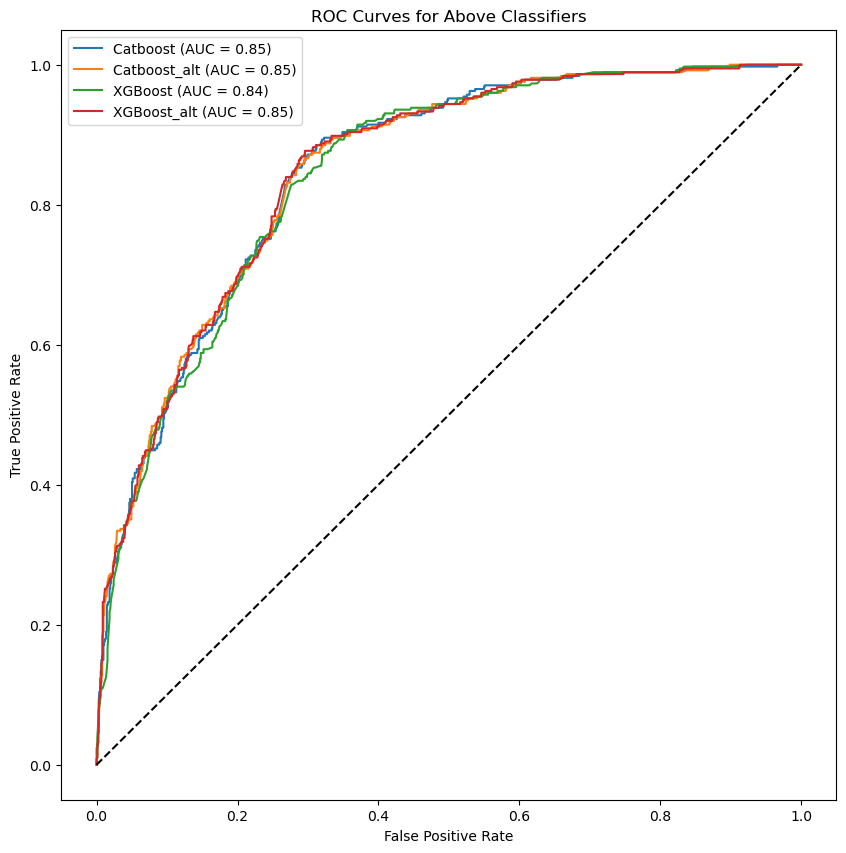

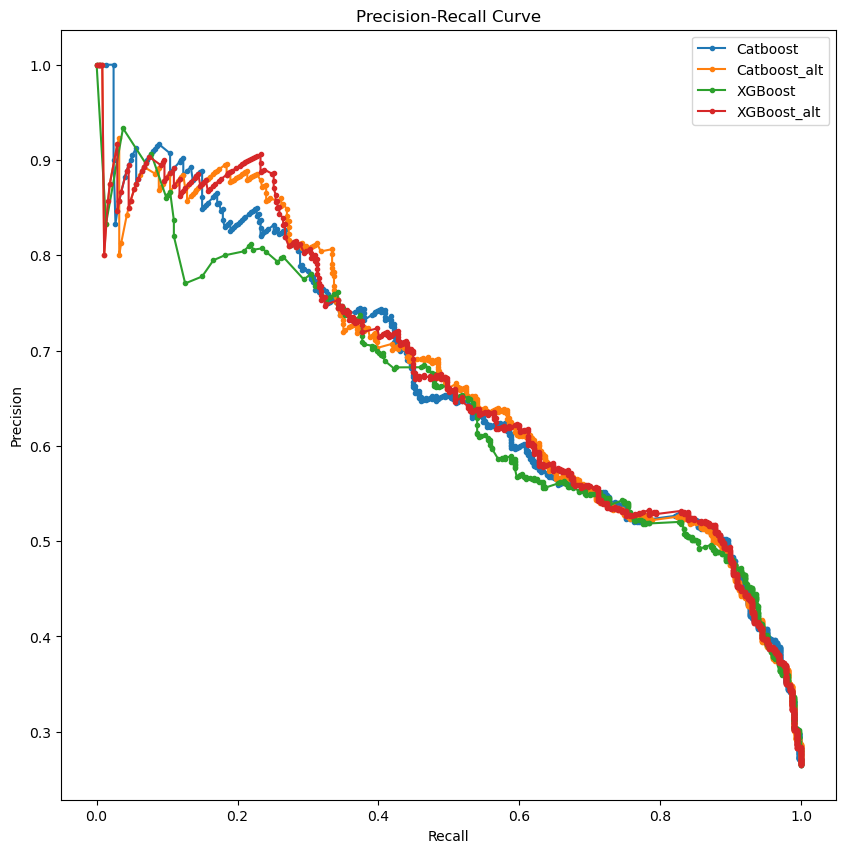


Catboost Confusion Matrix:
[[767 268]
 [ 80 294]]

Catboost_alt Confusion Matrix:
[[735 300]
 [ 53 321]]

XGBoost Confusion Matrix:
[[764 271]
 [ 81 293]]

XGBoost_alt Confusion Matrix:
[[756 279]
 [ 60 314]]


In [75]:
models = {
  "Catboost": CatBoostClassifier(n_estimators=100,max_depth=3),
  "Catboost_alt": CatBoostClassifier(n_estimators=100,max_depth=1),
  "XGBoost": XGBClassifier(n_estimators=10,max_depth=3),
  "XGBoost_alt": XGBClassifier(n_estimators=100,max_depth=1)
  }

results_catboost = fit_models_dict(models, X_finaltrain, y_train, X_finaltest, y_test,
                    weight_churn,None)
display_fit_results(results_catboost,X_finaltest,y_test,None)

# Tabnet
Should move to colab for this but oh well

In [90]:
X_finaldrop.columns.tolist()

['SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'contract_dur_months',
 'PaperlessBilling']

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier



clf = TabNetClassifier(n_d=8,n_a=8,n_steps=3)
                       #cat_idxs=[0,1,3,4,5,6,7,8,9,10,11,12], # Somehow not all the categorical variables work I don't understand why
                       #cat_dims=[2,2,2,2,3,2,2,2,2,2 ,3, 2 ])

clf = TabNetClassifier(n_independent=4, n_shared=4)

clf.fit(
  X_finaltrain, y_train,
  eval_set=[(X_finaltest, y_test)],
  weights=1, patience =10
)


c:\Users\vwjhu\anaconda3\envs\nlp-cv-ir\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.70682 | val_0_auc: 0.69615 |  0:00:00s
epoch 1  | loss: 0.60214 | val_0_auc: 0.74087 |  0:00:01s
epoch 2  | loss: 0.56166 | val_0_auc: 0.74619 |  0:00:01s
epoch 3  | loss: 0.55522 | val_0_auc: 0.77488 |  0:00:02s
epoch 4  | loss: 0.5355  | val_0_auc: 0.79534 |  0:00:02s
epoch 5  | loss: 0.51362 | val_0_auc: 0.81626 |  0:00:03s
epoch 6  | loss: 0.51761 | val_0_auc: 0.81622 |  0:00:04s
epoch 7  | loss: 0.50048 | val_0_auc: 0.82296 |  0:00:04s
epoch 8  | loss: 0.49895 | val_0_auc: 0.82189 |  0:00:05s
epoch 9  | loss: 0.5037  | val_0_auc: 0.82818 |  0:00:05s
epoch 10 | loss: 0.49891 | val_0_auc: 0.82944 |  0:00:06s
epoch 11 | loss: 0.48803 | val_0_auc: 0.8312  |  0:00:06s
epoch 12 | loss: 0.4964  | val_0_auc: 0.83128 |  0:00:07s
epoch 13 | loss: 0.49509 | val_0_auc: 0.83121 |  0:00:08s
epoch 14 | loss: 0.48582 | val_0_auc: 0.83298 |  0:00:08s
epoch 15 | loss: 0.49563 | val_0_auc: 0.83088 |  0:00:09s
epoch 16 | loss: 0.49445 | val_0_auc: 0.82961 |  0:00:09s
epoch 17 | los

c:\Users\vwjhu\anaconda3\envs\nlp-cv-ir\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Catboost:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409

AUC-ROC: 0.8491

Catboost_alt:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1035
           1       0.52      0.86      0.65       374

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.76      1409

AUC-ROC: 0.8501

XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weight

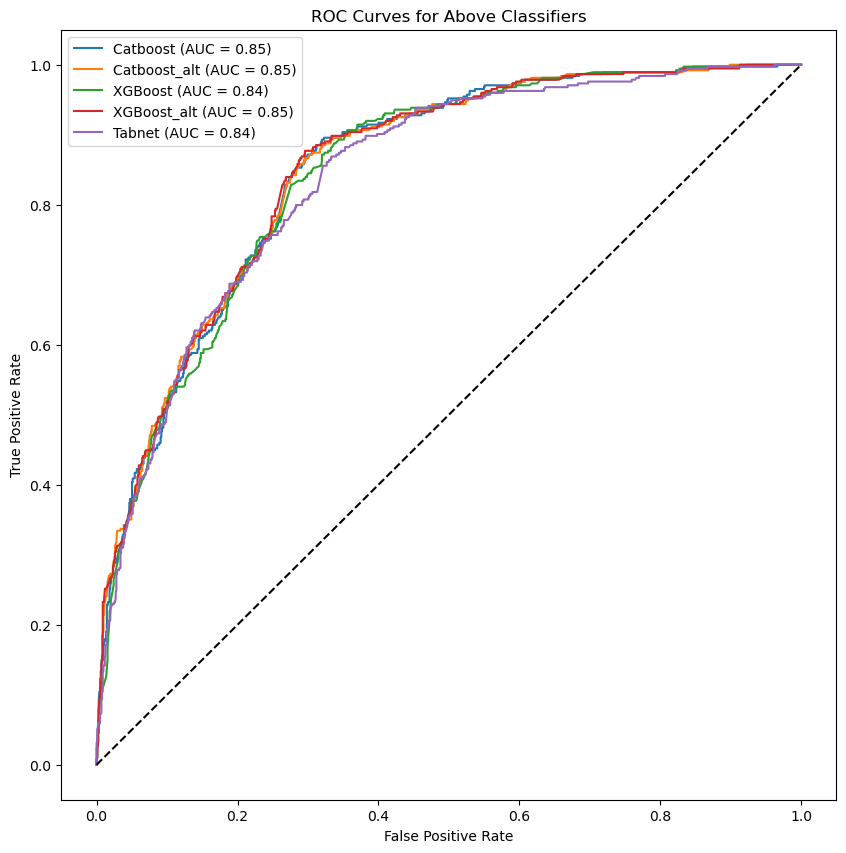

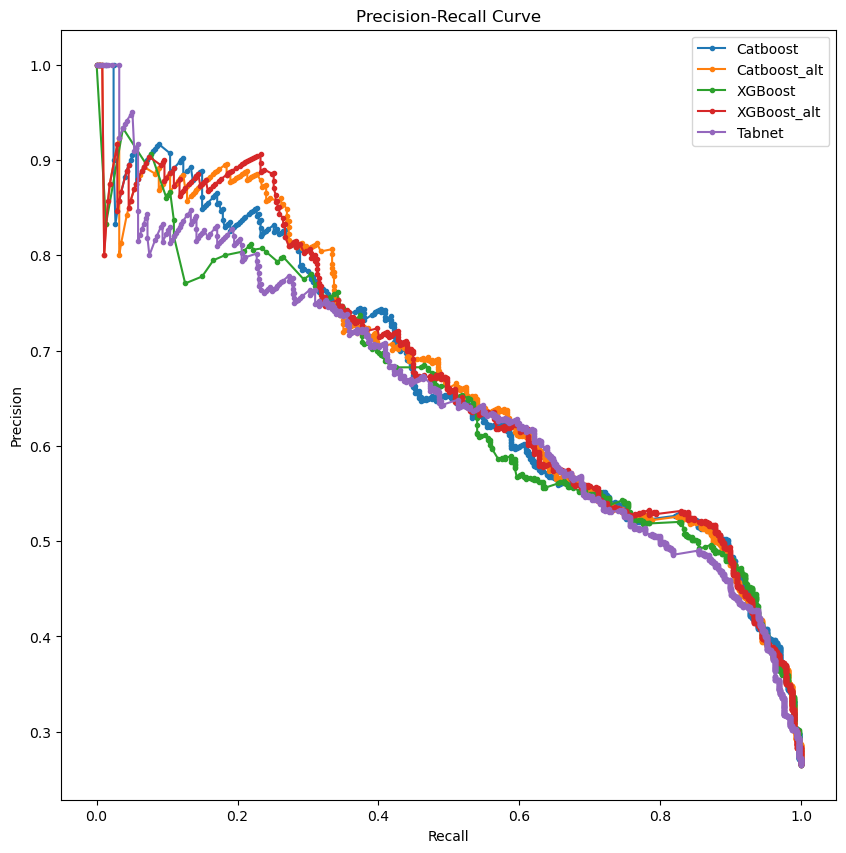


Catboost Confusion Matrix:
[[767 268]
 [ 80 294]]

Catboost_alt Confusion Matrix:
[[735 300]
 [ 53 321]]

XGBoost Confusion Matrix:
[[764 271]
 [ 81 293]]

XGBoost_alt Confusion Matrix:
[[756 279]
 [ 60 314]]

Tabnet Confusion Matrix:
[[732 303]
 [ 73 301]]


In [143]:

y_pred_tabnet = clf.predict(X_finaltest)
y_proba_tabnet = clf.predict_proba(X_finaltest)[:, 1] if hasattr(clf, 'predict_proba') else None
report_tabnet = classification_report(y_test, y_pred_tabnet, output_dict=True)
auc_tabnet = roc_auc_score(y_test, y_proba_tabnet) if y_proba_tabnet is not None else None

results_catboost["Tabnet"] = {
    "model": clf,
    "y_pred": y_pred_tabnet,
    "y_proba": y_proba_tabnet,
    "report":report_tabnet,
    "auc": auc_tabnet
}

display_fit_results(results_catboost,X_finaltest,y_test,None)